# An investigation of the predictors of thyroid cancer in patients with

thyroid nodules

Ovie Edafe [](https://orcid.org/0000-0002-6205-806X) (Department of Oncology & Metabolism, University of Sheffield)  
Neil Shephard [](https://orcid.org/000-0001-8301-6857) (Research Software Engineer, Department of Computer Science, University of Sheffield)  
Karen Sisley [](https://orcid.org/0000-0002-5565-2618) (Senior Lecturer, Clinical Medicine, School of Medicine and Population Health, University of Sheffield)  
Sabapathy P Balasubramanian [](https://orcid.org/0000-0001-5953-2843) (Directorate of General Surgery, Sheffield Teaching Hospitals NHS Foundation Trust)  
April 26, 2024

An abstract summarising the work undertaken and the overall conclusions can be placed here. Sub-headings are currently removed because they conflict with those in the body of the text and mess up the links in the Table of Contents.

In [ ]:
## Libraries for data manipulation, plotting and tabulating (sorted alphabetically)
library(Hmisc)
library(dplyr)
library(ggdark)
library(ggplot2)
library(gtsummary)
library(knitr)
library(mice)
library(naniar)
library(readr)
library(rmarkdown)
library(visdat)
## Libraries for Tidymodelling
library(dials)
library(furrr)

Loading required package: future


Attaching package: 'future'

The following object is masked from 'package:rmarkdown':

    run

## Introduction

Thyroid nodules are common. The challenge in the management of thyroid nodules is differentiating between benign and malignant nodule thyroid nodules.The use fine needle aspiration and cytology (FNAC) still leaves around 20% of patients that cannot be clearly classified as either benign or malignant. This scenario traditionally leads to diagnostic hemithyroidectomy for definitive histology. Other clinical variables such as patients’ demographics, clinical and biochemical factors have been shown to be associated with thyroid cancer in patients with thyroid nodules. This has been utilised in studies evaluating predictors of thyroid cancer with a view of creating a model to aid prediction. Standard practice on the management of thyroid nodules does not utilise these non ultrasound and non cytological factors. Combination of these variables considered to be significant with ultrasound and cytological characteristics may improve management of patients with thyroid nodules. Thyroid nodules are increasingly being incidentally detected with increased use of imaging in the evaluation of non thyroid related pathologies. Thus, leading to increase investigation of thyroid nodules and subsequent increased number of thyroid operations in non diagnostic cases. There are morbidities associated with thyroid surgery including scar, recurrent laryngeal nerve injury, hypothyroidism and hypoparathyroidism. We performed a systematic review to evaluate for predictors of thyroid cancer specifically in patients presenting with thyroid nodules. The systematic review a number of potential important variables that may be useful in the prediction of thyroid cancer in patients with thyroid nodules. The aim of this study was to evaluate the predictors of thyroid cancer with a view of improving prediction of thyroid cancer using computer age statistical inference techniques (@Efron2016Jul).

## Methods

This study was reported as per the Strengthening the Reporting of Observational Studies in Epidemiology (STROBE) guidelines

### Study design

This was a retrospective cohort study.

### Setting

The study was conducted at the Sheffield Teaching hospitals NHS Foundation Trusts. This is a tertiary referral centre for the management of thyroid cancer

### Participants

We included all consecutive patients who presented with thyroid nodule(s) or that were found to have thyroid nodule(s) on ultrasound done for thyroid pathology or for other non thyroid related pathologies

### Variables

Variable evaluated was based on findings from a systematic review evaluating predictors of thyroid cancer in patients with thyroid nodules. Data on the following variables were collected: patient demographics (age, gender, ethnicity), nodule presentation (incidental nodule, palpable nodule, rapid enlargement, compressive symptoms, vocal paresis), past medical history (hypertension, Graves’ disease, Hashimotos’ thyroiditis, family history of thyroid cancer, exposure to neck radiation), biochemistry (thyroid stimulating hormone, lymphocytes, monocytes), ultrasound characteristics ([British Thyroid Association ultrasound (BTA U)](https://radiopaedia.org/articles/bta-ultrasound-u-classification-of-thyroid-nodules)), nodule size, solitary nodule, nodule consistency, cervical lymphadenopathy), Royal College of Pathology (RCP) FNAC classification, type of thyroid surgery, and histological diagnosis.

### Data source

Data was collected from patients’ case notes and electronic patients’ database using a standardised data collection proforma. This was initially piloted on 30 patients and revised to improve data entry. In addition a number of variables that were not standard collected during workout of patients were not further checked; these include body mass index (BMI), serum thyroglobulin, serum triiodothyronine (T3), thyroxine (T4), thyroglobulin antibody (TgAb), thyroid peroxidase antibody (TP0Ab), and urinary iodine.

### Study size

We sought to have a large data set of at least 100 thyroid nodules with a cancer diagnosis using consecutive sampling technique. We aimed for a total of 1500 patients with thyroid nodules to achieve our target sample size. With the use of modern statistical techniques, we proposed such number will be appropriate to detect important variables if it exists.

### Data analysis

Data was cleaned and analysed using the R Statistical Software @r_citation and the Tidyverse (@tidyverse), Tidymodels (@tidymodels) collection of packages.

### Imputation

The dataset is incomplete and there are missing observations across all variables to varying degrees. In order to maximise the sample available for analysis imputation was used to infer missing values. The Multivariat Imputation via Chained Equations ([MICE](https://amices.org/mice/) and implemented in the eponymous R package @vanBuuren2011Dec) was employed which assumes data is missing at random (a difficult assumption to formally test). The approach takes each variable with missing data and attempts to predict it using statistical modelling based on the observed values. In essence it is the same approach as the statistical methods being employed to try and predict Thyroid Cancer and there are a range of statistical techniques available which include

### Modelling

We used a selection of statistic modelling techniques to evaluate association between variables and thyroid cancer in patients with thyroid nodules. The patient population was split into training and testing cohorts in a ratio of 0.75:0.25 and each model is fitted using the training cohort. This split ratio is generally used in traditional machine learning techniques. The training set of the data was used to estimate the relation between variables and thyroid cancer. The larger the training data, the better it is for the model to learn the trends. The test set was used to determine the accuracy of the model in predicting thyroid cancer; the bigger the test data the more confidence we have in the model prognostic values. We used simple randomisation technique for the split to prevent bias in the data split. We ensured that there was no duplicate in the data sets so any test data was not accidentally trained. Furthermore, cross validation was used to estimate the accuracy of the various machine learning models. The k-fold techniques splits the data in ?10 folds, and the data was trained on all but one of the the fold, and the one fold not trained is used to test the data. This was repeated multiple times using a different fold for test and the others for training until all the folds is utilised for training and testing. Following multiple training process with k-fold, we selected the model that has the best predictive value for thyroid cancer in the test cohort. We also used the leave one out (loo) cross-validation to train and test the data set.In this technique, all but one observation is use to train the data set and one observation is use to test the data; this is repeated until all the data test is used for testing and training. The model with the best predictive value was selected.

#### LASSO / Elastic Net

LASSO (Least Absolute Shrinkage and Selection Operatror) and Elastic Net @zou2005 are regression methods that perform variable selection. The original LASSO method proposed by @tibshirani1996 allows the coefficients for independent/predictor variables to “shrink” down towards zero, effectively eliminating them from influencing the model, this is often referred to as L<sub>1</sub> regularisation. The Elastic Net @zou2005 improves on the LASSO by balancing L<sub>1</sub> regularisation with ridge-regression or L<sub>2</sub> regularisation which helps avoid over-fitting.

Both methods avoid many of the shortcomings/pitfalls of stepwise variable selection @thompson1995 @smith2018 and have been shown to be more accurate in clinical decision making in small datasets with well code, externally selected variables @steyerberg2001

#### Random Forest

To add reference The random forest plot is an extension of the decision tree methodology to reduce variance. Decision trees are very sensitive to the training data set and can lead to high variance; thus potential issues with generalisation of the model. The random forest plot selects random observation of the dataset to create multiple decision trees. Random variables are selected for each tree in the training of the data set. The aggregated output of the generated decision trees is then used to create an estimate.

#### Gradient Boosting

Gradient boosting is a machine learning algorithm that uses decision tree as a base model. The data is initially trained on this decision tree, but the initial prediction is weak, thus termed a weak based model. In gradient boosting the process is iterative; a sequence of decision trees is added to the initial tree. Each tree learns from the prior tree(s) to improve the model, increasing strength and minimising error.

#### SVM

Support Vector Machines is an approach that allows observation with a binary classifications to be separated using a hyperplane. It finds a hyperplane that best stratify the two classes i.e benign versus malignant nodules. SVM finds the hyperplane with the maximum margin of separation between the two classes. The support vectors are the data point that are positioned close to the margin of the hyperplane and these used to select the most appropraite hyperplane. The support vectors are the only data points that have an influence on the maximum margin in SVM.

#### Comparision

## Results

In [ ]:
n_obs <- nrow(df)

### Data Description

A summary of the variables that are available in this data set can be found in @tbl-variables.

## Demographics

``` r
patient_demo <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("age_at_scan", "gender", "ethnicity")) |>
  gtsummary::tbl_summary() |>
  gtsummary::modify_caption("Demographics of study population")
patient_demo
```

## Clinical Characteristics

``` r
clinical_charac <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("age_at_scan",
                  "gender",
                  "incidental_nodule",
                  "palpable_nodule",
                  "rapid_enlargement",
                  "compressive_symptoms",
                  "hypertension",
                  "vocal_cord_paresis",
                  "graves_disease",
                  "hashimotos_thyroiditis",
                  "family_history_thyroid_cancer",
                  "exposure_radiation",
                  "final_pathology",
                  )) |>
  gtsummary::tbl_summary(by = final_pathology) |> add_p() |>
  gtsummary::modify_caption("Clinical characteristics between benign and malignant thyrioid nodules")
clinical_charac
```

## Biomarkers

``` r
biochem_vars <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("albumin",
                  "tsh_value",
                  "lymphocytes",
                  "monocyte",
                  "final_pathology")) |>
  gtsummary::tbl_summary(by = final_pathology) |>
  gtsummary::modify_caption("Biochemical variables evaluated between benign and malignant thyroid nodules")
biochem_vars
```

## Ultrasound

``` r
ultrasound_char <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("size_nodule_mm",
                  "solitary_nodule",
                  "bta_u_classification",
                  "consistency_nodule",
                  "cervical_lymphadenopathy",
                  "final_pathology")) |>
  gtsummary::tbl_summary(by = final_pathology) |>
  gtsummary::modify_caption("Ultrasound characteristics of benign and malignant nodules")
ultrasound_char
```

## BTA U

``` r
ultrasound_final_path <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("bta_u_classification", "final_pathology")) |>
  gtsummary::tbl_summary(by = bta_u_classification) |>
  gtsummary::modify_caption("BTA U classification by final pathology.")
ultrasound_final_path
```

## Thyroid Classification

``` r
thy_class_final_path <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("thy_classification", "final_pathology")) |>
  gtsummary::tbl_summary(by = thy_classification) |>
  gtsummary::modify_caption("Thyroid classification by final pathology.")
thy_class_final_path
```

## Cytology

``` r
cytology_char <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("thy_classification",
                  "final_pathology")) |>
  gtsummary::tbl_summary(by = final_pathology) |>
  gtsummary::modify_caption("Cytological characteristics of benign and malignant nodules")
cytology_char
```

@tbl-patient-demographics shows the demographics of patients included in this study. A total of 1364 patients were included in this study with a median (IQR) age of 55 ( 41-69). @tbl-clinical-characteristics shows the distribution of clinical variables evaluated between benign and malignant thyroid nodules.

#### Missing Data

``` r
df_summary <- df |>
  ## NB - We drop the study_id its not a variable, rather its an identifier
  dplyr::select(!(study_id)) |>
  dplyr::ungroup() |>
  gtsummary::tbl_summary(
    type = all_continuous() ~ "continuous2",
    statistic = all_continuous() ~ c(
      "{N_nonmiss}",
      "{mean} ({sd})",
      "{median} ({p25}, {p75})",
      "{min}, {max}"
    ),
    percent="column",      # Include percentages for categorical variables by "column", "row" or "cell"
    missing="always"           # Exclude missing, options are "no", "ifany" and "always"
  ) |>
  gtsummary::modify_caption("Baseline characteristics and referral source of included patients")
df_summary
```

The completeness of the original data is shown in tables @tbl-imputation-summary-pmm, @tbl-imputation-summary-cart, @tbl-imputation-summary-rf, along with summaries from four rounds of imputation for each of three imputation methods. Where variables continuous (e.g. `age` or `size_nodule_mm`) basic summary statistics in the form of mean, standard deviation, median and inter-quartile range are given. For categorical variables that are logical `TRUE`/`FALSE` (e.g. `palpable_nodule`) the number of `TRUE` observations and the percentage (of those with observed data for that variable) are shown along with the number that are *Unknown*. For categorical variables such as `gender` percentages in each category are reported. For all variables an indication of the number of missing observations is also given and it is worth noting that there are 214 instances where the `final_pathology` is not known which reduces the sample size to 1150.

More detailed tabulations of missing data by variable are shown in @tbl-naniar-miss-var-summary which shows the number and percentage of missing data for each variable and by case in @tbl-naniar-miss-case-table which shows how much missing data each case has. A visualisation of this is shown in @fig-visdat-vis-missing .

**NB** - Currently there is a [bug in the stable release of Quarto](https://github.com/quarto-dev/quarto-cli/issues/10196) which prevents rendering of the missing data figures. It is fixed in development version [`v1.6.1`](https://github.com/quarto-dev/quarto-cli/releases/tag/v1.6.1) (currently available as pre-release, so if things don’t render upgrade).

## Variables

``` r
naniar::miss_var_summary(df_complete) |>
  knitr::kable(col.names=c("Variable", "N", "%"),
               caption="Summary of missing data by variable.")
```

  Variable                            N      \%
  ------------------------------- ----- -------
  thy_classification                915    79.6
  albumin                           515    44.8
  tsh_value                         413    35.9
  monocyte                          363    31.6
  lymphocytes                       359    31.2
  size_nodule_mm                    319    27.7
  family_history_thyroid_cancer     281    24.4
  hypertension                      126    11.0
  exposure_radiation                121    10.5
  compressive_symptoms              106    9.22
  vocal_cord_paresis                 76    6.61
  hashimotos_thyroiditis             73    6.35
  graves_disease                     67    5.83
  palpable_nodule                    58    5.04
  bta_u_classification               50    4.35
  ethnicity                          48    4.17
  rapid_enlargement                  43    3.74
  cervical_lymphadenopathy            9   0.783
  solitary_nodule                     8   0.696
  incidental_nodule                   5   0.435
  age_at_scan                         0       0
  gender                              0       0
  final_pathology                     0       0

## Observations

``` r
naniar::miss_case_table(df_complete) |>
  knitr::kable(col.names=c("Missing Variables", "N", "%"),
               caption="Summary of missing data by case, how much missing data is there per person?")
```

    Missing Variables     N       \%
  ------------------- ----- --------
                    0    65    5.652
                    1   227   19.739
                    2   229   19.913
                    3   181   15.739
                    4   139   12.087
                    5   102    8.870
                    6    76    6.609
                    7    35    3.043
                    8    30    2.609
                    9    13    1.130
                   10    19    1.652
                   11    15    1.304
                   12     9    0.783
                   13     4    0.348
                   14     3    0.261
                   15     2    0.174
                   16     1    0.087

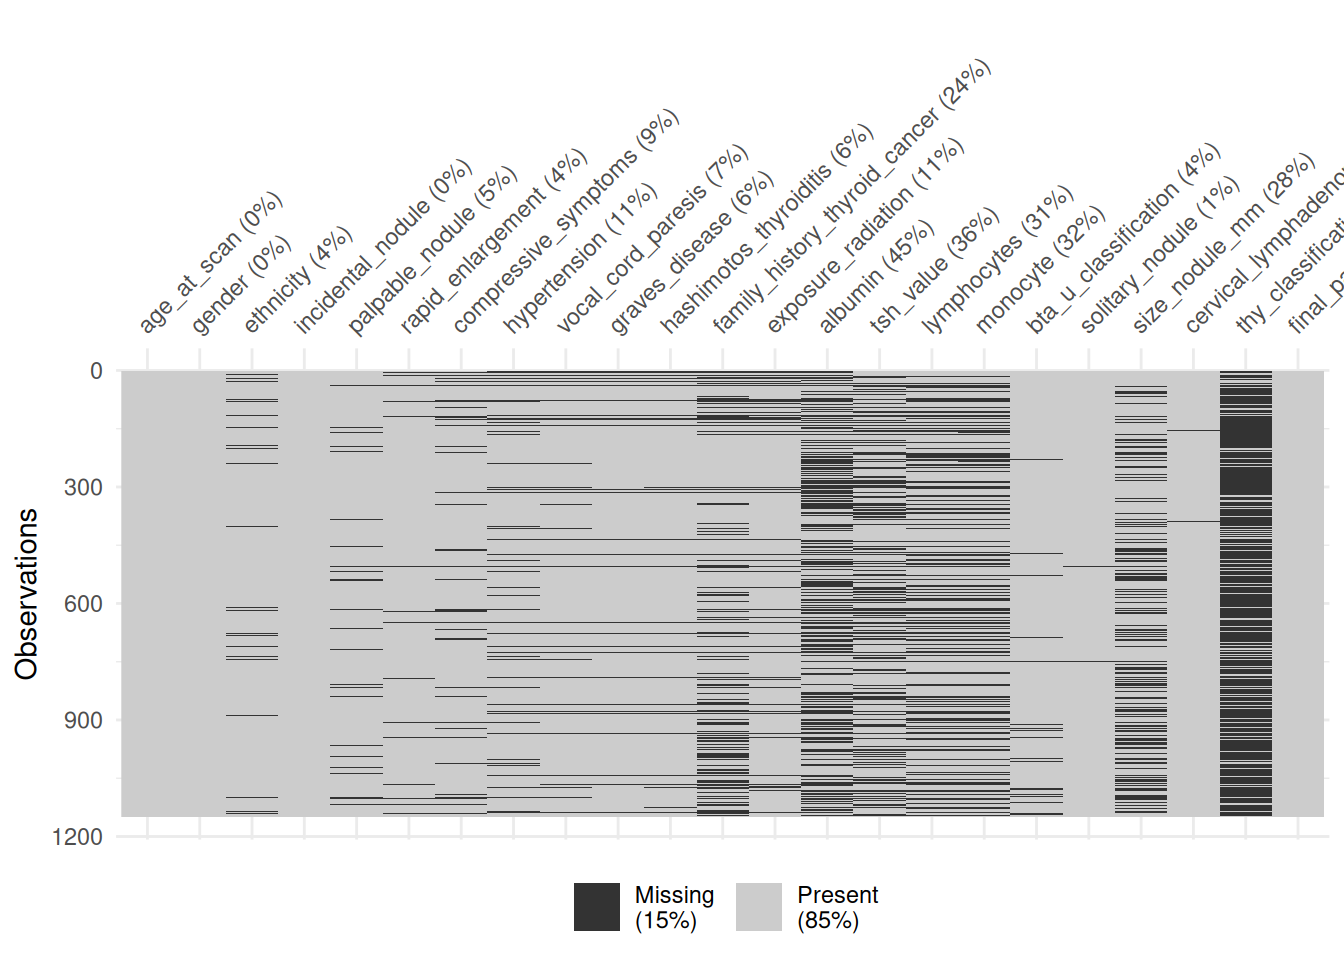

In [ ]:
visdat::vis_miss(df_complete)

The [MICE](https://amices.org/mice/) package also provides tools for visualising missing data and these are shown in figures @fig-mice-vis-missing-clinical, @fig-mice-vis-missing-biomarker and @fig-mice-vis-missing-ultrasound.

The columns of these plots, labelled along the top, show the variable, if a cell is blue it indicates data is present, if it is red it indicates there is missing data. The left-hand side shows the total number of observations for that rows particular combination of variables with number of missing variables indicated on the right. The first row shows that for these variables there are 604 observations with zero missing data across the listed variables, the second row indicates there are 166 observations with *just* `family_history_thyroid_cancer` but there are some with this missing *and other variables*. The numbers on the bottom of the figure indicate the total number of missing observations for that variable (e.g. for `family_history_thyroid_cancer` there is a total of 281 missing observations).

**TODO** - Workout why `out-width: "80%"` isn’t applied to these figures and/or how to make the `All` figure readable.

## Clinical

``` r
mice_missing_clinical <- df_complete |>
  dplyr::select(final_pathology,
                age_at_scan,
                gender,
                incidental_nodule,
                palpable_nodule,
                rapid_enlargement,
                compressive_symptoms,
                hashimotos_thyroiditis,
                family_history_thyroid_cancer,
                cervical_lymphadenopathy) |>
  mice::md.pattern(rotate.names = TRUE)
```

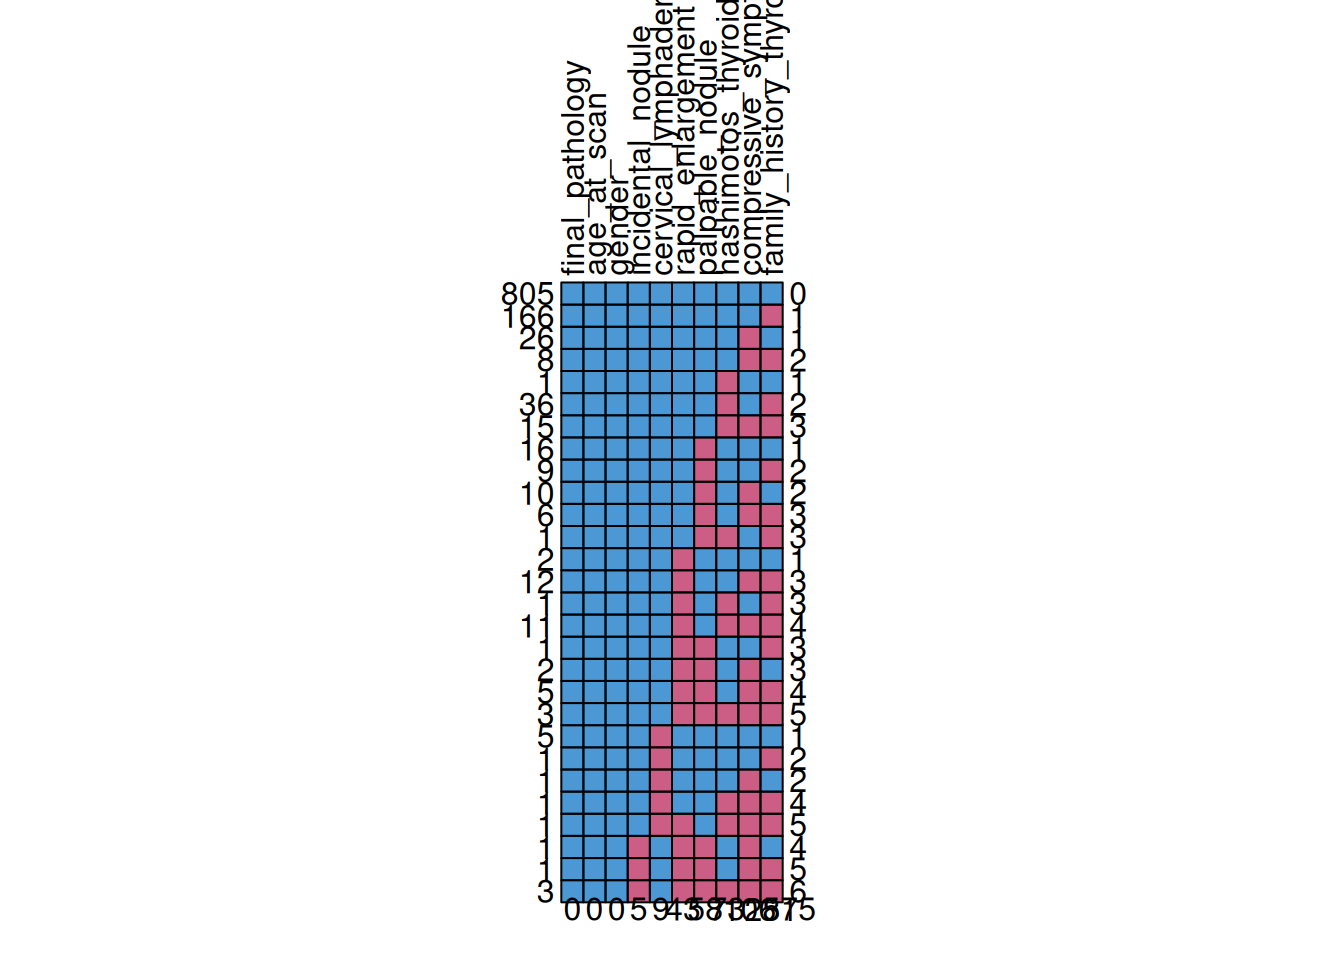

## Biomarkers

``` r
mice_missing_biomarkers <- df_complete |>
  dplyr::select(final_pathology,
                age_at_scan,
                gender,
                tsh_value,
                albumin,
                lymphocytes,
                monocyte) |>
  mice::md.pattern(rotate.names = TRUE)
```

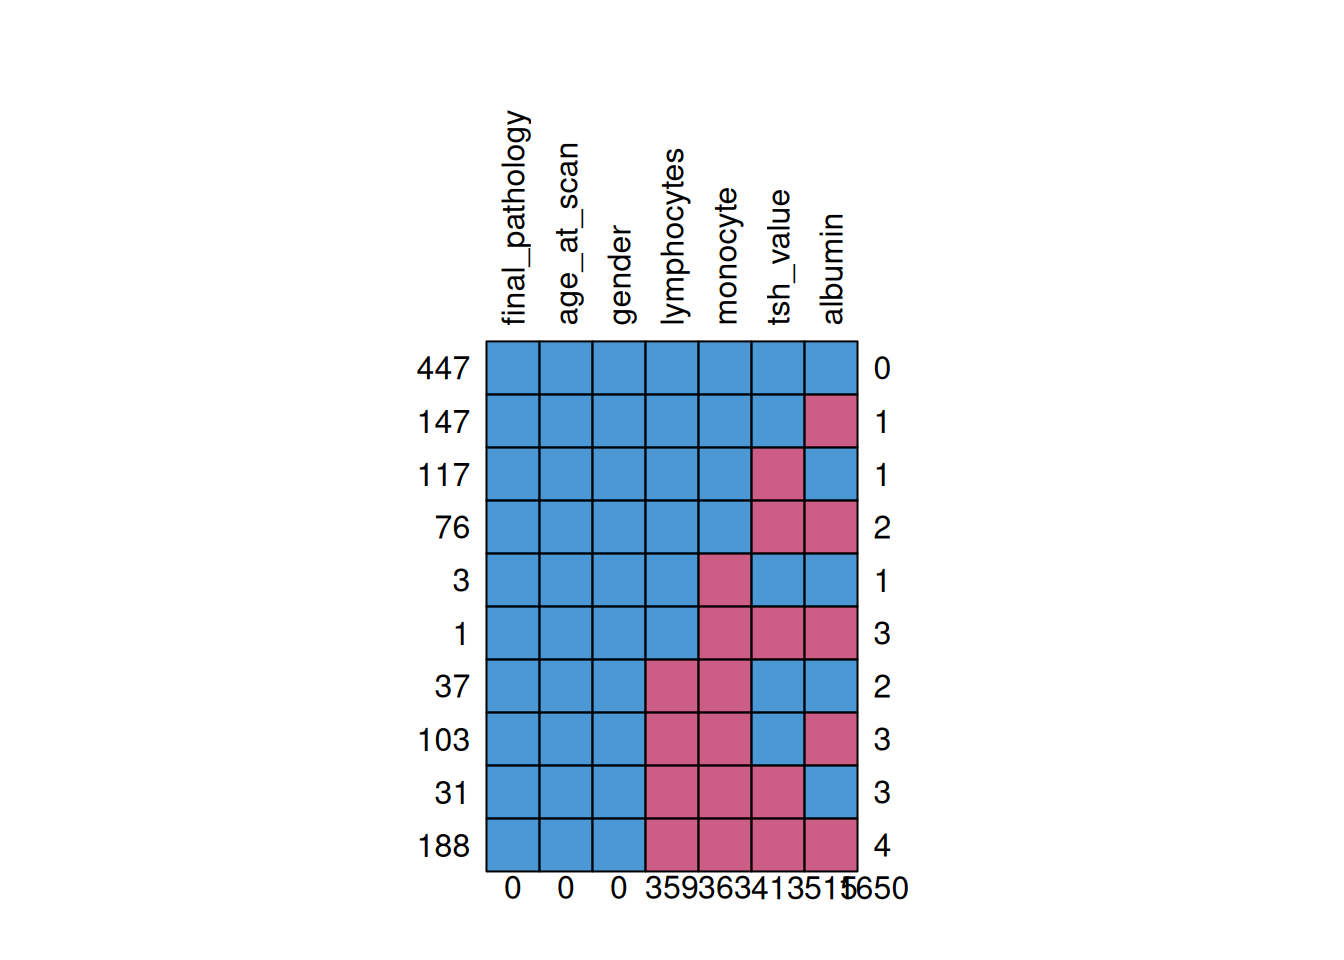

## Ultrasound

``` r
mice_missing_ultrasound <- df_complete |>
  dplyr::select(final_pathology,
                age_at_scan,
                gender,
                bta_u_classification,
                thy_classification,
                size_nodule_mm,
                solitary_nodule) |>
  mice::md.pattern(rotate.names = TRUE)
```

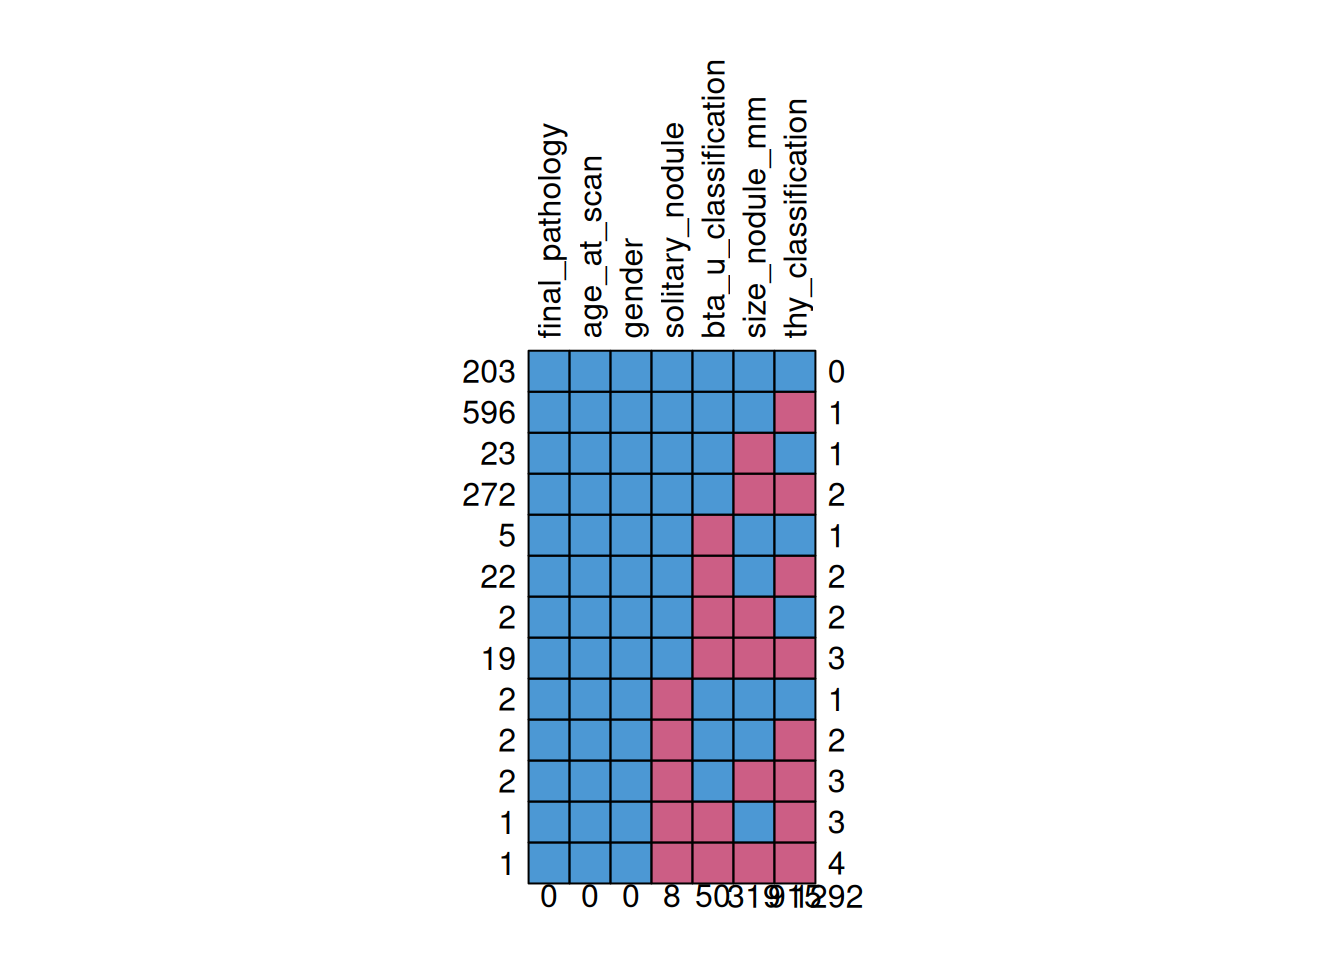

## All

``` r
mice_missing_ultrasound <- df_complete |>
  dplyr::select(final_pathology,
                age_at_scan,
                gender,
                incidental_nodule,
                palpable_nodule,
                rapid_enlargement,
                compressive_symptoms,
                hashimotos_thyroiditis,
                family_history_thyroid_cancer,
                cervical_lymphadenopathy,
                tsh_value,
                albumin,
                lymphocytes,
                monocyte,
                bta_u_classification,
                thy_classification,
                size_nodule_mm,
                solitary_nodule) |>
  mice::md.pattern(rotate.names = TRUE)
```

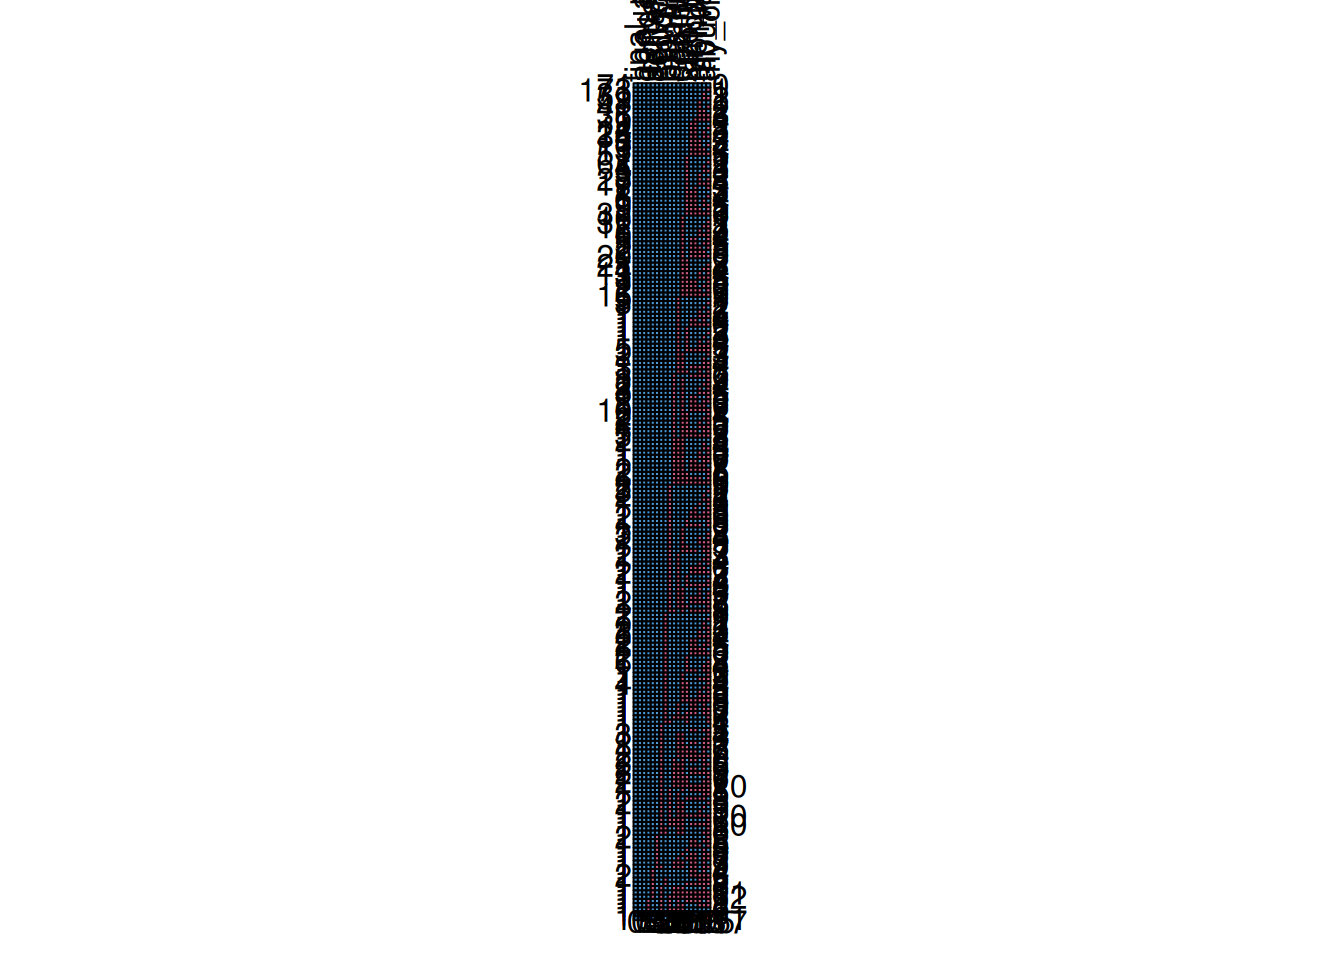

#### Imputation

The [MICE](https://amices.org/mice/) package @mice offers a number of different methods for imputing variables (see \[documentation\]\[mice_details\]) we have investigated Predictive Mean Matching (PMM), Classification and Regression Trees (CART) and Random Forests (RF). Four rounds of imputation using each method were made.

A comparison of distributions/proportions before and after imputation are presented below to allow assessment of the utility of each method.

In [ ]:
## Setup MICE mids for various methods
##

#' Impute missing data and plot the results using the mice package.
#'
#' This is a wrapper around the functionality of the \href{https://amices.org/mice}{mice} and
#' \href{https://amices.org/ggmice}{ggmice} packages for Multivariate Imputation by Chained Equations and visualisation
#' of the resulting imputed datasets. Users should refer to the documentation for details of the options available.
#'
#' The wrapper uses \code{\link[mice]{futuremice}} to perform imputation in parallel using the same number of cores as
#' the requested number of imputations. This speeds up the process but be wary if your computer has limited cores.
#'
#' @param df data.frame|tibble Data frame or tibble of original data.
#' @param imputations int Number of imputations to perform.
#' @param iterations int Number of iterations to perform for imputation.
#' @param method str Method of imputation to use, see the Details section of \code{\link[mice]{mice}}.
#' @param action str Action to take when running \code{\link[mice]{complete}}.
#' @param include bool Logical of whether to include the original dataset in the output.
#' @param seed int Seed for random number generation
#'
#'
impute_data <- function(df = df_complete,
                        outcome_var = "final_pathology",
                        imputations = 4,
                        iterations = 5,
                        method = "pmm",
                        action = "long",
                        include = TRUE,
                        continuous = c("albumin", "tsh_value", "lymphocytes", "monocyte", "size_nodule_mm"),
                        categorical = c("ethnicity",
                                        "incidental_nodule",
                                        "palpable_nodule",
                                        "rapid_enlargement",
                                        "compressive_symptoms",
                                        "hypertension",
                                        "vocal_cord_paresis",
                                        "graves_disease",
                                        "hashimotos_thyroiditis",
                                        "family_history_thyroid_cancer",
                                        "exposure_radiation",
                                        "bta_u_classification",
                                        "solitary_nodule",
                                        "cervical_lymphadenopathy",
                                        "thy_classification"),
                        seed = 123) {
    results <- list()
    ## Setup imputation
    results$mids <- df |>
        dplyr::select(-{{ outcome_var }}) |>
        mice::futuremice(m = imputations,
                         method = method,
                         n.core = imputations,
                         iterations = iterations,
                         parallelseed  = seed)
    ## Generate output dataset,
    results$imputed <- results$mids |>
        mice::complete(action = "long", include = include)
    ## Convert the .imp variable which indicates the imputation set to factor with original dataset labelled as such
    results$imputed <- results$imputed |>
         dplyr::mutate(.imp = factor(.imp,
                                     levels = seq(0, imputations, 1),
                                     labels = c("Original", as.character(seq(1, imputations, 1)))))
    ## We need to bind the outcome variable to each imputed dataset so they can be used in analyses
    outcome = df[[outcome_var]]
    n = imputations
    while(n > 0) {
        outcome = append(outcome, df[[outcome_var]])
        n <- n - 1
    }
    results$imputed <- cbind(results$imputed, outcome)
    colnames(results$imputed) <- stringr::str_replace(colnames(results$imputed), "outcome", outcome_var)
    ## Plot traces of the imputation over iteration
    results$trace <- ggmice::plot_trace(results$mid)
    ## Plot correlation between variables
    results$corr <- ggmice::plot_corr(df,
                                      label = TRUE,
                                      square = TRUE,
                                      rotate = TRUE,
                                      diagonal = FALSE)
    ## Plot histograms of continuous variables
    results$histogram <- list()
    for (var in continuous) {
        results$histogram[[var]] <- ggmice::ggmice(results$mids,
                                                   ggplot2::aes(x = .data[[var]],
                                                                group = .imp)) +
                                        ggplot2::geom_density()
    }
    ## Scatterplots and bar charts for categorical variables
    results$scatter <- list()
    results$bar_chart <- list()
    for (var in categorical) {
        results$scatter[[var]] <- ggmice::ggmice(results$mids,
                                                 ggplot2::aes(x = .imp,
                                                              y = .data[[var]])) +
                                        ggplot2::geom_jitter()
        results$bar_chart[[var]] <- ggmice::ggmice(results$mids,
                                                   ggplot2::aes(x = .data[[var]],
                                                                fill = .imp)) +
                                        ggplot2::geom_bar(position = "dodge")
        ## Above bar chart is often hard to read, instead make a custom bar chart of the propotion in each category by
        ## each imputation
        results$bar_chart_prop[[var]] <- results$imputed |>
                   dplyr::group_by(.imp, .data[[var]]) |>
                   dplyr::summarize(count = n()) |>
                   dplyr::group_by(.imp) |>
                   dplyr::mutate(prop = count / sum(count)) |>
                   ggplot2::ggplot(aes(x = .data[[var]],
                                       y = prop,
                                       fill = .imp)) +
                   ggplot2::geom_bar(stat = "identity", position = "dodge") +
                   ggplot2::theme(legend.position = "none")

    }
    results
}

## Impute using three different methods using the above impute_data() wrapper
imputations = 5
iterations = 5
mice_pmm <- impute_data(method = "pmm",
                        imputations = imputations,
                        iterations = iterations,
                        seed = 684613)

`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.

`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.

`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.
`summarise()` has grouped output by '.imp'. You can override using the
`.groups` argument.

The distribution of observed (blue) and imputed values for continous variables are shown in the Tab set immediately below and across all variables the imputed distrubtions follow closely that of the observed indicating that the imputation methods have worked well for all three methods tested.

## Albumin

``` r
cowplot::plot_grid(mice_pmm$histogram$albumin,
                   mice_cart$histogram$albumin,
                   mice_rf$histogram$albumin,
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

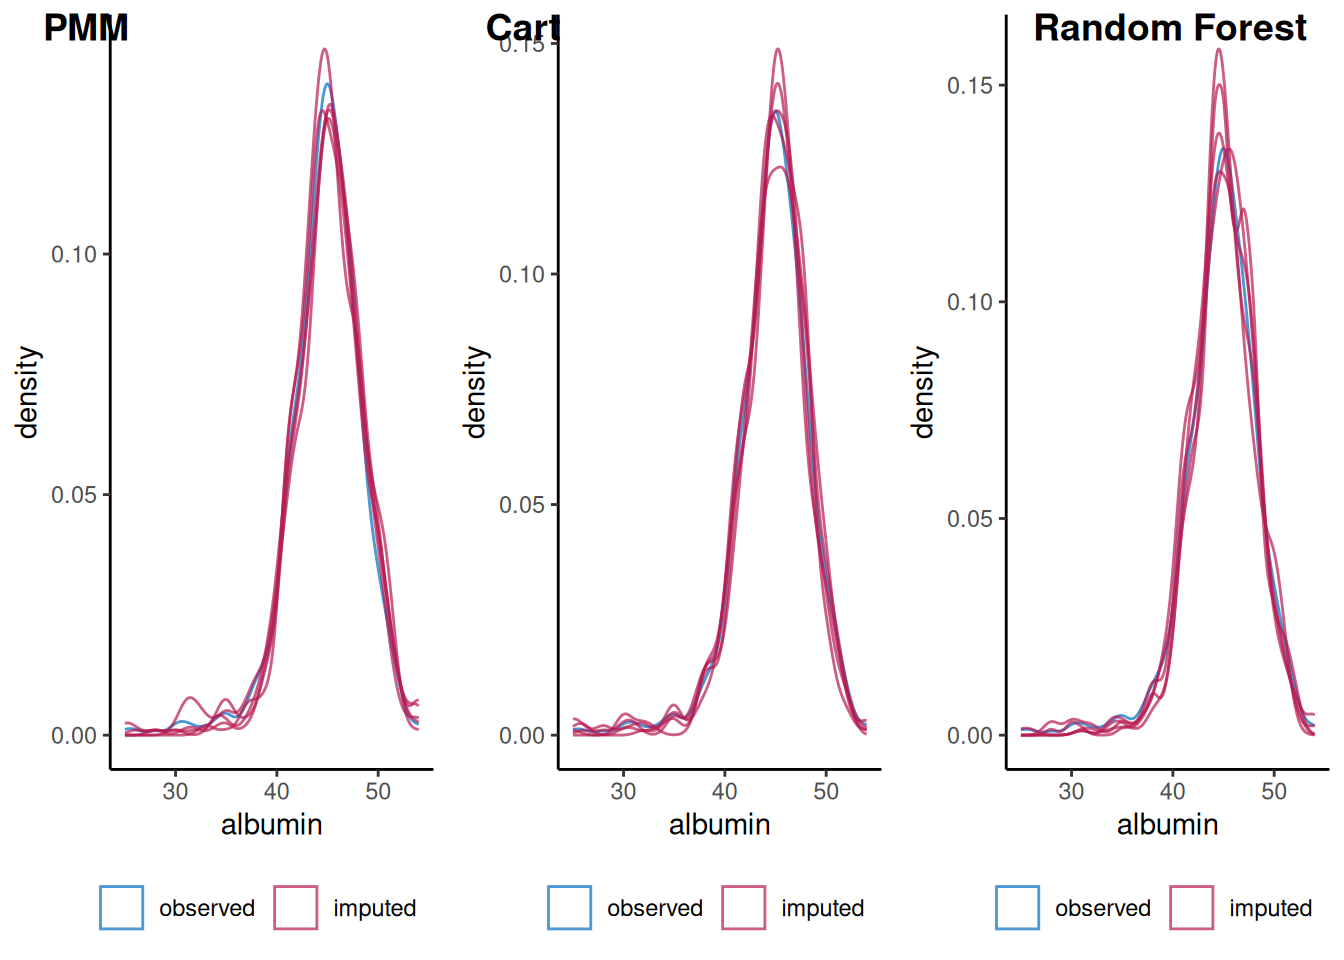

## Monocyte

``` r
cowplot::plot_grid(mice_pmm$histogram$monocyte,
                   mice_cart$histogram$monocyte,
                   mice_rf$histogram$monocyte,
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

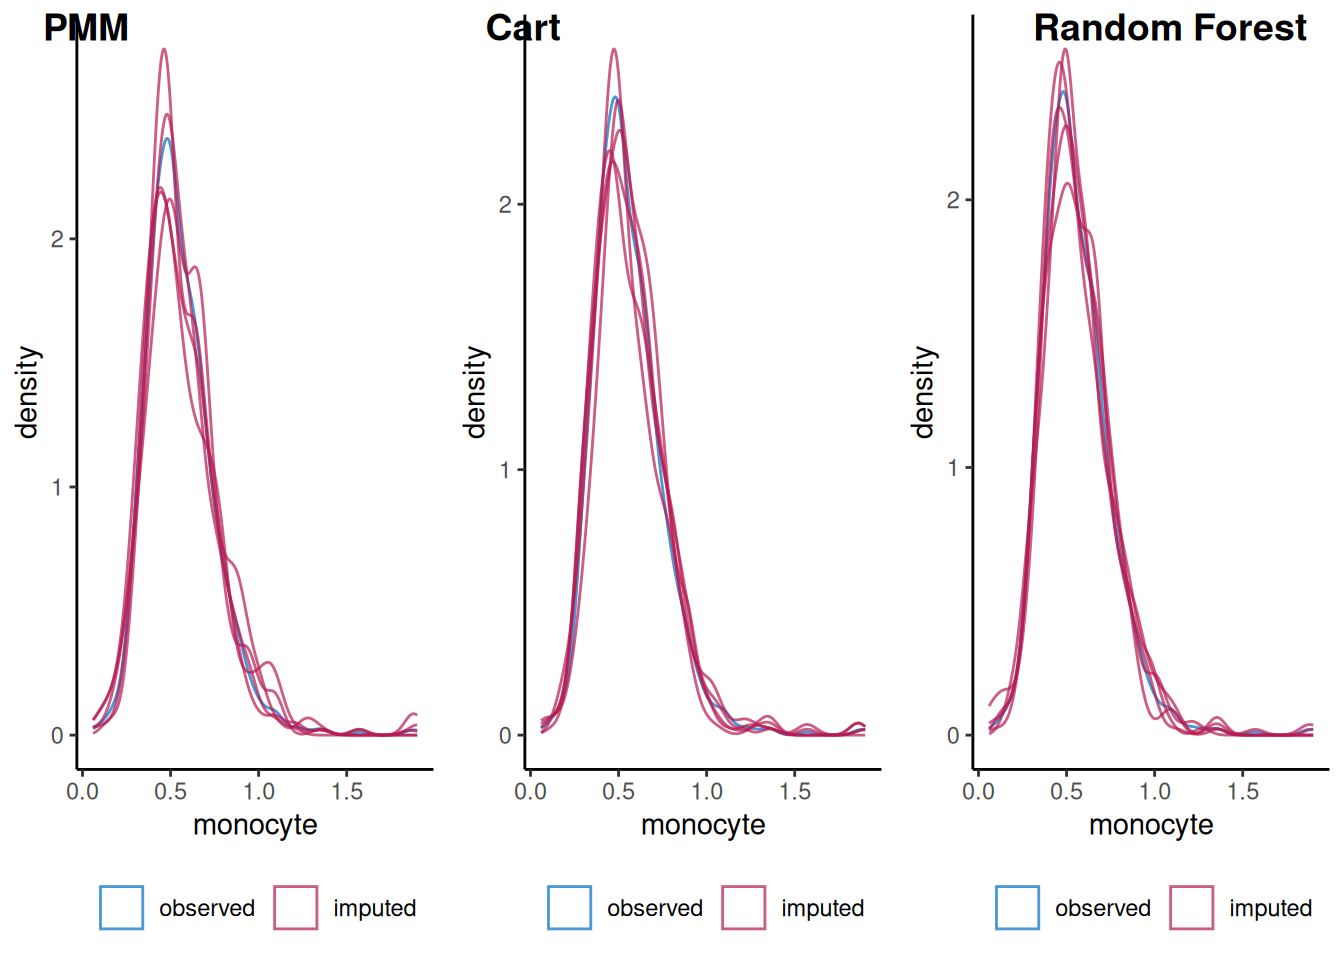

## Lymphocytes

``` r
cowplot::plot_grid(mice_pmm$histogram$lymphocytes,
                   mice_cart$histogram$lymphocytes,
                   mice_rf$histogram$lymphocytes,
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

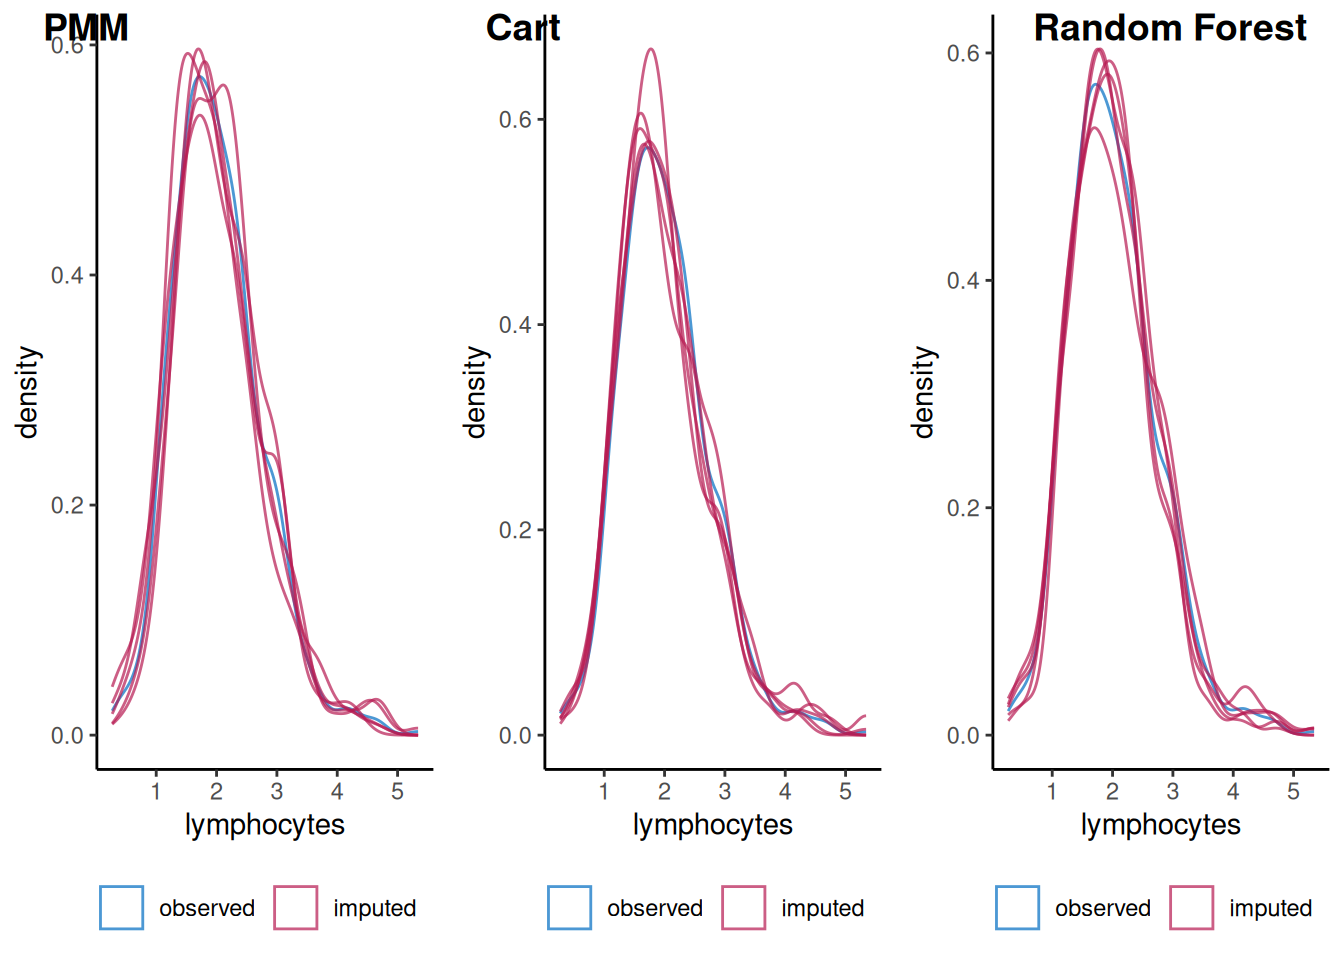

## TSH Value

``` r
cowplot::plot_grid(mice_pmm$histogram$tsh_value,
                   mice_cart$histogram$tsh_value,
                   mice_rf$histogram$tsh_value,
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

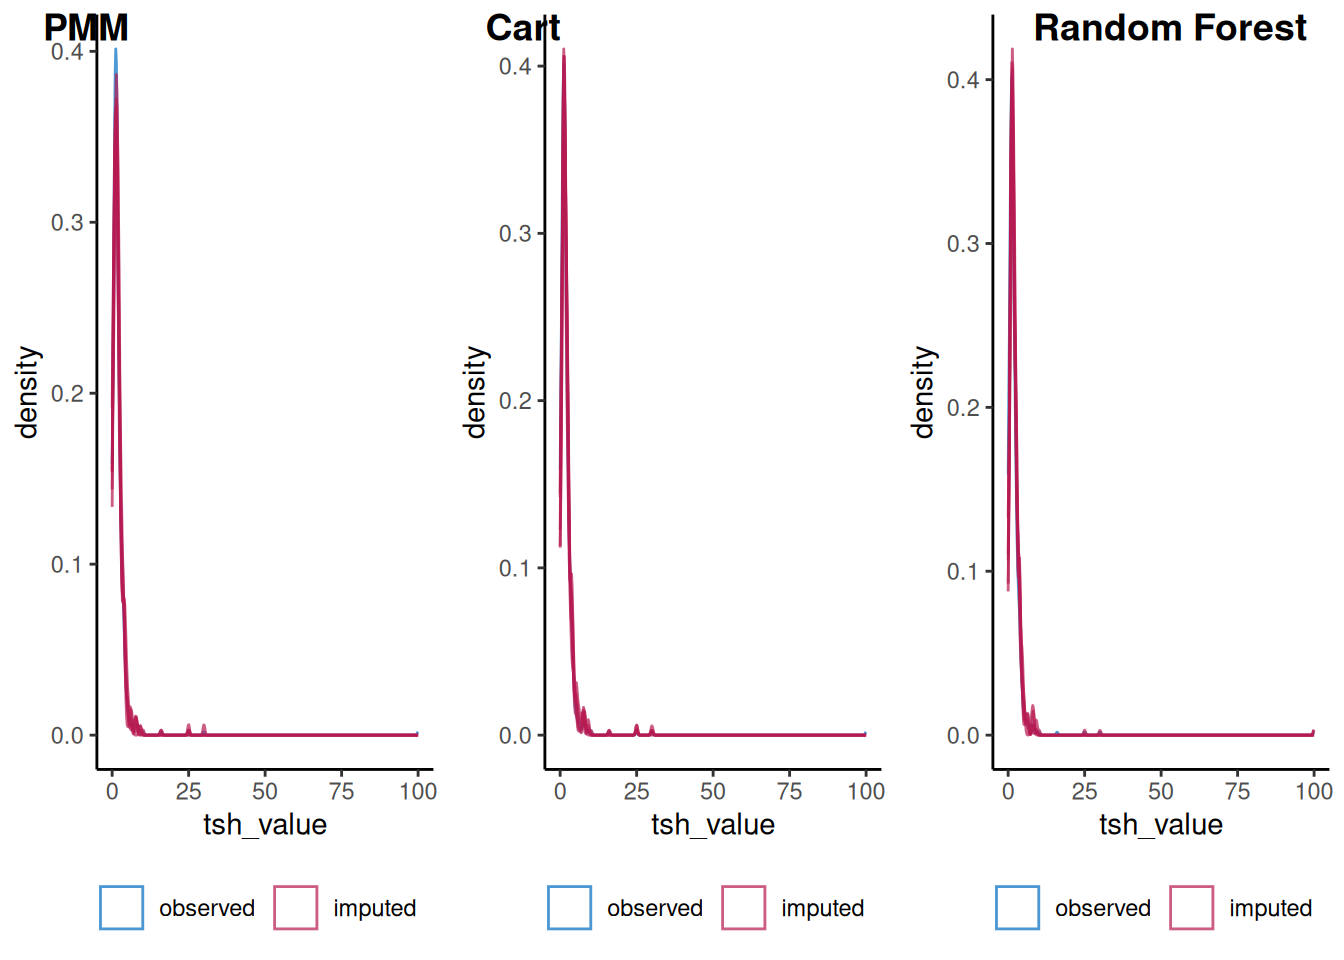

## Nodule Size

``` r
cowplot::plot_grid(mice_pmm$histogram$size_nodule_mm,
                   mice_cart$histogram$size_nodule_mm,
                   mice_rf$histogram$size_nodule_mm,
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

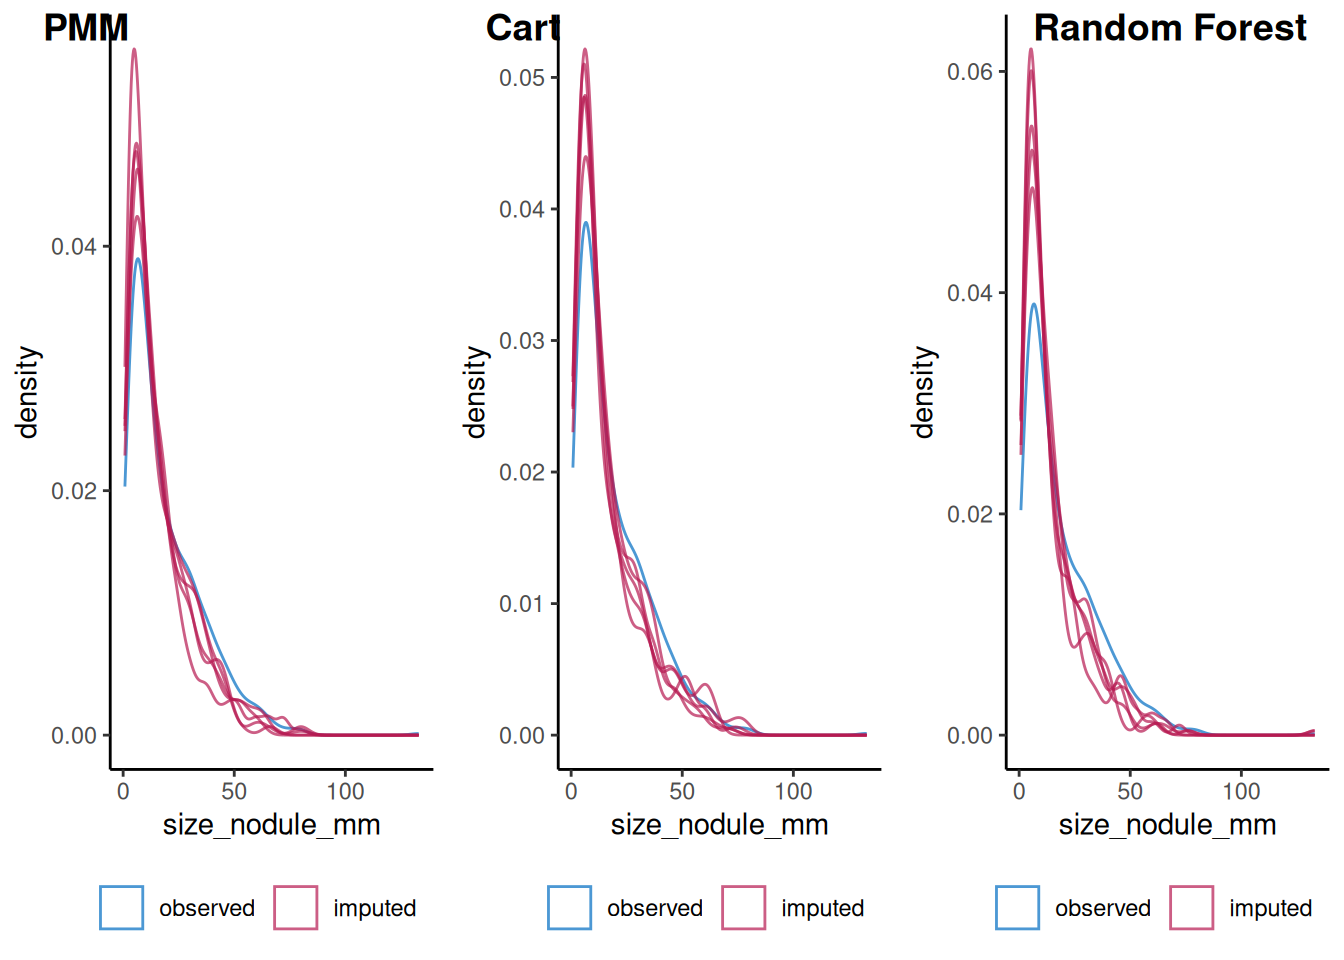

Similarly for the discrete variables the distribution of proportions in the original and each imputed dataset are shown below. The observed (in pink/peach) always have slightly lower proportions of the observed values because of the presence of missing (evidences by only one group being present in the `NA` column) but as with the continuous variables across all imputation methods the proportions are roughly as expected again indicating that imputation has worked well.

**TODO** - Extract the legends from individual plots and add them to the end of each row, see the [cowplot shared legends article](https://wilkelab.org/cowplot/articles/shared_legends.html) for pointers on how to do this. Should ideally also get the `fill` colours to align with those used by `ggmice`.

## Incidental Nodule

``` r
cowplot::plot_grid(## mice_pmm$scatter$incidental_nodule + theme(legend.position = "None"),
                   ## mice_cart$scatter$incidental_nodule + theme(legend.position = "None"),
                   ## mice_rf$scatter$incidental_nodule + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$incidental_nodule + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$incidental_nodule + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$incidental_nodule + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$incidental_nodule + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$incidental_nodule + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$incidental_nodule + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

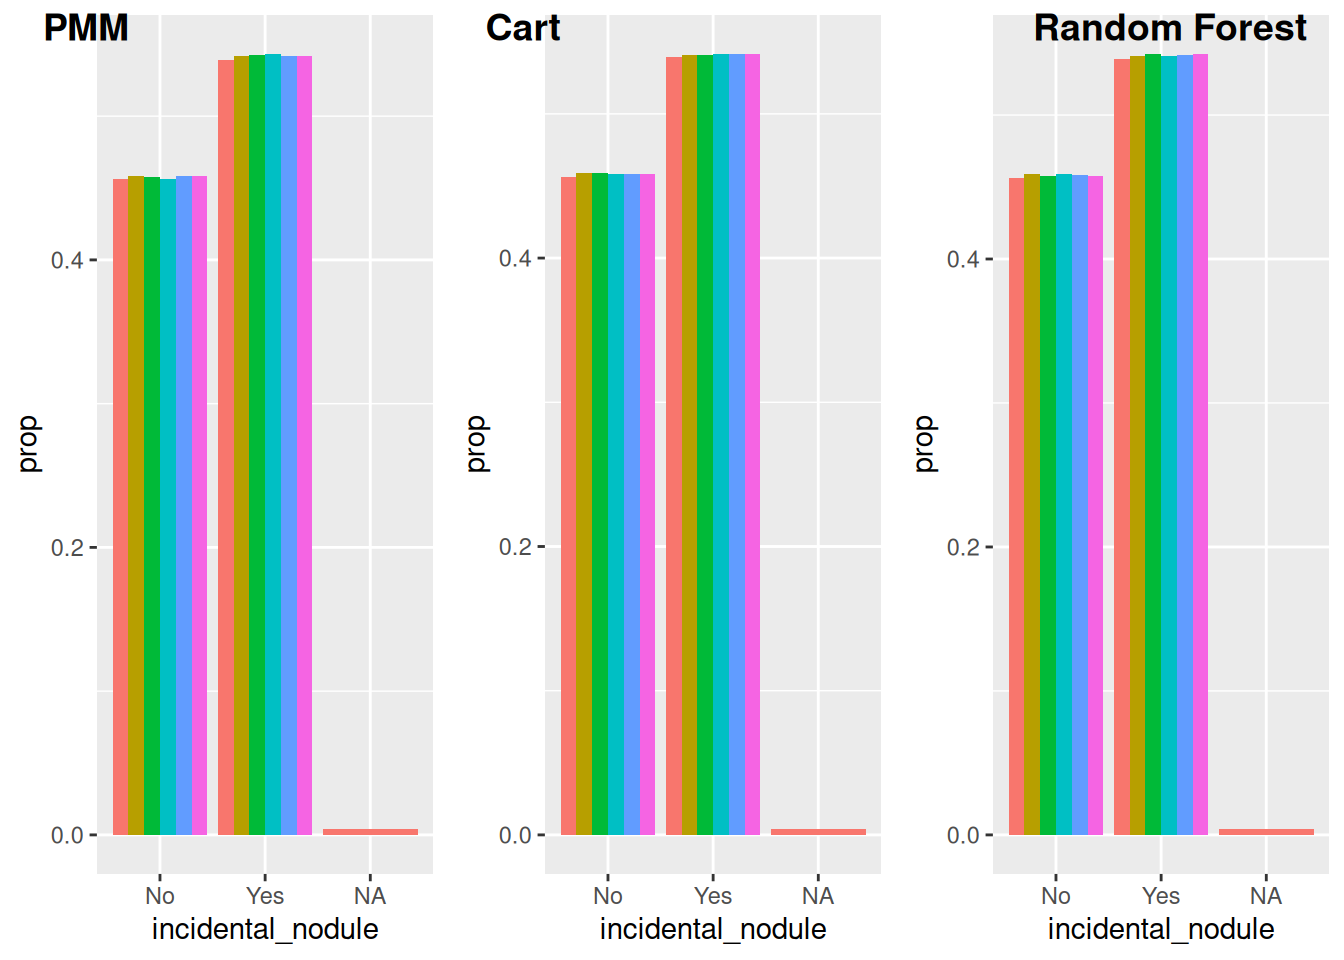

## Palpable Nodule

``` r
cowplot::plot_grid(## mice_pmm$scatter$palpable_nodule + theme(legend.position = "None"),
                   ## mice_cart$scatter$palpable_nodule + theme(legend.position = "None"),
                   ## mice_rf$scatter$palpable_nodule + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$palpable_nodule + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$palpable_nodule + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$palpable_nodule + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$palpable_nodule + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$palpable_nodule + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$palpable_nodule + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

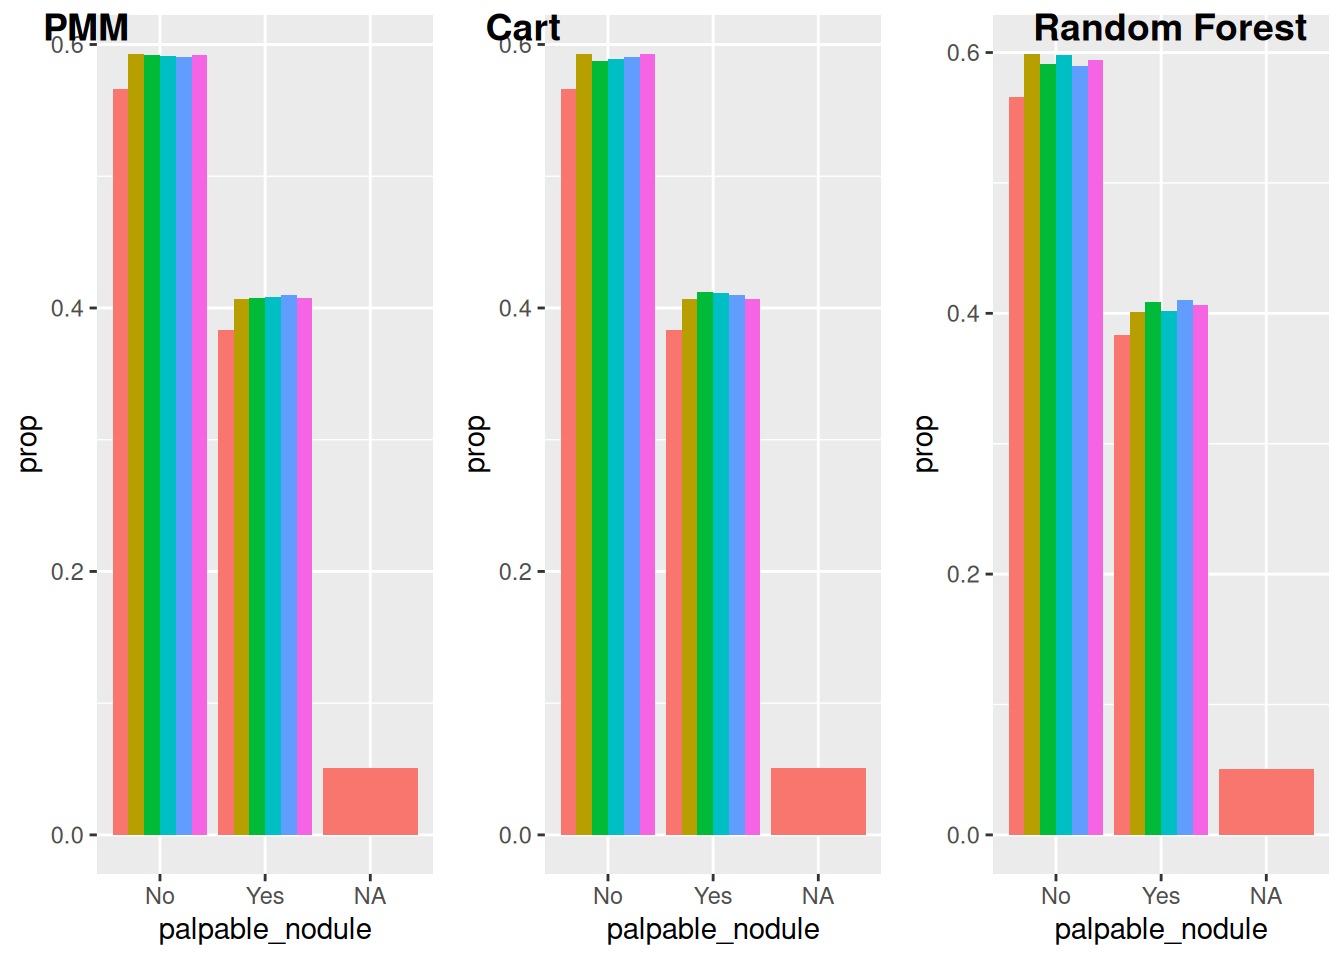

## Rapid Enlargement

``` r
cowplot::plot_grid(## mice_pmm$scatter$rapid_enlargement + theme(legend.position = "None"),
                   ## mice_cart$scatter$rapid_enlargement + theme(legend.position = "None"),
                   ## mice_rf$scatter$rapid_enlargement + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$rapid_enlargement + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$rapid_enlargement + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$rapid_enlargement + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$rapid_enlargement + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$rapid_enlargement + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$rapid_enlargement + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

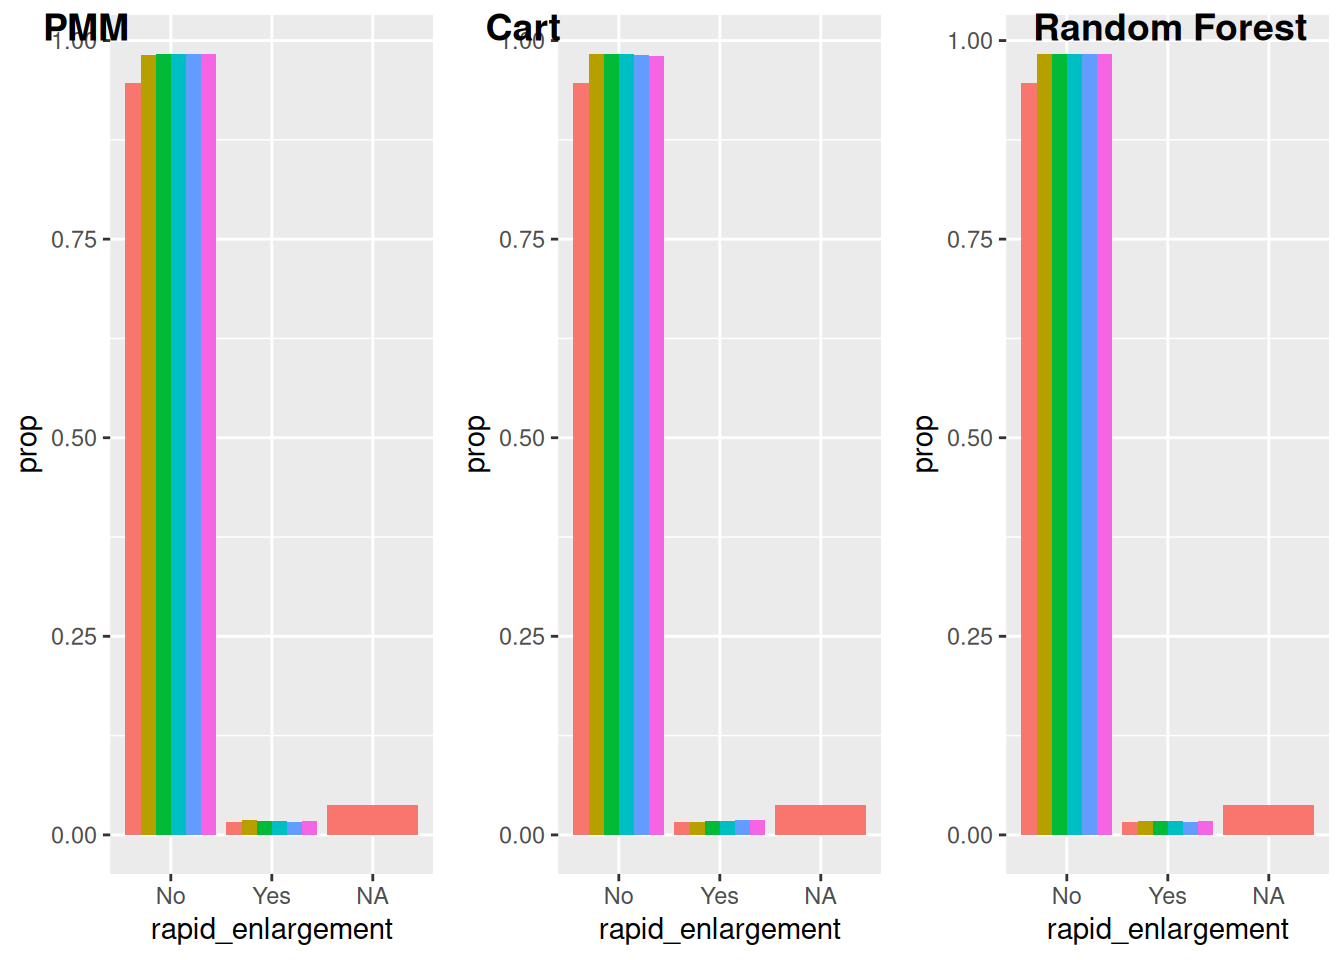

## Compressive Symptoms

``` r
cowplot::plot_grid(## mice_pmm$scatter$compressive_symptoms + theme(legend.position = "None"),
                   ## mice_cart$scatter$compressive_symptoms + theme(legend.position = "None"),
                   ## mice_rf$scatter$compressive_symptoms + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$compressive_symptoms + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$compressive_symptoms + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$compressive_symptoms + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$compressive_symptoms + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$compressive_symptoms + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$compressive_symptoms + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

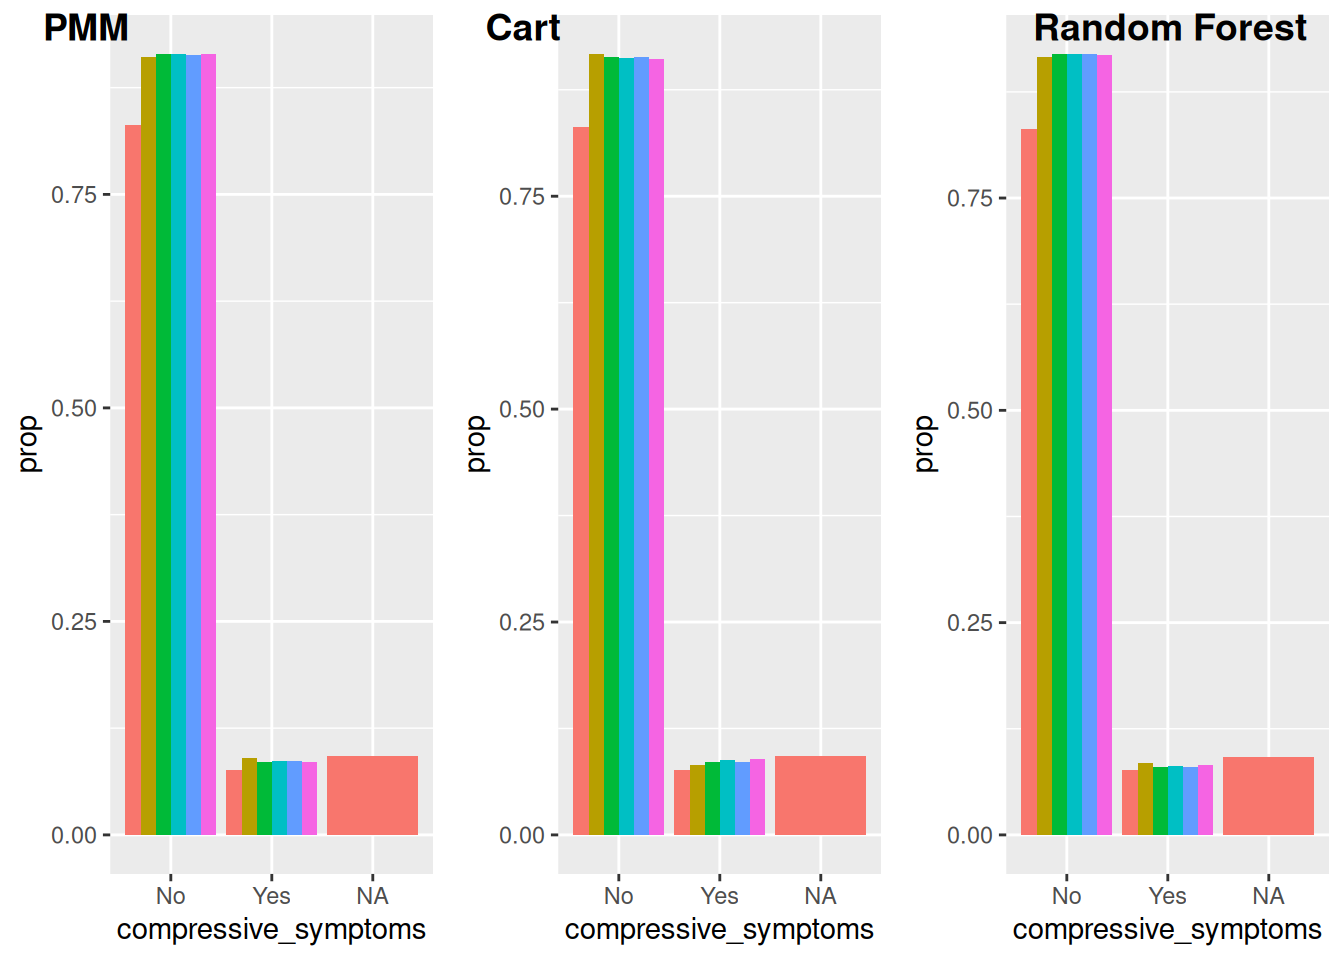

## Hypertension

``` r
cowplot::plot_grid(## mice_pmm$scatter$hypertension + theme(legend.position = "None"),
                   ## mice_cart$scatter$hypertension + theme(legend.position = "None"),
                   ## mice_rf$scatter$hypertension + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$hypertension + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$hypertension + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$hypertension + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$hypertension + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$hypertension + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$hypertension + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

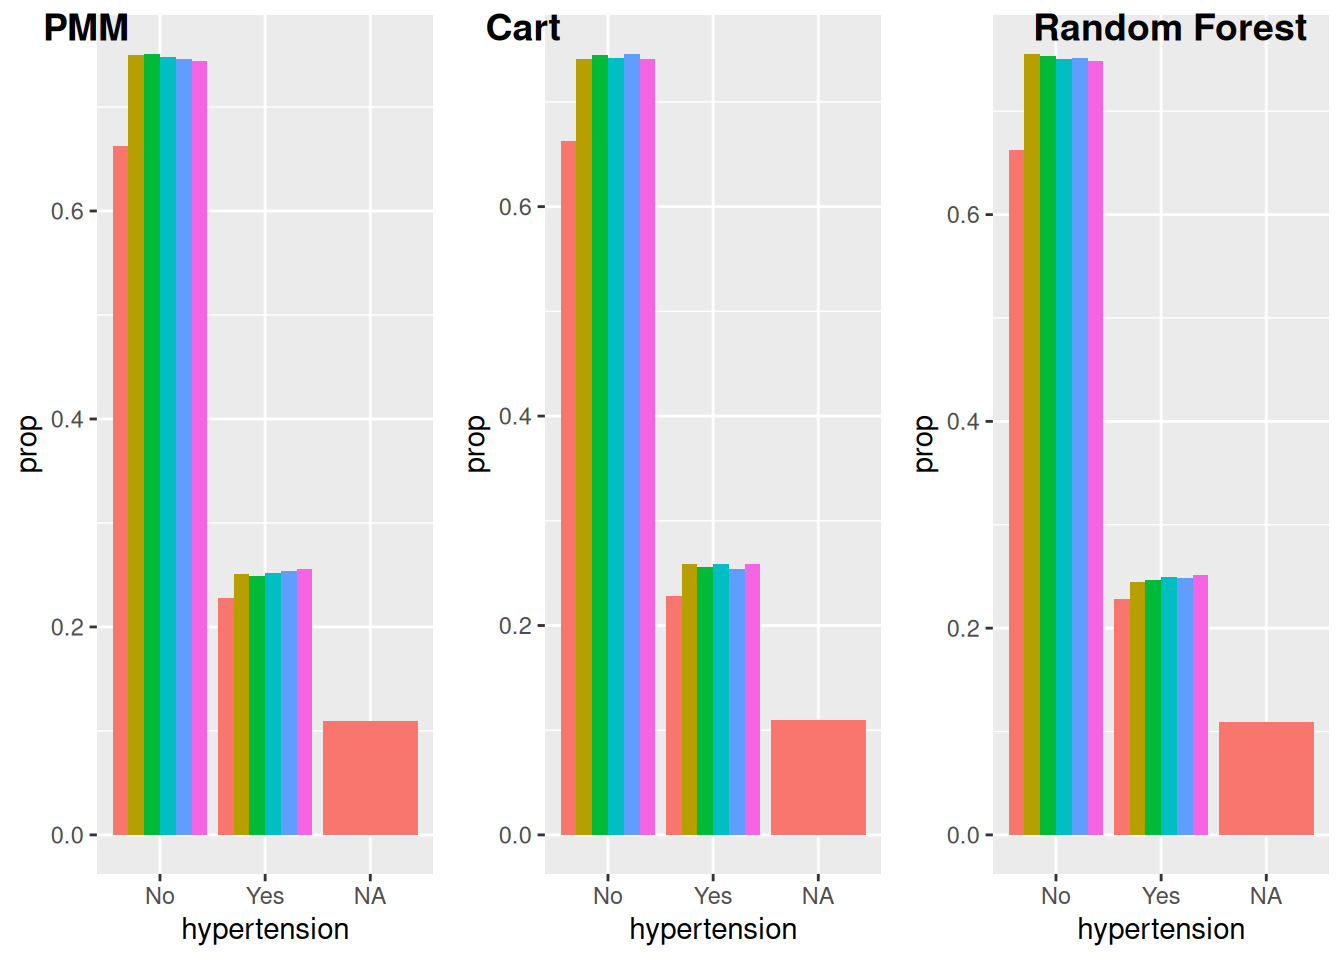

## Vocal Cord Paresis

``` r
cowplot::plot_grid(## mice_pmm$scatter$vocal_cord_paresis + theme(legend.position = "None"),
                   ## mice_cart$scatter$vocal_cord_paresis + theme(legend.position = "None"),
                   ## mice_rf$scatter$vocal_cord_paresis + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$vocal_cord_paresis + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$vocal_cord_paresis + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$vocal_cord_paresis + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$vocal_cord_paresis + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$vocal_cord_paresis + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$vocal_cord_paresis + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

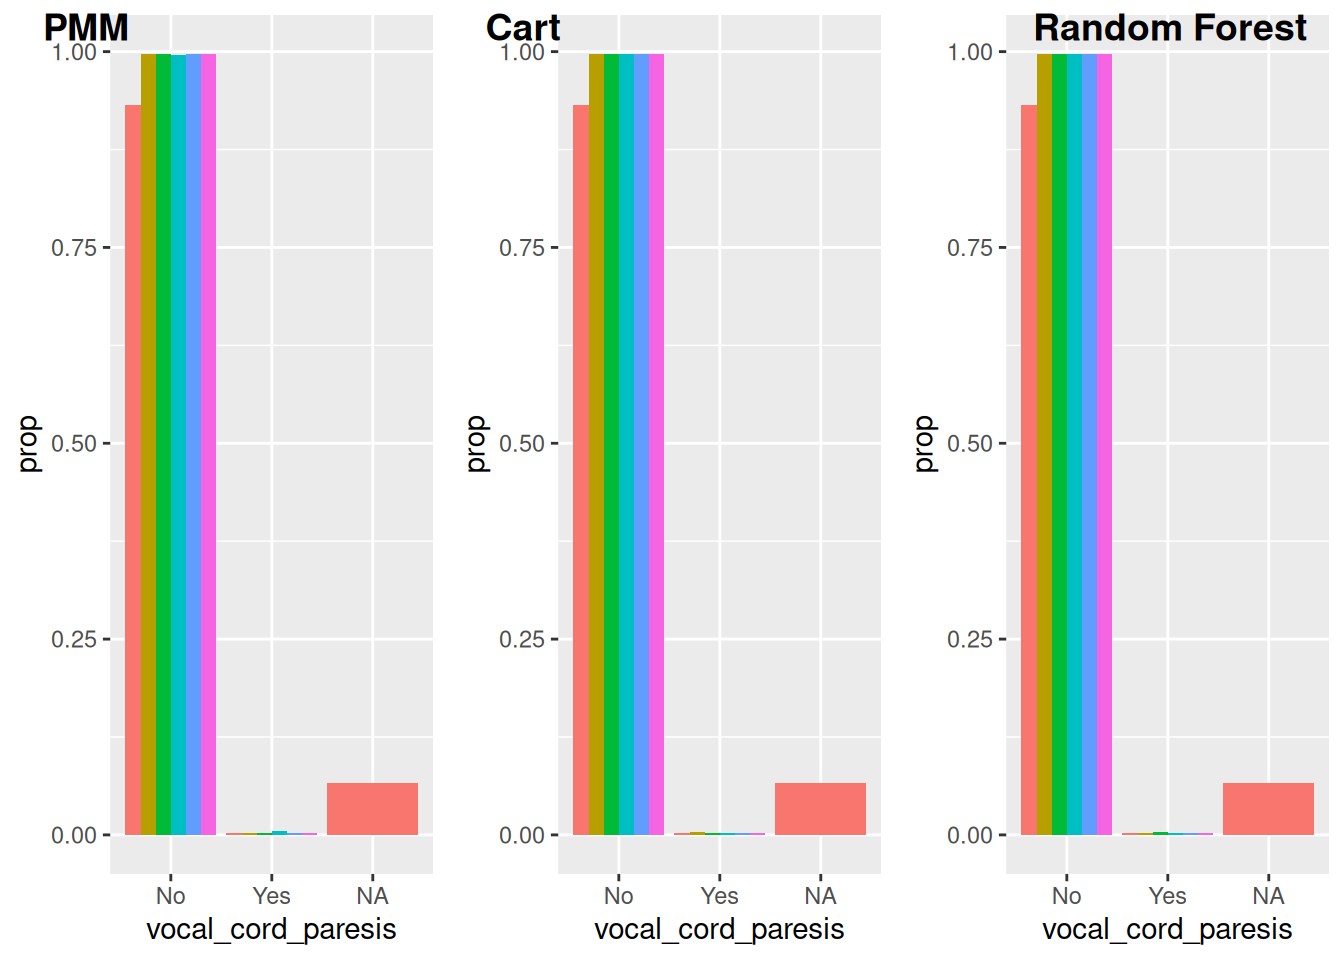

## Graves Disease

``` r
cowplot::plot_grid(## mice_pmm$scatter$graves_disease + theme(legend.position = "None"),
                   ## mice_cart$scatter$graves_disease + theme(legend.position = "None"),
                   ## mice_rf$scatter$graves_disease + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$graves_disease + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$graves_disease + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$graves_disease + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$graves_disease + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$graves_disease + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$graves_disease + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

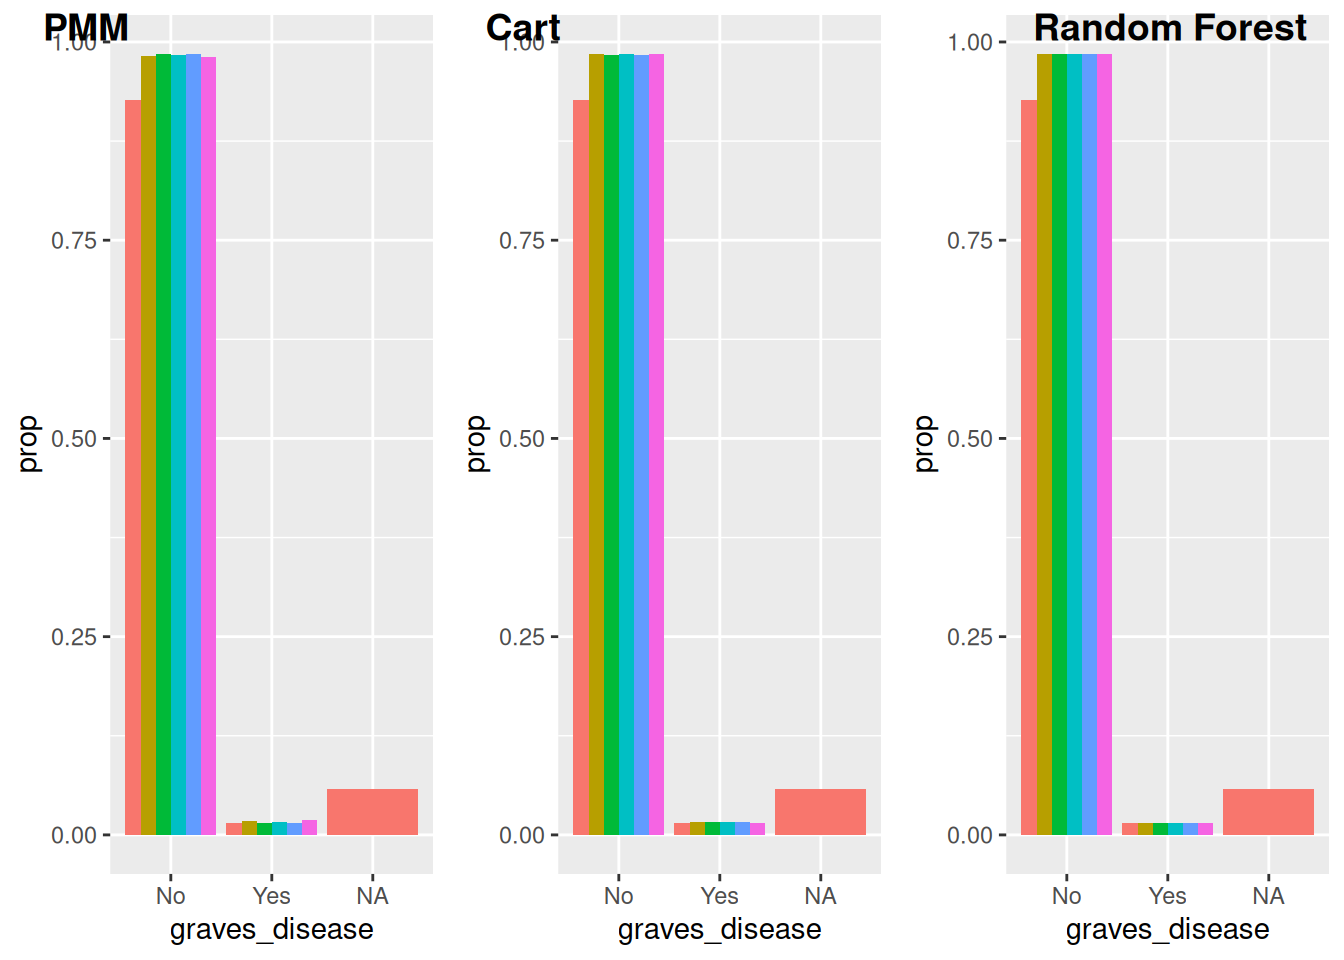

## Hashimotos Thyroiditis

``` r
cowplot::plot_grid(## mice_pmm$scatter$hashimotos_thyroiditis + theme(legend.position = "None"),
                   ## mice_cart$scatter$hashimotos_thyroiditis + theme(legend.position = "None"),
                   ## mice_rf$scatter$hashimotos_thyroiditis + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$hashimotos_thyroiditis + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$hashimotos_thyroiditis + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$hashimotos_thyroiditis + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$hashimotos_thyroiditis + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$hashimotos_thyroiditis + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$hashimotos_thyroiditis + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

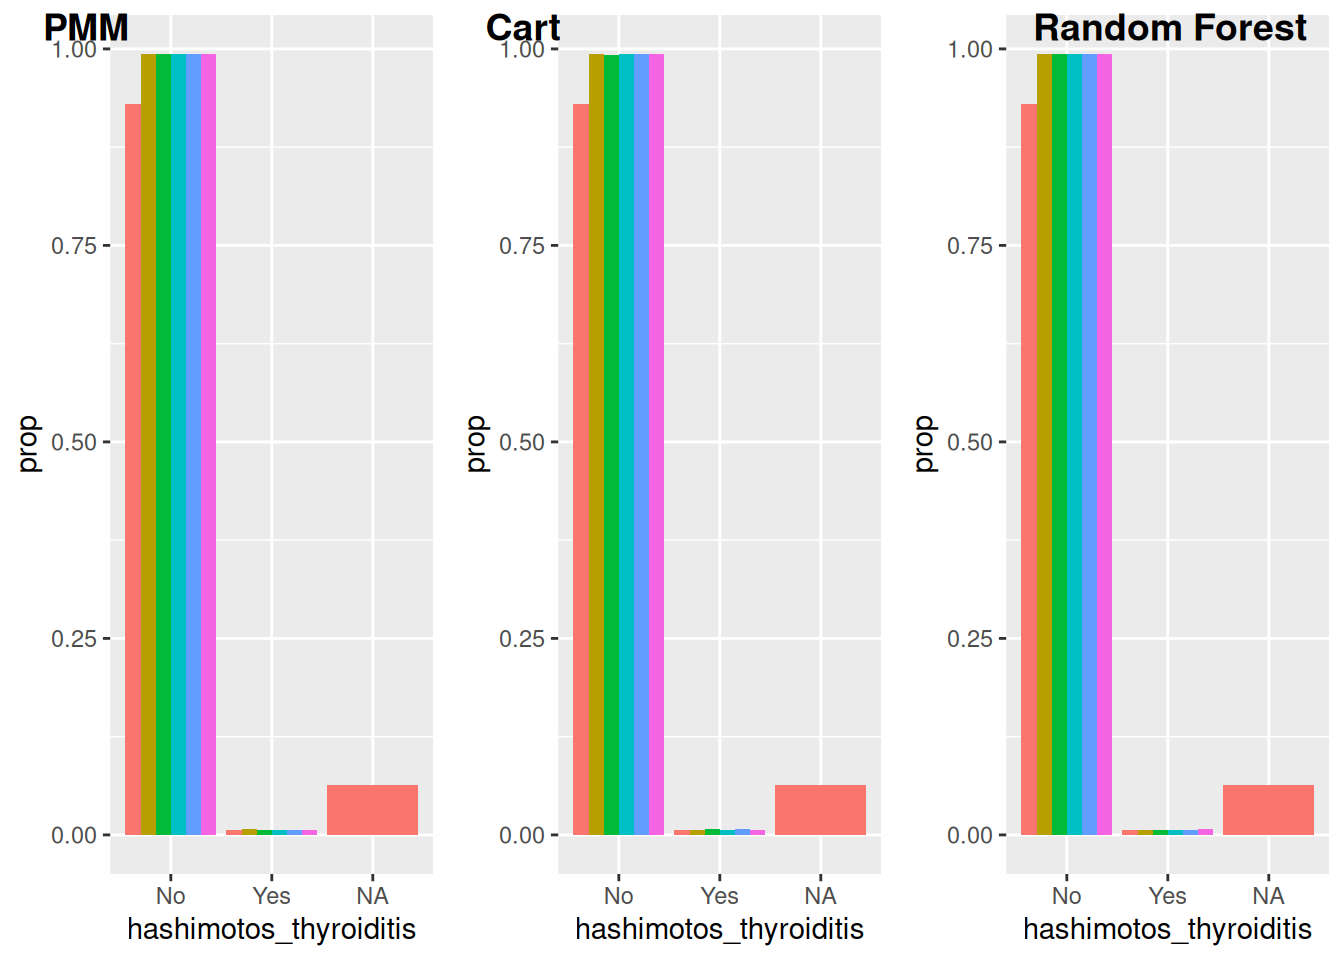

## Family History

``` r
cowplot::plot_grid(## mice_pmm$scatter$family_history + theme(legend.position = "None"),
                   ## mice_cart$scatter$family_history + theme(legend.position = "None"),
                   ## mice_rf$scatter$family_history + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$family_history + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$family_history + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$family_history + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$family_history + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$family_history + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$family_history + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

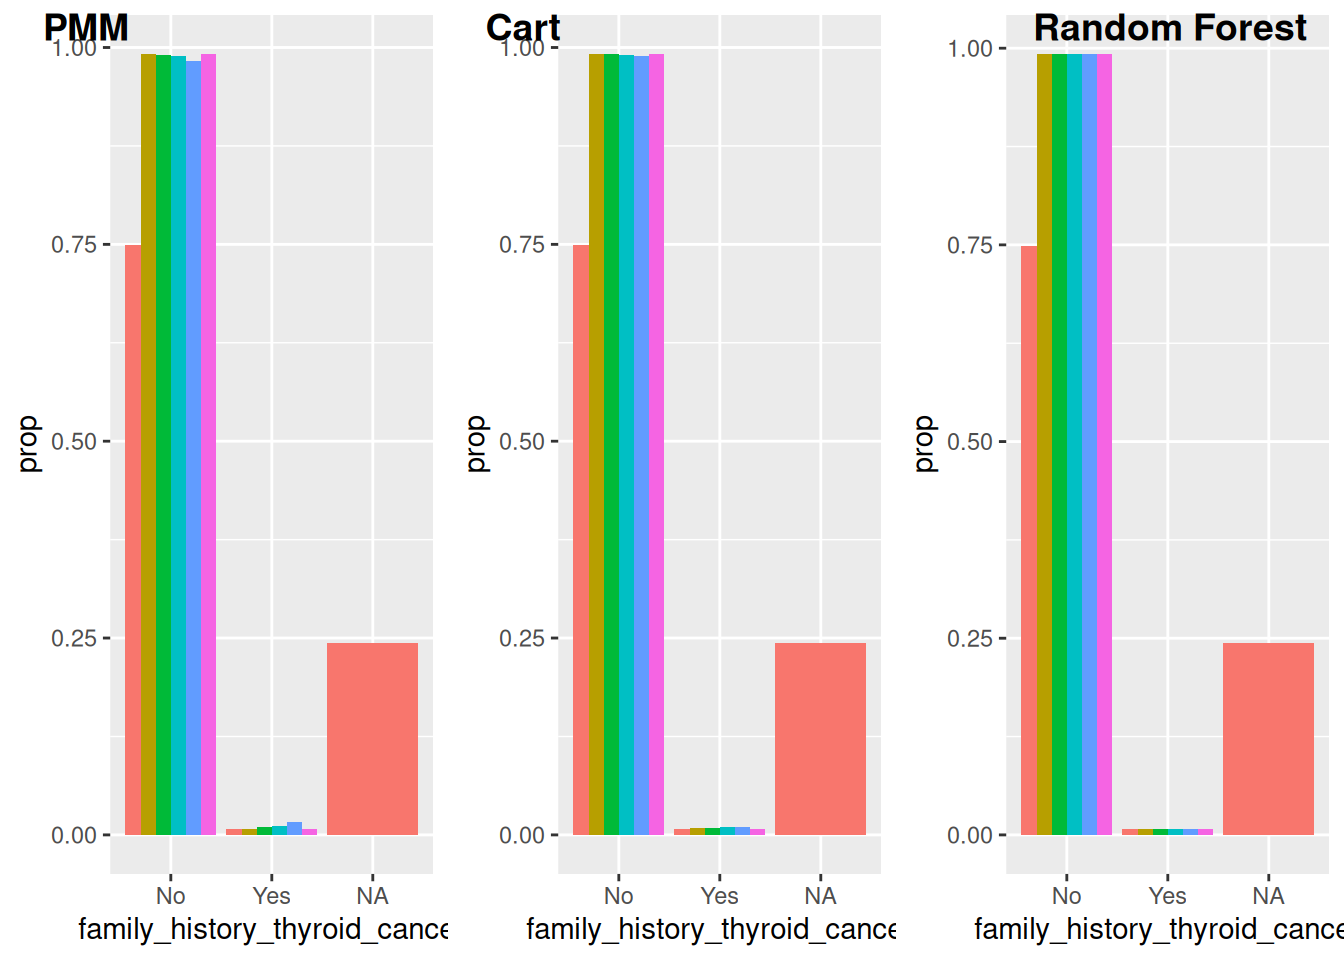

## Exposure Radiation

``` r
cowplot::plot_grid(## mice_pmm$scatter$exposure_radiation + theme(legend.position = "None"),
                   ## mice_cart$scatter$exposure_radiation + theme(legend.position = "None"),
                   ## mice_rf$scatter$exposure_radiation + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$exposure_radiation + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$exposure_radiation + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$exposure_radiation + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$exposure_radiation + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$exposure_radiation + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$exposure_radiation + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

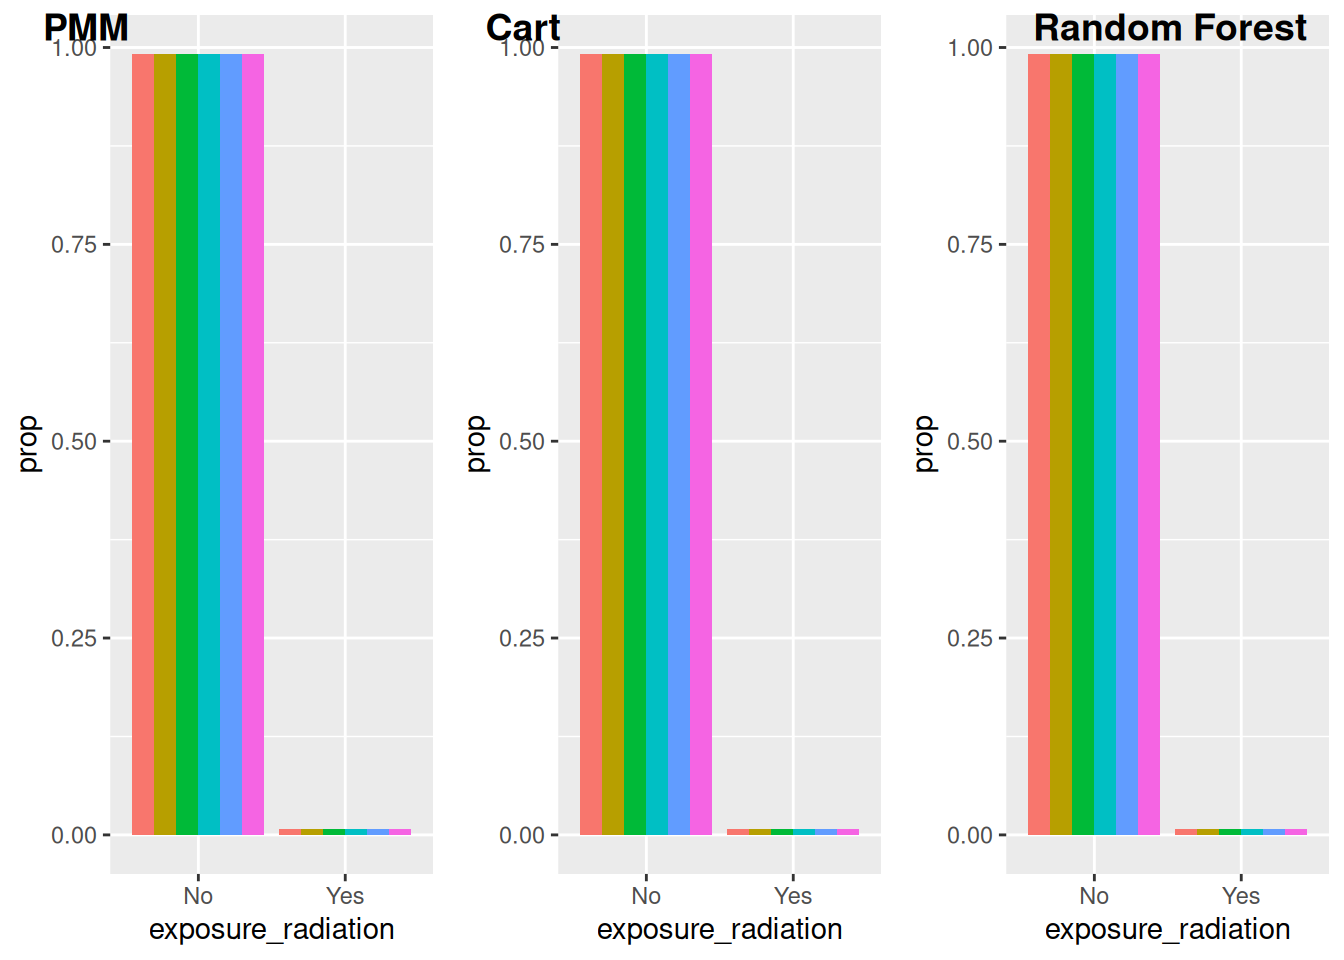

## Solitary Nodule

``` r
cowplot::plot_grid(## mice_pmm$scatter$solitary_nodule + theme(legend.position = "None"),
                   ## mice_cart$scatter$solitary_nodule + theme(legend.position = "None"),
                   ## mice_rf$scatter$solitary_nodule + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$solitary_nodule + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$solitary_nodule + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$solitary_nodule + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$solitary_nodule + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$solitary_nodule + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$solitary_nodule + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

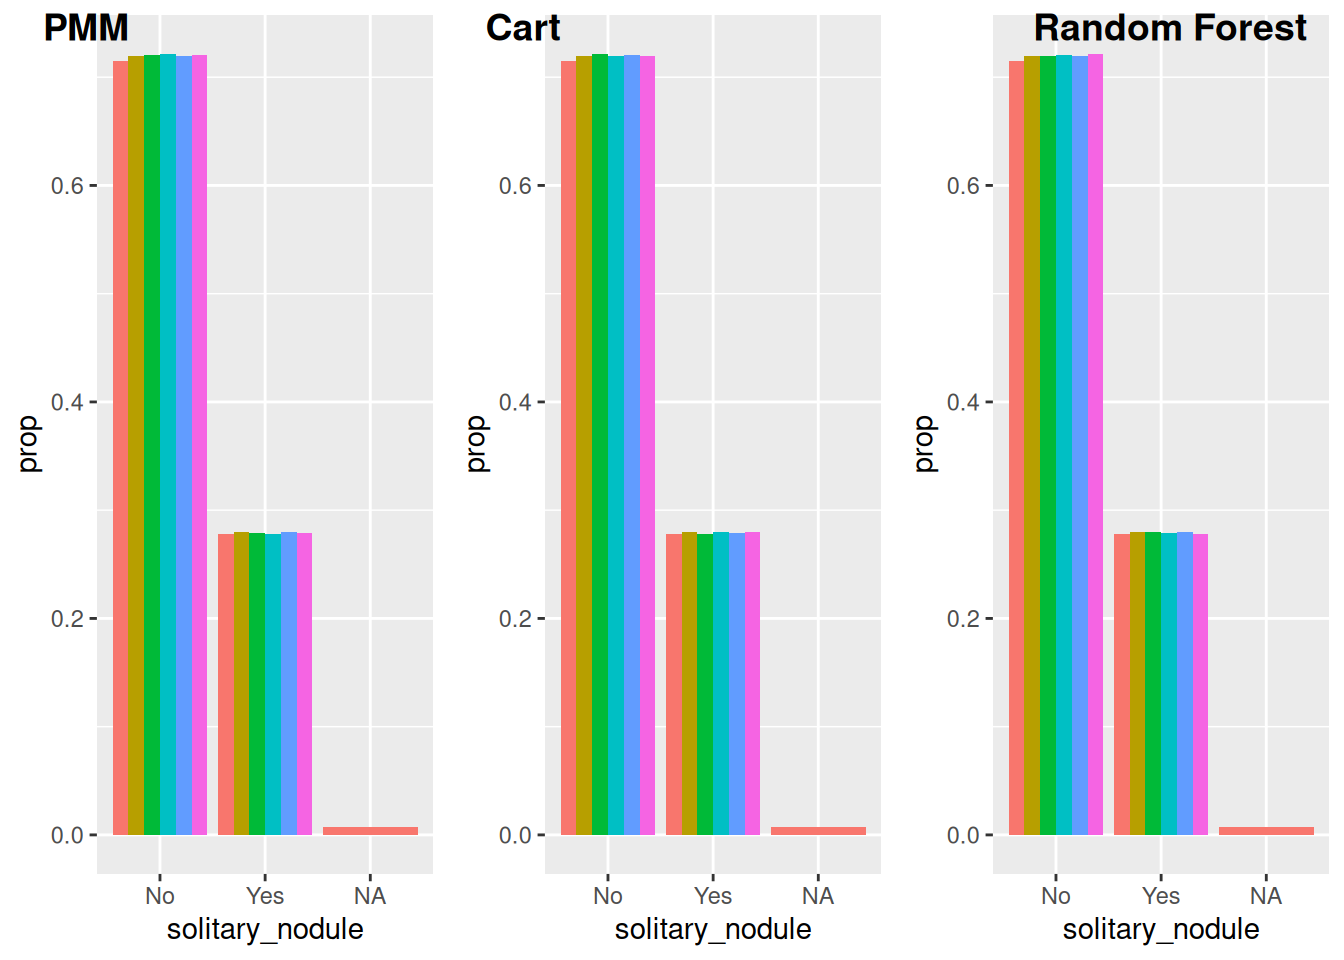

## BTA U-Classification

``` r
cowplot::plot_grid(## mice_pmm$scatter$bta_u_classification + theme(legend.position = "None"),
                   ## mice_cart$scatter$bta_u_classification + theme(legend.position = "None"),
                   ## mice_rf$scatter$bta_u_classification + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$bta_u_classification + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$bta_u_classification + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$bta_u_classification + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$bta_u_classification + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$bta_u_classification + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$bta_u_classification + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

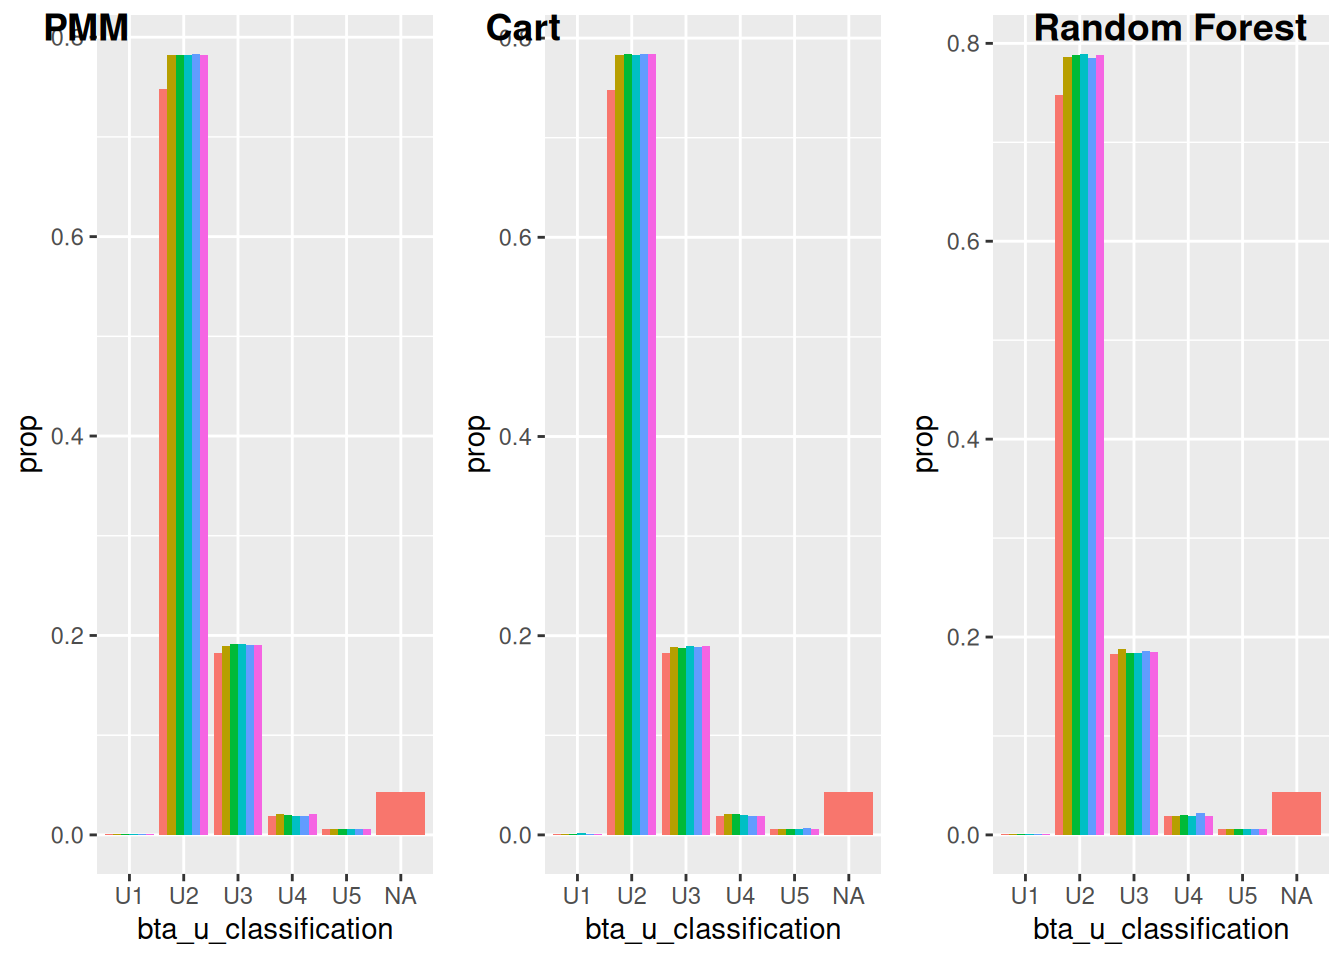

## Cervical Lymphadenopathy

``` r
cowplot::plot_grid(## mice_pmm$scatter$cervical_lymphadenopathy + theme(legend.position = "None"),
                   ## mice_cart$scatter$cervical_lymphadenopathy + theme(legend.position = "None"),
                   ## mice_rf$scatter$cervical_lymphadenopathy + theme(legend.position = "None"),
                   ## mice_pmm$bar_chart$cervical_lymphadenopathy + theme(legend.position = "None"),
                   ## mice_cart$bar_chart$cervical_lymphadenopathy + theme(legend.position = "None"),
                   ## mice_rf$bar_chart$cervical_lymphadenopathy + theme(legend.position = "None"),
                   mice_pmm$bar_chart_prop$cervical_lymphadenopathy + theme(legend.position = "None"),
                   mice_cart$bar_chart_prop$cervical_lymphadenopathy + theme(legend.position = "None"),
                   mice_rf$bar_chart_prop$cervical_lymphadenopathy + theme(legend.position = "None"),
                   labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 1,
                   ncol = 3)
```

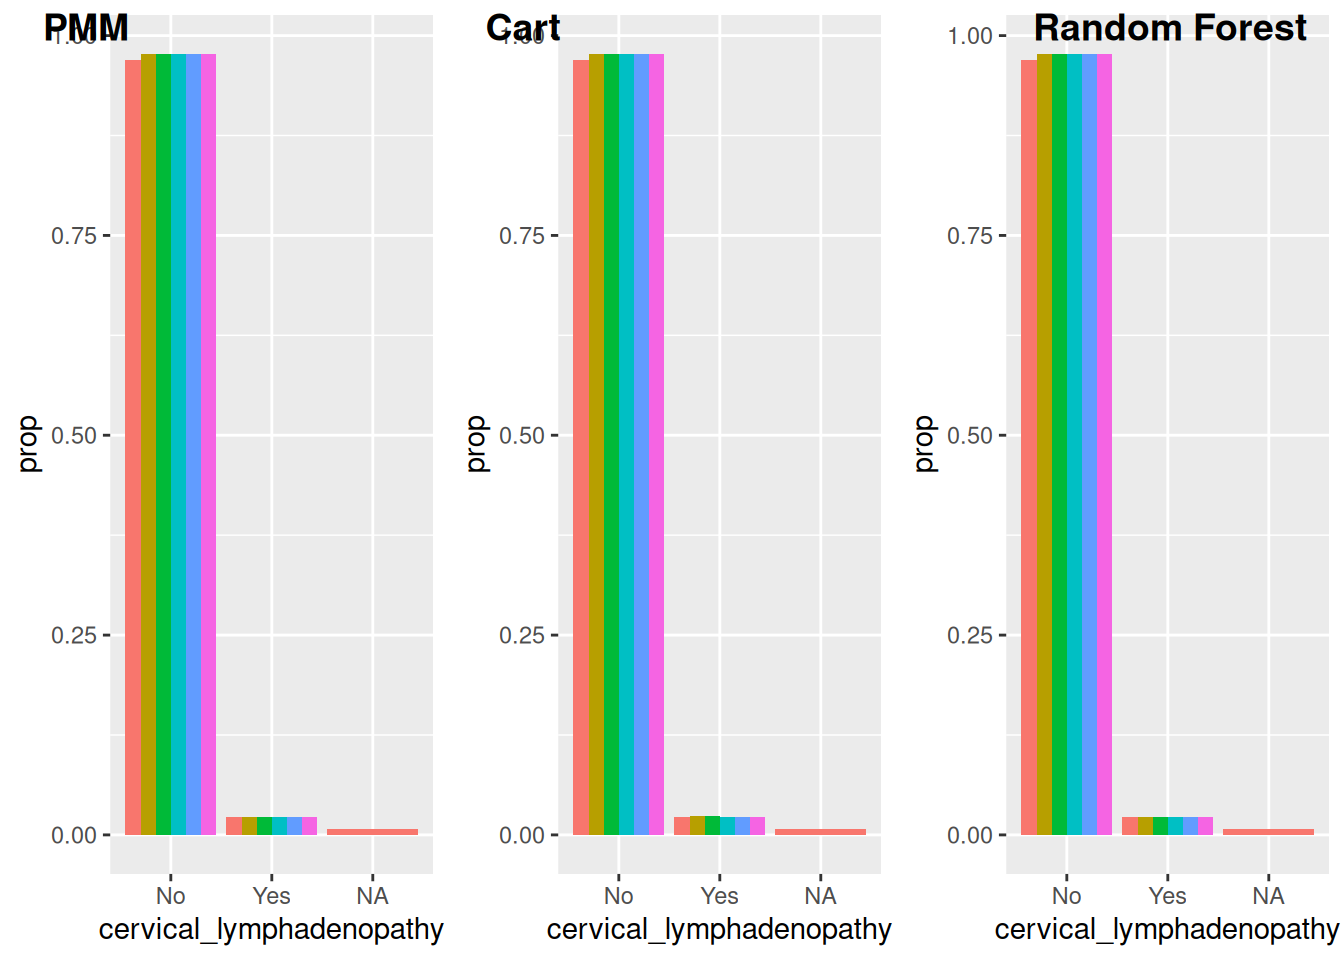

## PMM

``` r
mice_pmm$imputed |> gtsummary::tbl_summary(by=".imp")
```

## CART

``` r
mice_cart$imputed |> gtsummary::tbl_summary(by=".imp")
```

## RF

``` r
mice_rf$imputed |> gtsummary::tbl_summary(by = ".imp")
```

### Modelling

**TODO** - And in light of having removed @tbl-data-completness in favour of the imputed datesets this too has been removed? (`@ns-rse` 2024-07-11). **TODO** - This table feels like duplication of @tbl-data-completeness, perhaps have just one? (`@ns-rse` 2024-07-11).

The predictor variables selected to predict `final_pathology` are shown in @tbl-predictors

``` r
df_predictors_evaluated <- df_complete |>
  dplyr::ungroup() |>
  gtsummary::tbl_summary(
    type = all_continuous() ~ "continuous2",
    statistic = all_continuous() ~ c(
      "{N_nonmiss}",
      "{mean} ({sd})",
      "{median} ({p25}, {p75})",
      "{min}, {max}"
    ),
    percent="column",      # Include percentages for categorical variables by "column", "row" or "cell"
    missing="always"           # Exclude missing, options are "no", "ifany" and "always"
  ) |>
  gtsummary::modify_caption("Variables evaluated in the model")
df_predictors_evaluated
```

Section that sets up the modelling

In [ ]:
## Prefer tidymodel commands (although in most places we use the convention <pkg>::<function>())
library(tidyverse)
library(tidymodels)
tidymodels::tidymodels_prefer()
set.seed(5039378)

## Use df_complete rather than df as this subset have data for all the variables of interest.
## split <- rsample::initial_split(df_complete, prop = 0.75)
## @ns-rse (2024-07-18) - Use an imputed dataset instead
df_split <- df_complete |>
    rsample::initial_split(prop = 0.75)
train <- rsample::training(df_split)
test <- rsample::testing(df_split)

In [ ]:
cv_folds <- rsample::vfold_cv(train, v = 10, repeats = 10)

In [ ]:
cv_loo <- rsample::loo_cv(train)

In [ ]:
## NB This is the key section where the variables that are to be used in the model are defined. A dependent variable
## (the outcome of interest) is in this case the `final_pathology`, whether individuals have malignant or benign tumors,
## this appears on the left-hand side of the equation (before the tilde `~`). On the right of the equation are the
## predictor or dependant variables
##
## @ns-rse 2024-06-14 :
## Because we have used dplyr::select() to choose _just_ the columns of interest we can use the '.'
## notation to refer to "all other variables" as being predictors. This is useful as it saves duplication of writing
## everything out which leaves scope for some being missed.
thyroid_recipe <- recipes::recipe(final_pathology ~ ., data = train) |>
  ## @ns-rse 2024-06-14 :
  ## This step can be used to filter observations with missing data, see the manual pages for more details
  ## https://recipes.tidymodels.org/reference/step_filter_missing.html
  recipes::step_filter_missing(recipes::all_predictors(), threshold = 0) |>
  ## @ns-rse 2024-06-14 :
  ## We first normalise the data _before_ we generate dummies otherwise the dummies, which are numerical, get normalised
  ## too
  recipes::step_normalize(recipes::all_numeric_predictors()) |>
  recipes::step_dummy(recipes::all_nominal_predictors())

In [ ]:
thyroid_workflow <- workflows::workflow() |>
  workflows::add_recipe(thyroid_recipe)
saveRDS(thyroid_workflow, file = paste(r_dir, "thyroid_workflow.rds", sep = "/"))

The following section is output from a Tidymodel approach to logistic regression to try and work out why variables are not being included.

In [ ]:
## define binary logistic regression model
logistic_model <- logistic_reg() |>
  set_engine("glm")
## add the binary logistic regression model to the thyroid workflow
log_thyroid_workflow <- thyroid_workflow |>
  add_model(logistic_model)
## fit the the workflow to the training data
log_thyroid_fit <- fit(log_thyroid_workflow, data = train)
log_thyroid_fit
## to inspect the fit object
str(log_thyroid_fit)
## use fitted model to make prediction
logistic_model_predictions <- predict(log_thyroid_fit, test) |> bind_cols(test)
## examine the processing steps
log_thyroid_fit |> extract_recipe()
## examine the model
log_thyroid_fit |> extract_fit_parsnip()
## to check if the workflow has been trained
log_thyroid_fit$trained
## I can only see age and gender, unsure why the other variable not present.? excluded due to lack of data ?because they are simply not important ? issue with workflow set up

A total of 1150 patients had complete data for the selected predictor variables (see @tbl-predictors). Because of the volume of missing data which if a saturated model were used would include only ~350 people with complete data across all co-variates imputed datasets were analysed instead.

In [ ]:
source("r/functions.R")

In [ ]:
## NB - Both LASSO and Elastic Net models are of model_type = "elastic", the difference is the value for the argument
##      "mixture"  which for LASSO is 1.0 (for Elastic Net it is 0.5)
cart_imputed <- mice_cart$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_cart_model_lasso <- cart_imputed |>
    split(cart_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "elastic",
        mixture = 1.0,
        imputed = TRUE
    ))
tidy_cart_lasso <- tidy_imputed_models(imputed_cart_model_lasso, model_type="elastic")
save(imputed_cart_model_lasso,
     tidy_cart_lasso,
     file = paste(r_dir, "imputed_cart_model_lasso.rds", sep = "/"))

In [ ]:
## NB - Both LASSO and Elastic Net models are of model_type = "elastic", the difference is the value for the argument
##      "mixture"  which for LASSO is 1.0 (for Elastic Net it is 0.5)
rf_imputed <- mice_rf$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_rf_model_lasso <- rf_imputed |>
    split(rf_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "elastic",
        mixture = 1.0,
        imputed = TRUE
    ))
tidy_rf_lasso <- tidy_imputed_models(imputed_rf_model_lasso, model_type="elastic")
save(imputed_rf_model_lasso,
     tidy_rf_lasso,
     file = paste(r_dir, "imputed_rf_model_lasso.rds", sep = "/"))

In [ ]:
## NB - Both LASSO and Elastic Net models are of model_type = "elastic", the difference is the value for the argument
##      "mixture"  which for LASSO is 1.0 (for Elastic Net it is 0.5)
pmm_imputed <- mice_pmm$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_pmm_model_lasso <- pmm_imputed |>
    split(pmm_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "elastic",
        mixture = 1.0,
        imputed = TRUE
    ))
tidy_pmm_lasso <- tidy_imputed_models(imputed_pmm_model_lasso, model_type="elastic")
save(imputed_pmm_model_lasso,
     tidy_pmm_lasso,
     file = paste(r_dir, "imputed_pmm_model_lasso.rds", sep = "/"))

In [ ]:
## NB - Both LASSO and Elastic Net models are of model_type = "elastic", the difference is the value for the argument
##      "mixture"  which for Elastic Net is 0.5 (for LASSO it is 1.0)
cart_imputed <- mice_cart$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_cart_model_elastic <- cart_imputed |>
    split(cart_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "elastic",
        mixture = 0.5,
        imputed = TRUE
    ))
tidy_cart_elastic <- tidy_imputed_models(imputed_cart_model_elastic, model_type="elastic")
save(imputed_cart_model_elastic,
     tidy_cart_elastic,
     file = paste(r_dir, "imputed_cart_model_elastic.rds", sep = "/"))

In [ ]:
## NB - Both LASSO and Elastic Net models are of model_type = "elastic", the difference is the value for the argument
##      "mixture"  which for Elastic Net is 0.5 (for LASSO it is 1.0)
rf_imputed <- mice_rf$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_rf_model_elastic <- rf_imputed |>
    split(rf_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "elastic",
        mixture = 0.5,
        imputed = TRUE
    ))
tidy_rf_elastic <- tidy_imputed_models(imputed_rf_model_elastic, model_type="elastic")
save(imputed_rf_model_elastic,
     tidy_rf_elastic,
     file = paste(r_dir, "imputed_rf_model_elastic.rds", sep = "/"))

In [ ]:
## NB - Both LASSO and Elastic Net models are of model_type = "elastic", the difference is the value for the argument
##      "mixture"  which for Elastic Net is 0.5 (for LASSO it is 1.0)
pmm_imputed <- mice_pmm$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_pmm_model_elastic <- pmm_imputed |>
    split(pmm_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "elastic",
        mixture = 0.5,
        imputed = TRUE
    ))
tidy_pmm_elastic <- tidy_imputed_models(imputed_pmm_model_elastic, model_type="elastic")
save(imputed_pmm_model_elastic,
     tidy_pmm_elastic,
     file = paste(r_dir, "imputed_pmm_model_elastic.rds", sep = "/"))

In [ ]:
cart_imputed <- mice_cart$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_cart_model_forest <- cart_imputed |>
    split(cart_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "forest",
        mixture = 0.5,
        imputed = TRUE
    ))
tidy_cart_forest <- tidy_imputed_models(imputed_cart_model_forest, model_type="forest")
save(imputed_cart_model_forest,
     tidy_cart_forest,
     file = paste(r_dir, "imputed_cart_model_forest.rds", sep = "/"))

In [ ]:
rf_imputed <- mice_rf$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_rf_model_forest <- rf_imputed |>
    split(rf_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "forest",
        mixture = 0.5,
        imputed = TRUE
    ))
tidy_rf_forest <- tidy_imputed_models(imputed_rf_model_forest, model_type="forest")
save(imputed_rf_model_forest,
     tidy_rf_forest,
     file = paste(r_dir, "imputed_rf_model_forest.rds", sep = "/"))

In [ ]:
pmm_imputed <- mice_pmm$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_pmm_model_forest <- pmm_imputed |>
    split(pmm_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "forest",
        mixture = 0.5,
        imputed = TRUE
    ))
tidy_pmm_forest <- tidy_imputed_models(imputed_pmm_model_forest, model_type="forest")
save(imputed_pmm_model_forest,
     tidy_pmm_forest,
     file = paste(r_dir, "imputed_pmm_model_forest.rds", sep = "/"))

In [ ]:
cart_imputed <- mice_cart$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_cart_model_xgboost <- cart_imputed |>
    split(cart_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "xgboost",
        mixture = 0.5,
        imputed = TRUE
    ))
tidy_cart_xgboost <- tidy_imputed_models(imputed_cart_model_xgboost, model_type="xgboost")
save(imputed_cart_model_xgboost,
     tidy_cart_xgboost,
     file = paste(r_dir, "imputed_cart_model_xgboost.rds", sep = "/"))

In [ ]:
rf_imputed <- mice_rf$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_rf_model_xgboost <- rf_imputed |>
    split(rf_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "xgboost",
        mixture = 0.5,
        imputed = TRUE
    ))
tidy_rf_xgboost <- tidy_imputed_models(imputed_rf_model_xgboost, model_type="xgboost")
save(imputed_rf_model_xgboost,
     tidy_rf_xgboost,
     file = paste(r_dir, "imputed_rf_model_xgboost.rds", sep = "/"))

In [ ]:
pmm_imputed <- mice_pmm$imputed |>
    dplyr::filter(.imp != "Original") |>
    dplyr::mutate(.imp = droplevels(.imp))
imputed_pmm_model_xgboost <- pmm_imputed |>
    split(pmm_imputed$.imp) |>
    purrr::map(\(df) model_fitting(df,
    ## furrr::future_map(\(df) model_fitting(df,
        model_type = "xgboost",
        mixture = 0.5,
        imputed = TRUE
    ))
tidy_pmm_xgboost <- tidy_imputed_models(imputed_pmm_model_xgboost, model_type="xgboost")
save(imputed_pmm_model_xgboost,
     tidy_pmm_xgboost,
     file = paste(r_dir, "imputed_pmm_model_xgboost.rds", sep = "/"))

#### Logistic Regression

#### LASSO

In [ ]:
load(file = paste(r_dir, "imputed_cart_model_lasso.rds", sep = "/"))
load(file = paste(r_dir, "imputed_pmm_model_lasso.rds", sep = "/"))
load(file = paste(r_dir, "imputed_rf_model_lasso.rds", sep = "/"))

## PMM

``` r
cowplot::plot_grid(imputed_pmm_model_lasso[[1]]$importance_plot,
                   imputed_pmm_model_lasso[[1]]$train_roc_curve_plot,
                   imputed_pmm_model_lasso[[1]]$test_roc_curve_plot,
                   imputed_pmm_model_lasso[[2]]$importance_plot,
                   imputed_pmm_model_lasso[[2]]$train_roc_curve_plot,
                   imputed_pmm_model_lasso[[2]]$test_roc_curve_plot,
                   imputed_pmm_model_lasso[[3]]$importance_plot,
                   imputed_pmm_model_lasso[[3]]$train_roc_curve_plot,
                   imputed_pmm_model_lasso[[3]]$test_roc_curve_plot,
                   imputed_pmm_model_lasso[[4]]$importance_plot,
                   imputed_pmm_model_lasso[[4]]$train_roc_curve_plot,
                   imputed_pmm_model_lasso[[4]]$test_roc_curve_plot,
                   imputed_pmm_model_lasso[[5]]$importance_plot,
                   imputed_pmm_model_lasso[[5]]$train_roc_curve_plot,
                   imputed_pmm_model_lasso[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

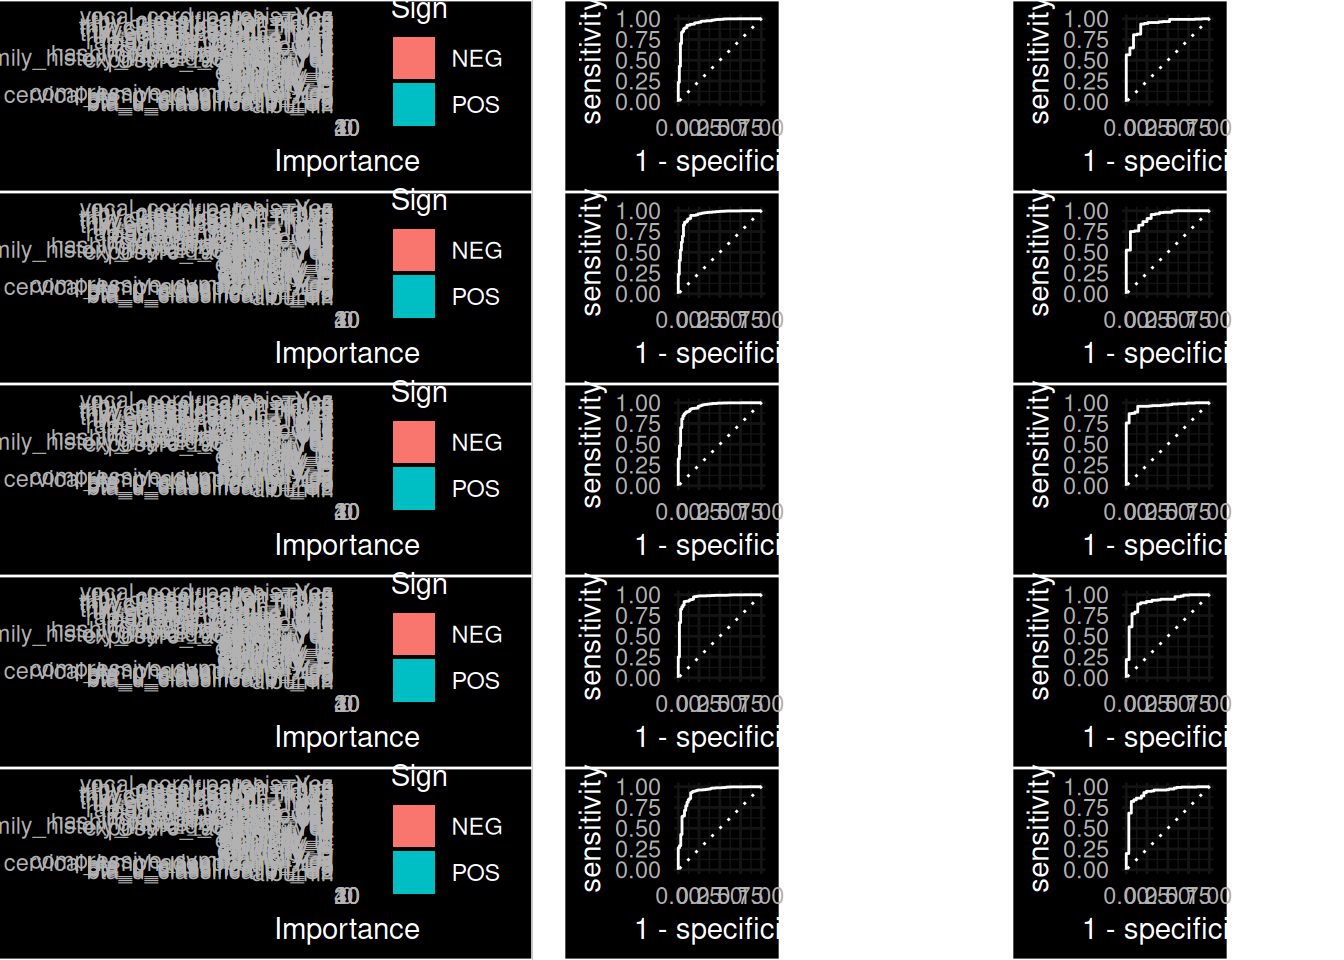

``` r
tidy_pmm_lasso$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five PMM imputed datasets.")
```

  Variable                            Sign      1    2    3    4    5
  ----------------------------------- ------ ---- ---- ---- ---- ----
  albumin                             POS      44   44   44   43   44
  bta_u_classification_U2             NEG      10   NA   NA   40   NA
  bta_u_classification_U2             POS      NA   33   24   NA    8
  bta_u_classification_U3             NEG      40   NA   NA   18   NA
  bta_u_classification_U3             POS      NA   18   40   NA   39
  bta_u_classification_U4             POS       7    5   11    8    4
  bta_u_classification_U5             POS      35   34   36   28   32
  cervical_lymphadenopathy_Yes        POS      43   43   39   38   42
  compressive_symptoms_Yes            NEG       9   NA   22   NA   NA
  compressive_symptoms_Yes            POS      NA   15   NA    6   12
  ethnicity_B                         NEG       2   13   21   17   19
  ethnicity_C                         NEG      NA   NA   NA   24   NA
  ethnicity_C                         POS      26   36   34   NA   25
  ethnicity_D                         NEG      25   25   25   23   17
  ethnicity_F                         NEG      31   29   27   31   30
  ethnicity_G                         POS       4    3    3   13    7
  ethnicity_H                         NEG      28   42   33   42   36
  ethnicity_J                         NEG      NA   28   NA   NA   31
  ethnicity_J                         POS      27   NA   28   32   NA
  ethnicity_K                         NEG       1   NA   23    1   21
  ethnicity_K                         POS      NA   24   NA   NA   NA
  ethnicity_L                         NEG      23   23   NA   14   18
  ethnicity_L                         POS      NA   NA   20   NA   NA
  ethnicity_M                         NEG      NA   39   42   36   43
  ethnicity_M                         POS      37   NA   NA   NA   NA
  ethnicity_N                         NEG      NA   NA   NA   NA   28
  ethnicity_N                         POS      29   22    9   21   NA
  ethnicity_P                         NEG       8   38    6   44    1
  ethnicity_R                         NEG      30   NA   26   NA   NA
  ethnicity_R                         POS      NA   27   NA   29   27
  ethnicity_S                         POS      42   26   43   39   41
  ethnicity_Z                         NEG      NA   14   NA   NA   NA
  ethnicity_Z                         POS       5   NA    2   12   13
  exposure_radiation_Yes              NEG      24    2    8   11   16
  family_history_thyroid_cancer_Yes   POS      11   21   18   22   35
  graves_disease_Yes                  POS      12   20   35   26   23
  hashimotos_thyroiditis_Yes          NEG      NA   37   NA   35   NA
  hashimotos_thyroiditis_Yes          POS      38   NA   37   NA   34
  hypertension_Yes                    NEG      16   NA   NA   25   NA
  hypertension_Yes                    POS      NA    8   12   NA   20
  incidental_nodule_Yes               POS      19    7   10    3   11
  lymphocytes                         NEG      33   NA   32   NA   NA
  lymphocytes                         POS      NA   32   NA   33   33
  monocyte                            NEG      34   30   30   34   29
  palpable_nodule_Yes                 NEG      17   NA   NA   NA   NA
  palpable_nodule_Yes                 POS      NA   17   13   10   26
  rapid_enlargement_Yes               NEG      14    4   NA   NA   15
  rapid_enlargement_Yes               POS      NA   NA    1    7   NA
  size_nodule_mm                      POS      39   41   38   41   38
  solitary_nodule_Yes                 NEG      NA    9   NA   NA   NA
  solitary_nodule_Yes                 POS      18   NA   16   19   24
  thy_classification_Thy1             POS      36   31   29   30   37
  thy_classification_Thy1c            NEG      NA   10   17   NA   NA
  thy_classification_Thy1c            POS      20   NA   NA   20    2
  thy_classification_Thy2             NEG      32   NA   NA   27   NA
  thy_classification_Thy2             POS      NA   35   31   NA   22
  thy_classification_Thy2c            NEG      21   16   19   16   10
  thy_classification_Thy3a            POS      15   11   14    5   14
  thy_classification_Thy3f            POS       3    1    5    2    3
  thy_classification_Thy4             POS       6    6    4    4    6
  thy_classification_Thy5             POS      13   12    7    9    9
  tsh_value                           NEG      41   NA   41   NA   40
  tsh_value                           POS      NA   40   NA   37   NA
  vocal_cord_paresis_Yes              NEG      22   19   15   15    5

  : Importance of features from LASSO model of five PMM imputed
  datasets.

``` r
tidy_pmm_lasso$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five PMM imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.949   0.947   0.955   0.962   0.951
  bal_accuracy           binary         0.755   0.769   0.757   0.825   0.707
  detection_prevalence   binary         0.946   0.937   0.951   0.935   0.964
  f_meas                 binary         0.973   0.971   0.976   0.979   0.974
  j_index                binary         0.511   0.537   0.515   0.651   0.414
  kap                    binary         0.619   0.629   0.632   0.720   0.549
  mcc                    binary         0.641   0.643   0.657   0.726   0.596
  npv                    binary         0.851   0.815   0.881   0.839   0.903
  ppv                    binary         0.955   0.955   0.959   0.970   0.953
  precision              binary         0.955   0.955   0.959   0.970   0.953
  recall                 binary         0.991   0.987   0.994   0.989   0.996
  roc_auc                binary         0.955   0.947   0.954   0.966   0.931
  sens                   binary         0.991   0.987   0.994   0.989   0.996
  spec                   binary         0.519   0.550   0.521   0.662   0.418

  : Classification metrics from LASSO model of five PMM imputed datasets
  (Training Data).

``` r
tidy_pmm_lasso$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five PMM imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.941   0.944   0.924   0.917   0.920
  kap                    binary         0.459   0.501   0.441   0.414   0.475
  sens                   binary         0.993   0.981   0.988   0.981   0.992
  spec                   binary         0.348   0.450   0.345   0.345   0.364
  ppv                    binary         0.946   0.960   0.931   0.930   0.923
  npv                    binary         0.800   0.643   0.769   0.667   0.857
  mcc                    binary         0.504   0.510   0.483   0.441   0.527
  j_index                binary         0.340   0.431   0.333   0.326   0.356
  bal_accuracy           binary         0.670   0.716   0.667   0.663   0.678
  detection_prevalence   binary         0.965   0.951   0.955   0.948   0.951
  precision              binary         0.946   0.960   0.931   0.930   0.923
  recall                 binary         0.993   0.981   0.988   0.981   0.992
  f_meas                 binary         0.969   0.971   0.959   0.955   0.957
  roc_auc                binary         0.931   0.924   0.962   0.910   0.927

  : Classification metrics from LASSO model of five PMM imputed datasets
  (Testing Data).

## CART

``` r
cowplot::plot_grid(imputed_cart_model_lasso[[1]]$importance_plot,
                   imputed_cart_model_lasso[[1]]$train_roc_curve_plot,
                   imputed_cart_model_lasso[[1]]$test_roc_curve_plot,
                   imputed_cart_model_lasso[[2]]$importance_plot,
                   imputed_cart_model_lasso[[2]]$train_roc_curve_plot,
                   imputed_cart_model_lasso[[2]]$test_roc_curve_plot,
                   imputed_cart_model_lasso[[3]]$importance_plot,
                   imputed_cart_model_lasso[[3]]$train_roc_curve_plot,
                   imputed_cart_model_lasso[[3]]$test_roc_curve_plot,
                   imputed_cart_model_lasso[[4]]$importance_plot,
                   imputed_cart_model_lasso[[4]]$train_roc_curve_plot,
                   imputed_cart_model_lasso[[4]]$test_roc_curve_plot,
                   imputed_cart_model_lasso[[5]]$importance_plot,
                   imputed_cart_model_lasso[[5]]$train_roc_curve_plot,
                   imputed_cart_model_lasso[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

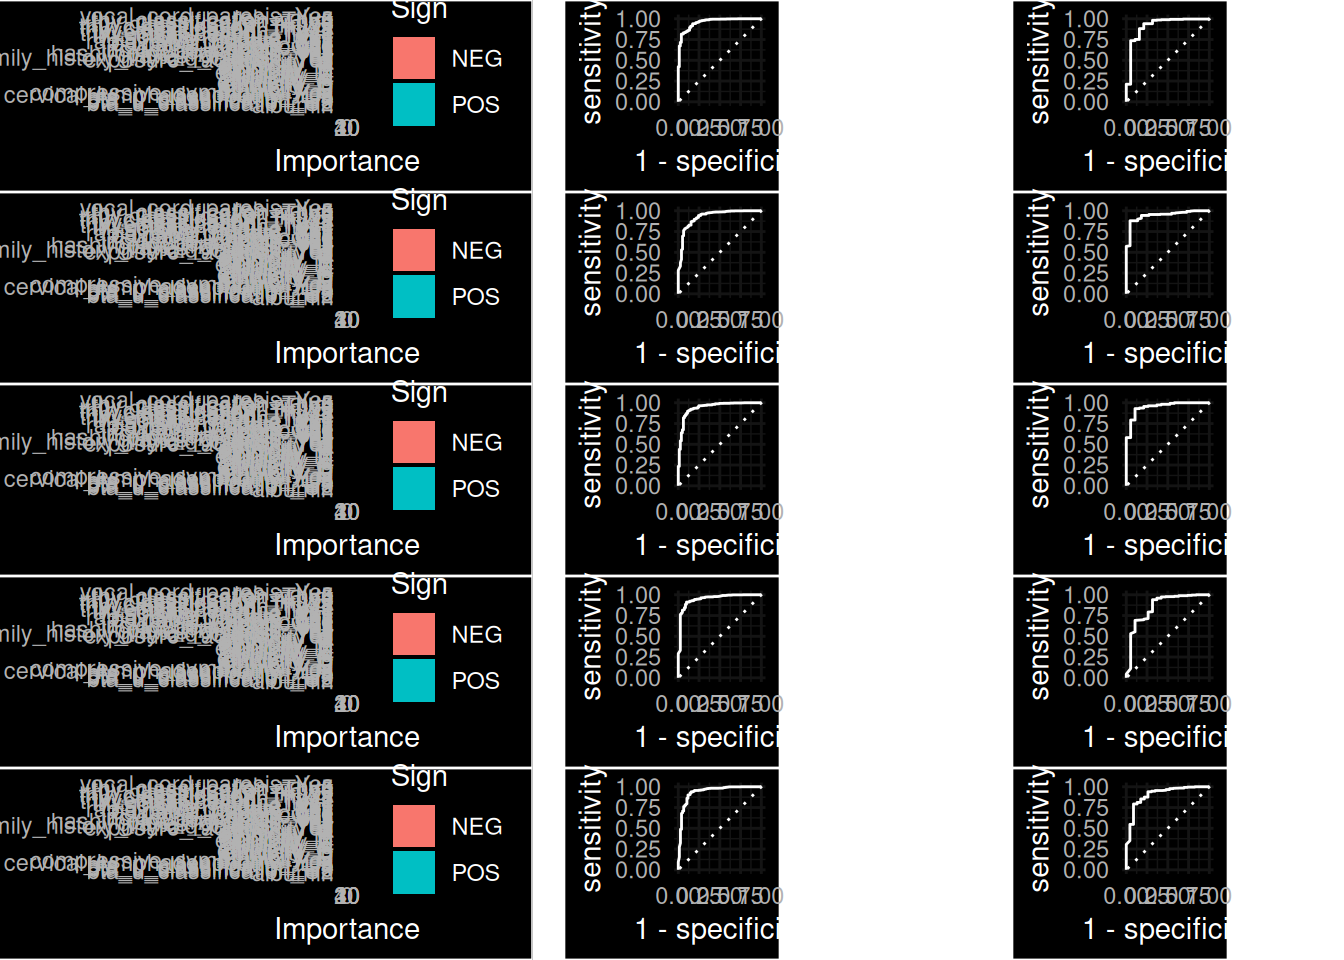

``` r
tidy_cart_lasso$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five CART imputed datasets.")
```

  Variable                            Sign      1    2    3    4    5
  ----------------------------------- ------ ---- ---- ---- ---- ----
  albumin                             POS      43   44   44   43   44
  bta_u_classification_U2             NEG      NA   NA   NA   17   NA
  bta_u_classification_U2             POS      31    9   20   NA   28
  bta_u_classification_U3             NEG      NA   NA   NA   24   NA
  bta_u_classification_U3             POS      19    6   18   NA    4
  bta_u_classification_U4             POS       2   21    5   15    6
  bta_u_classification_U5             POS      34   36   31   35   29
  cervical_lymphadenopathy_Yes        NEG      42   NA   NA   NA   NA
  cervical_lymphadenopathy_Yes        POS      NA   33   29   41   42
  compressive_symptoms_Yes            NEG      NA   NA   NA   14   NA
  compressive_symptoms_Yes            POS      13   19   14   NA    2
  ethnicity_B                         NEG      11    4    4   19   18
  ethnicity_C                         NEG      NA   25   25   NA   24
  ethnicity_C                         POS      24   NA   NA   27   NA
  ethnicity_D                         NEG      18   29   24   29   20
  ethnicity_F                         NEG       5   26   26   31   31
  ethnicity_G                         NEG      NA   14    8   NA   NA
  ethnicity_G                         POS       3   NA   NA    6   13
  ethnicity_H                         NEG      44   35   43   37   43
  ethnicity_J                         NEG      39   30   NA   NA   NA
  ethnicity_J                         POS      NA   NA   40   26   36
  ethnicity_K                         NEG      NA   NA   34    1   NA
  ethnicity_K                         POS      35   22   NA   NA   25
  ethnicity_L                         NEG      28   17   33   10   21
  ethnicity_M                         NEG      40   NA   41   38   35
  ethnicity_M                         POS      NA   42   NA   NA   NA
  ethnicity_N                         NEG      NA   28   23   NA   22
  ethnicity_N                         POS      32   NA   NA   23   NA
  ethnicity_P                         NEG      41    7   13   44   16
  ethnicity_R                         NEG      NA   27   NA   21   NA
  ethnicity_R                         POS      30   NA   22   NA   27
  ethnicity_S                         NEG      NA   NA   NA   39   NA
  ethnicity_S                         POS      33   43   42   NA   41
  ethnicity_Z                         POS       4    5   10   13    1
  exposure_radiation_Yes              NEG      15   24   21    8   40
  family_history_thyroid_cancer_Yes   POS      17   15   37    5   38
  graves_disease_Yes                  NEG      NA   NA   NA   42   NA
  graves_disease_Yes                  POS      23   40   17   NA   19
  hashimotos_thyroiditis_Yes          NEG      37   38   NA   36   34
  hashimotos_thyroiditis_Yes          POS      NA   NA   36   NA   NA
  hypertension_Yes                    NEG       6   NA   19    4   NA
  hypertension_Yes                    POS      NA   23   NA   NA    8
  incidental_nodule_Yes               NEG      NA   NA   NA   NA    5
  incidental_nodule_Yes               POS      10    8    9   12   NA
  lymphocytes                         NEG      NA   31   NA   NA   NA
  lymphocytes                         POS      26   NA   28   33   33
  monocyte                            NEG      27   34   27   34   30
  palpable_nodule_Yes                 NEG      NA   NA   NA   NA   15
  palpable_nodule_Yes                 POS       8   10   16   22   NA
  rapid_enlargement_Yes               NEG      NA   18   NA   NA   NA
  rapid_enlargement_Yes               POS       1   NA    6    9   12
  size_nodule_mm                      POS      36   41   39   32   37
  solitary_nodule_Yes                 NEG      21   NA   NA   NA   NA
  solitary_nodule_Yes                 POS      NA   37   35   30   23
  thy_classification_Thy1             POS      29   32   30   28   32
  thy_classification_Thy1c            POS      22   11    1   20    7
  thy_classification_Thy2             NEG      25   NA   NA   NA   NA
  thy_classification_Thy2             POS      NA    1   32   25   26
  thy_classification_Thy2c            NEG      20   20   11   16   14
  thy_classification_Thy3a            POS      16   16   12   11   10
  thy_classification_Thy3f            POS       7    2    3    2    3
  thy_classification_Thy4             POS       9    3    2   18    9
  thy_classification_Thy5             POS      12   12    7    7   11
  tsh_value                           NEG      NA   39   38   NA   NA
  tsh_value                           POS      38   NA   NA   40   39
  vocal_cord_paresis_Yes              NEG      14   13   15    3   17

  : Importance of features from LASSO model of five CART imputed
  datasets.

``` r
tidy_cart_lasso$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five CART imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.955   0.939   0.946   0.941   0.942
  bal_accuracy           binary         0.809   0.672   0.765   0.724   0.705
  detection_prevalence   binary         0.930   0.966   0.937   0.949   0.957
  f_meas                 binary         0.975   0.967   0.970   0.968   0.969
  j_index                binary         0.618   0.344   0.530   0.448   0.409
  kap                    binary         0.699   0.479   0.624   0.563   0.534
  mcc                    binary         0.709   0.547   0.639   0.594   0.576
  npv                    binary         0.850   0.931   0.815   0.841   0.865
  ppv                    binary         0.963   0.939   0.954   0.946   0.946
  precision              binary         0.963   0.939   0.954   0.946   0.946
  recall                 binary         0.989   0.997   0.987   0.991   0.994
  roc_auc                binary         0.958   0.928   0.944   0.951   0.939
  sens                   binary         0.989   0.997   0.987   0.991   0.994
  spec                   binary         0.630   0.346   0.543   0.457   0.416

  : Classification metrics from LASSO model of five CART imputed
  datasets (Training Data).

``` r
tidy_cart_lasso$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five CART imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.958   0.934   0.951   0.944   0.934
  kap                    binary         0.604   0.320   0.538   0.315   0.395
  sens                   binary         0.989   0.993   0.985   0.996   0.989
  spec                   binary         0.526   0.227   0.474   0.210   0.304
  ppv                    binary         0.967   0.940   0.964   0.947   0.942
  npv                    binary         0.769   0.714   0.692   0.800   0.700
  mcc                    binary         0.616   0.379   0.549   0.393   0.434
  j_index                binary         0.515   0.220   0.459   0.207   0.293
  bal_accuracy           binary         0.758   0.610   0.729   0.603   0.646
  detection_prevalence   binary         0.955   0.976   0.955   0.983   0.965
  precision              binary         0.967   0.940   0.964   0.947   0.942
  recall                 binary         0.989   0.993   0.985   0.996   0.989
  f_meas                 binary         0.978   0.965   0.974   0.971   0.965
  roc_auc                binary         0.914   0.944   0.950   0.858   0.906

  : Classification metrics from LASSO model of five CART imputed
  datasets (Testing Data).

## Random Forest

``` r
cowplot::plot_grid(imputed_rf_model_lasso[[1]]$importance_plot,
                   imputed_rf_model_lasso[[1]]$train_roc_curve_plot,
                   imputed_rf_model_lasso[[1]]$test_roc_curve_plot,
                   imputed_rf_model_lasso[[2]]$importance_plot,
                   imputed_rf_model_lasso[[2]]$train_roc_curve_plot,
                   imputed_rf_model_lasso[[2]]$test_roc_curve_plot,
                   imputed_rf_model_lasso[[3]]$importance_plot,
                   imputed_rf_model_lasso[[3]]$train_roc_curve_plot,
                   imputed_rf_model_lasso[[3]]$test_roc_curve_plot,
                   imputed_rf_model_lasso[[4]]$importance_plot,
                   imputed_rf_model_lasso[[4]]$train_roc_curve_plot,
                   imputed_rf_model_lasso[[4]]$test_roc_curve_plot,
                   imputed_rf_model_lasso[[5]]$importance_plot,
                   imputed_rf_model_lasso[[5]]$train_roc_curve_plot,
                   imputed_rf_model_lasso[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Rf", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

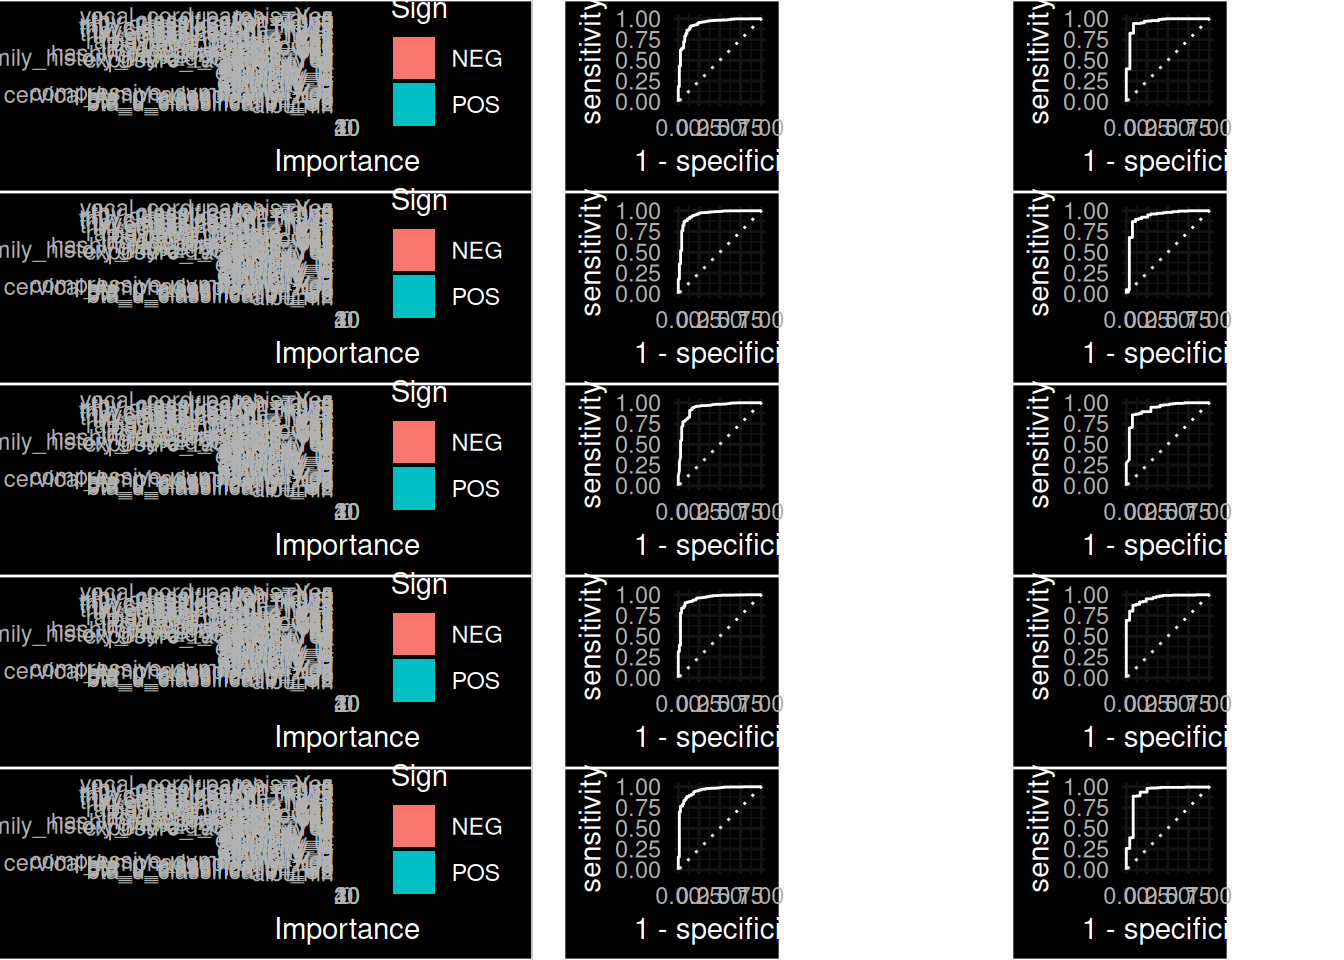

``` r
tidy_rf_lasso$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five RF imputed datasets.")
```

  Variable                            Sign      1    2    3    4    5
  ----------------------------------- ------ ---- ---- ---- ---- ----
  albumin                             POS      44   44   44   43   44
  bta_u_classification_U2             POS      23   40   38   38   34
  bta_u_classification_U3             POS      40   22   35   19   23
  bta_u_classification_U4             POS      13    7   14    2   15
  bta_u_classification_U5             POS      35   36   34   30   33
  cervical_lymphadenopathy_Yes        POS      42   33   32   41   42
  compressive_symptoms_Yes            NEG      NA   NA    5   NA   NA
  compressive_symptoms_Yes            POS      17   15   NA   20    8
  ethnicity_B                         NEG      24   18   18   16   13
  ethnicity_C                         NEG      NA   25   NA   NA   NA
  ethnicity_C                         POS      27   NA   25   25   26
  ethnicity_D                         NEG      31   24   21   23   25
  ethnicity_F                         NEG      26   28   19   22   28
  ethnicity_G                         NEG      NA   NA   NA    4   NA
  ethnicity_G                         POS       7   14    1   NA   10
  ethnicity_H                         NEG      33   34   43   42   43
  ethnicity_J                         NEG      NA   NA   NA   32   NA
  ethnicity_J                         POS      28   31   31   NA   31
  ethnicity_K                         NEG      19   21   20   24   20
  ethnicity_L                         NEG      22   20   22   26   14
  ethnicity_M                         NEG      41   42   42   40   40
  ethnicity_N                         NEG      NA   26   NA   NA   NA
  ethnicity_N                         POS      29   NA   26   10   21
  ethnicity_P                         NEG       9   23   23   44    2
  ethnicity_R                         NEG      NA   NA   27   NA   27
  ethnicity_R                         POS      30   12   NA   29   NA
  ethnicity_S                         NEG      NA   43   NA   28   41
  ethnicity_S                         POS      43   NA   36   NA   NA
  ethnicity_Z                         NEG      NA   NA   NA   NA    1
  ethnicity_Z                         POS       3    6   10    3   NA
  exposure_radiation_Yes              NEG      16   35   37   35   16
  family_history_thyroid_cancer_Yes   POS       5    3   11   15   17
  graves_disease_Yes                  POS      25   16    8   21   39
  hashimotos_thyroiditis_Yes          NEG      38   NA   NA   36   36
  hashimotos_thyroiditis_Yes          POS      NA   37   39   NA   NA
  hypertension_Yes                    NEG      NA   10   17   NA    3
  hypertension_Yes                    POS      12   NA   NA   11   NA
  incidental_nodule_Yes               POS      10    2    3   14    6
  lymphocytes                         NEG      36   NA   NA   31   32
  lymphocytes                         POS      NA   32   33   NA   NA
  monocyte                            NEG      34   29   30   33   35
  palpable_nodule_Yes                 POS      20   19    2    8    5
  rapid_enlargement_Yes               NEG      15   NA    4   NA   NA
  rapid_enlargement_Yes               POS      NA   17   NA    7   11
  size_nodule_mm                      POS      37   41   40   37   37
  solitary_nodule_Yes                 POS      21    1   24   34   24
  thy_classification_Thy1             POS      32   30   29    1   30
  thy_classification_Thy1c            POS       4    8    6   17   22
  thy_classification_Thy2             POS       1   27   28   27   29
  thy_classification_Thy2c            NEG      18   11   16   13   19
  thy_classification_Thy3a            POS      14   13   15    6   18
  thy_classification_Thy3f            POS       6    5   12    5    4
  thy_classification_Thy4             POS       2    4    7   12    9
  thy_classification_Thy5             POS      11    9    9    9    7
  tsh_value                           NEG      NA   38   NA   NA   NA
  tsh_value                           POS      39   NA   41   39   38
  vocal_cord_paresis_Yes              NEG       8   39   13   18   12

  : Importance of features from LASSO model of five RF imputed datasets.

``` r
tidy_rf_lasso$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five RF imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.936   0.954   0.940   0.954   0.946
  bal_accuracy           binary         0.696   0.801   0.656   0.788   0.744
  detection_prevalence   binary         0.954   0.934   0.971   0.939   0.946
  f_meas                 binary         0.966   0.975   0.968   0.975   0.971
  j_index                binary         0.391   0.601   0.312   0.575   0.488
  kap                    binary         0.499   0.668   0.445   0.663   0.590
  mcc                    binary         0.530   0.674   0.518   0.675   0.610
  npv                    binary         0.775   0.789   0.920   0.830   0.808
  ppv                    binary         0.944   0.965   0.940   0.962   0.953
  precision              binary         0.944   0.965   0.940   0.962   0.953
  recall                 binary         0.989   0.985   0.998   0.989   0.989
  roc_auc                binary         0.937   0.949   0.936   0.955   0.952
  sens                   binary         0.989   0.985   0.998   0.989   0.989
  spec                   binary         0.403   0.616   0.315   0.587   0.500

  : Classification metrics from LASSO model of five RF imputed datasets
  (Training Data).

``` r
tidy_rf_lasso$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five RF imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.962   0.927   0.931   0.938   0.955
  kap                    binary         0.684   0.616   0.417   0.606   0.674
  sens                   binary         0.996   0.946   0.996   0.966   0.985
  spec                   binary         0.565   0.741   0.296   0.640   0.625
  ppv                    binary         0.964   0.972   0.932   0.966   0.967
  npv                    binary         0.929   0.588   0.889   0.640   0.789
  mcc                    binary         0.708   0.621   0.490   0.606   0.679
  j_index                binary         0.561   0.687   0.292   0.606   0.610
  bal_accuracy           binary         0.781   0.844   0.646   0.803   0.805
  detection_prevalence   binary         0.951   0.882   0.969   0.913   0.934
  precision              binary         0.964   0.972   0.932   0.966   0.967
  recall                 binary         0.996   0.946   0.996   0.966   0.985
  f_meas                 binary         0.980   0.959   0.963   0.966   0.976
  roc_auc                binary         0.954   0.924   0.925   0.955   0.923

  : Classification metrics from LASSO model of five RF imputed datasets
  (Testing Data).

#### Elastic Net

In [ ]:
load(file = paste(r_dir, "imputed_cart_model_elastic.rds", sep = "/"))
load(file = paste(r_dir, "imputed_pmm_model_elastic.rds", sep = "/"))
load(file = paste(r_dir, "imputed_rf_model_elastic.rds", sep = "/"))

## PMM

``` r
cowplot::plot_grid(imputed_pmm_model_elastic[[1]]$importance_plot,
                   imputed_pmm_model_elastic[[1]]$train_roc_curve_plot,
                   imputed_pmm_model_elastic[[1]]$test_roc_curve_plot,
                   imputed_pmm_model_elastic[[2]]$importance_plot,
                   imputed_pmm_model_elastic[[2]]$train_roc_curve_plot,
                   imputed_pmm_model_elastic[[2]]$test_roc_curve_plot,
                   imputed_pmm_model_elastic[[3]]$importance_plot,
                   imputed_pmm_model_elastic[[3]]$train_roc_curve_plot,
                   imputed_pmm_model_elastic[[3]]$test_roc_curve_plot,
                   imputed_pmm_model_elastic[[4]]$importance_plot,
                   imputed_pmm_model_elastic[[4]]$train_roc_curve_plot,
                   imputed_pmm_model_elastic[[4]]$test_roc_curve_plot,
                   imputed_pmm_model_elastic[[5]]$importance_plot,
                   imputed_pmm_model_elastic[[5]]$train_roc_curve_plot,
                   imputed_pmm_model_elastic[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

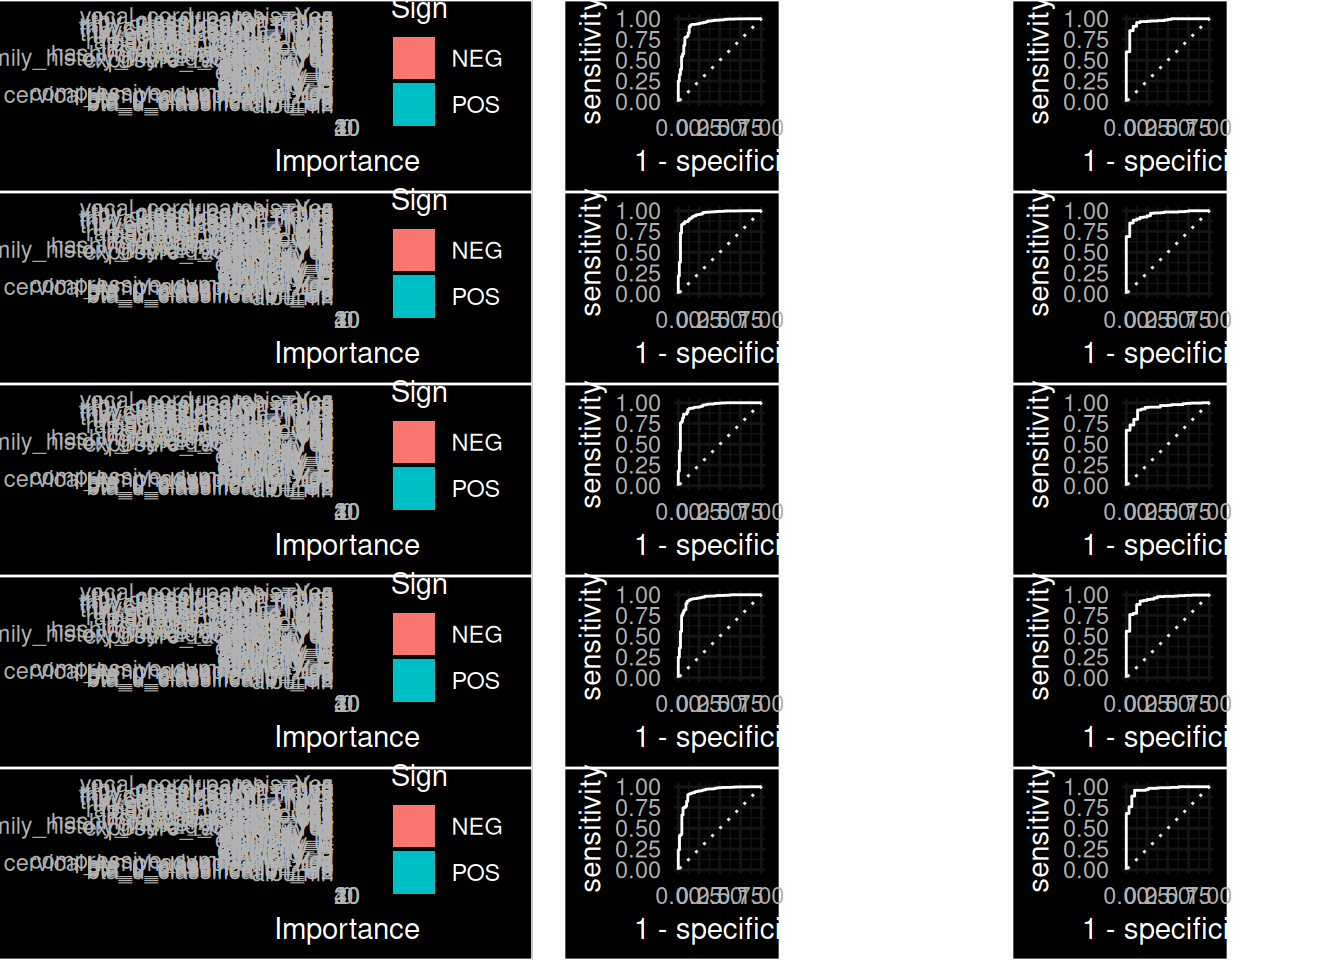

``` r
tidy_pmm_elastic$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five PMM imputed datasets.")
```

  Variable                            Sign      1    2    3    4    5
  ----------------------------------- ------ ---- ---- ---- ---- ----
  albumin                             POS      44   44   43   44   43
  bta_u_classification_U2             NEG      NA   NA   27   41   NA
  bta_u_classification_U2             POS      20   38   NA   NA    3
  bta_u_classification_U3             NEG      NA   NA   24   16   NA
  bta_u_classification_U3             POS      39   27   NA   NA   37
  bta_u_classification_U4             POS       7    9   10    2   16
  bta_u_classification_U5             NEG      NA   32   NA   NA   NA
  bta_u_classification_U5             POS      37   NA   35   35   31
  cervical_lymphadenopathy_Yes        POS      33   42   28   39   42
  compressive_symptoms_Yes            NEG      NA    3   16   17   NA
  compressive_symptoms_Yes            POS       2   NA   NA   NA   14
  ethnicity_B                         NEG      18   15    4    4   15
  ethnicity_C                         NEG      NA   NA   NA   26   NA
  ethnicity_C                         POS      23   26   33   NA   35
  ethnicity_D                         NEG      28   22   29   22   24
  ethnicity_F                         NEG      30   28   36   33   28
  ethnicity_G                         POS       6    1   11    5    5
  ethnicity_H                         NEG      35   43   25   43   40
  ethnicity_J                         NEG      NA   29   NA   NA   NA
  ethnicity_J                         POS      29   NA   31   28   23
  ethnicity_K                         NEG      25   NA    1    1   19
  ethnicity_K                         POS      NA   24   NA   NA   NA
  ethnicity_L                         NEG      22   25   NA   18   NA
  ethnicity_L                         POS      NA   NA   19   NA   18
  ethnicity_M                         NEG      NA   41   37   38   36
  ethnicity_M                         POS      41   NA   NA   NA   NA
  ethnicity_N                         POS      26    7   23   23   25
  ethnicity_P                         NEG      11   21   26   27   44
  ethnicity_R                         NEG      27   NA   NA   NA   26
  ethnicity_R                         POS      NA   30   30   30   NA
  ethnicity_S                         NEG      43   NA   41   NA   NA
  ethnicity_S                         POS      NA   40   NA   36   41
  ethnicity_Z                         POS       4   12    9   12    4
  exposure_radiation_Yes              NEG      24   10   13    7   17
  family_history_thyroid_cancer_Yes   POS       8   20   12   24   12
  graves_disease_Yes                  POS      17   19   22   25   27
  hashimotos_thyroiditis_Yes          NEG      NA   NA   NA   37   33
  hashimotos_thyroiditis_Yes          POS      38   36   39   NA   NA
  hypertension_Yes                    NEG       5   NA   NA   20   22
  hypertension_Yes                    POS      NA    2   15   NA   NA
  incidental_nodule_Yes               POS      10    8   17    9    8
  lymphocytes                         NEG      NA   33   40   NA   30
  lymphocytes                         POS      31   NA   NA   32   NA
  monocyte                            NEG      32   35   34   31   29
  palpable_nodule_Yes                 NEG      21    6   NA   NA   NA
  palpable_nodule_Yes                 POS      NA   NA   14   21    6
  rapid_enlargement_Yes               NEG      14   NA   NA   NA    7
  rapid_enlargement_Yes               POS      NA    4    2   15   NA
  size_nodule_mm                      POS      40   37   42   40   32
  solitary_nodule_Yes                 NEG      NA   NA    7   NA   NA
  solitary_nodule_Yes                 POS       9   13   NA   19   20
  thy_classification_Thy1             POS      34   31   32   34   34
  thy_classification_Thy1c            NEG      NA   NA   NA   NA   21
  thy_classification_Thy1c            POS      16   16   21    3   NA
  thy_classification_Thy2             NEG      NA   NA   NA   29   NA
  thy_classification_Thy2             POS      36   34   38   NA   39
  thy_classification_Thy2c            NEG      19   18   18   14    9
  thy_classification_Thy3a            POS      13   11   20   13   11
  thy_classification_Thy3f            POS       1    5    5    6    1
  thy_classification_Thy4             POS       3   17    3    8   13
  thy_classification_Thy5             POS      15   14    6   11   10
  tsh_value                           NEG      42   NA   44   NA   NA
  tsh_value                           POS      NA   39   NA   42   38
  vocal_cord_paresis_Yes              NEG      12   23    8   10    2

  : Importance of features from LASSO model of five PMM imputed
  datasets.

``` r
tidy_pmm_elastic$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five PMM imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.942   0.951   0.951   0.946   0.941
  bal_accuracy           binary         0.689   0.777   0.765   0.721   0.675
  detection_prevalence   binary         0.963   0.940   0.944   0.955   0.964
  f_meas                 binary         0.969   0.974   0.974   0.971   0.969
  j_index                binary         0.378   0.554   0.531   0.441   0.350
  kap                    binary         0.511   0.647   0.642   0.565   0.469
  mcc                    binary         0.567   0.660   0.664   0.602   0.513
  npv                    binary         0.906   0.827   0.875   0.872   0.806
  ppv                    binary         0.943   0.959   0.956   0.949   0.946
  precision              binary         0.943   0.959   0.956   0.949   0.946
  recall                 binary         0.996   0.989   0.992   0.994   0.992
  roc_auc                binary         0.929   0.951   0.953   0.950   0.936
  sens                   binary         0.996   0.989   0.992   0.994   0.992
  spec                   binary         0.382   0.566   0.538   0.447   0.357

  : Classification metrics from LASSO model of five PMM imputed datasets
  (Training Data).

``` r
tidy_pmm_elastic$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five PMM imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.948   0.944   0.931   0.944   0.938
  kap                    binary         0.569   0.590   0.486   0.607   0.593
  sens                   binary         0.992   0.981   0.966   0.977   0.988
  spec                   binary         0.458   0.542   0.500   0.583   0.500
  ppv                    binary         0.953   0.959   0.959   0.963   0.944
  npv                    binary         0.846   0.722   0.550   0.700   0.833
  mcc                    binary         0.600   0.597   0.487   0.610   0.616
  j_index                binary         0.451   0.523   0.466   0.561   0.488
  bal_accuracy           binary         0.725   0.761   0.733   0.780   0.744
  detection_prevalence   binary         0.955   0.938   0.931   0.931   0.938
  precision              binary         0.953   0.959   0.959   0.963   0.944
  recall                 binary         0.992   0.981   0.966   0.977   0.988
  f_meas                 binary         0.972   0.970   0.963   0.970   0.966
  roc_auc                binary         0.963   0.955   0.938   0.938   0.966

  : Classification metrics from LASSO model of five PMM imputed datasets
  (Testing Data).

## CART

``` r
cowplot::plot_grid(imputed_cart_model_elastic[[1]]$importance_plot,
                   imputed_cart_model_elastic[[1]]$train_roc_curve_plot,
                   imputed_cart_model_elastic[[1]]$test_roc_curve_plot,
                   imputed_cart_model_elastic[[2]]$importance_plot,
                   imputed_cart_model_elastic[[2]]$train_roc_curve_plot,
                   imputed_cart_model_elastic[[2]]$test_roc_curve_plot,
                   imputed_cart_model_elastic[[3]]$importance_plot,
                   imputed_cart_model_elastic[[3]]$train_roc_curve_plot,
                   imputed_cart_model_elastic[[3]]$test_roc_curve_plot,
                   imputed_cart_model_elastic[[4]]$importance_plot,
                   imputed_cart_model_elastic[[4]]$train_roc_curve_plot,
                   imputed_cart_model_elastic[[4]]$test_roc_curve_plot,
                   imputed_cart_model_elastic[[5]]$importance_plot,
                   imputed_cart_model_elastic[[5]]$train_roc_curve_plot,
                   imputed_cart_model_elastic[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

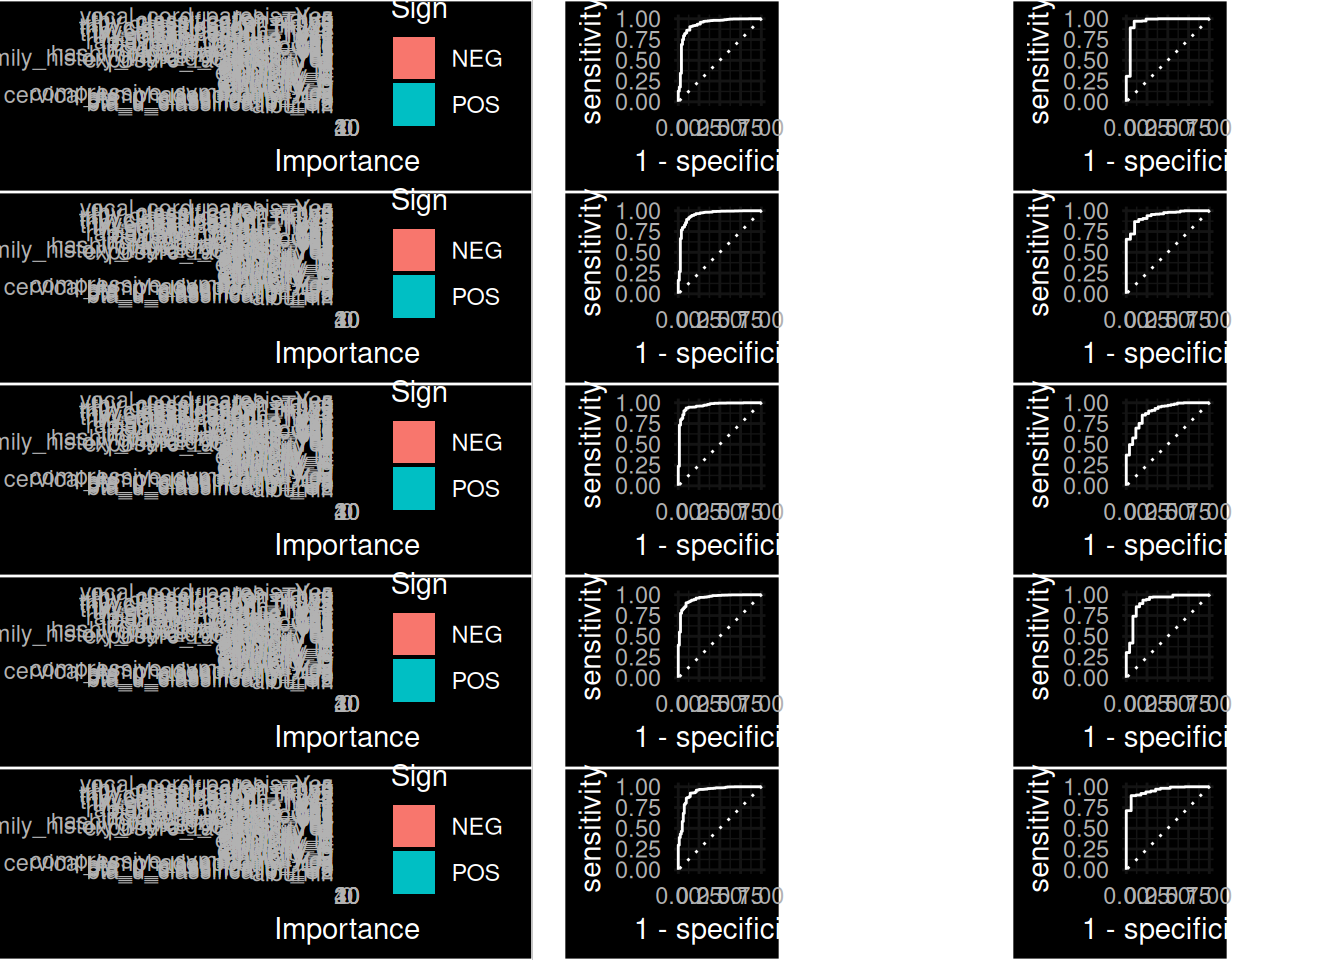

``` r
tidy_cart_elastic$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five CART imputed datasets.")
```

  Variable                            Sign      1    2    3    4    5
  ----------------------------------- ------ ---- ---- ---- ---- ----
  albumin                             POS      43   44   44   44   43
  bta_u_classification_U2             NEG      34   NA   10   34   32
  bta_u_classification_U2             POS      NA   20   NA   NA   NA
  bta_u_classification_U3             NEG      23   NA   19   NA   20
  bta_u_classification_U3             POS      NA   13   NA   41   NA
  bta_u_classification_U4             POS       6   17   21    4    7
  bta_u_classification_U5             POS      33   36   22   32   36
  cervical_lymphadenopathy_Yes        POS      41   43   43   43   33
  compressive_symptoms_Yes            NEG      14   18   NA   14   NA
  compressive_symptoms_Yes            POS      NA   NA   13   NA   17
  ethnicity_B                         NEG       4   10    8    7   21
  ethnicity_C                         NEG      NA   24   NA   NA   37
  ethnicity_C                         POS      24   NA   33   24   NA
  ethnicity_D                         NEG      26   26   31   30   27
  ethnicity_F                         NEG      27   30   35   29   25
  ethnicity_G                         POS       3   19    4   11    8
  ethnicity_H                         NEG      42   32   NA   42   41
  ethnicity_H                         POS      NA   NA   28   NA   NA
  ethnicity_J                         NEG      22   29   32   25   26
  ethnicity_K                         NEG       1   25    1    1   NA
  ethnicity_K                         POS      NA   NA   NA   NA    1
  ethnicity_L                         NEG      12   22    3   19    4
  ethnicity_M                         NEG      37   NA   40   NA   29
  ethnicity_M                         POS      NA   39   NA   36   NA
  ethnicity_N                         NEG      NA   35   NA   NA   35
  ethnicity_N                         POS      28   NA   36   10   NA
  ethnicity_P                         NEG      44    3   12   22   44
  ethnicity_R                         NEG      NA   28   27   26   NA
  ethnicity_R                         POS      25   NA   NA   NA   24
  ethnicity_S                         NEG      NA   42   NA   NA   NA
  ethnicity_S                         POS      40   NA   41   37   40
  ethnicity_Z                         POS      10    8    5    2   10
  exposure_radiation_Yes              NEG      36   11   20   12   12
  family_history_thyroid_cancer_Yes   NEG      NA    7   26   NA    3
  family_history_thyroid_cancer_Yes   POS      17   NA   NA    5   NA
  graves_disease_Yes                  POS      21   40   23   23   22
  hashimotos_thyroiditis_Yes          NEG      35   37   37   39   38
  hypertension_Yes                    NEG      15   NA   25   NA    5
  hypertension_Yes                    POS      NA   15   NA   13   NA
  incidental_nodule_Yes               POS       2    2    7    3   15
  lymphocytes                         NEG      NA   NA   38   NA   NA
  lymphocytes                         POS      31   33   NA   35   34
  monocyte                            NEG      32   31   34   33   31
  palpable_nodule_Yes                 NEG      NA   NA   15   NA   NA
  palpable_nodule_Yes                 POS       5   27   NA   15   18
  rapid_enlargement_Yes               NEG      NA   16   16   17   NA
  rapid_enlargement_Yes               POS      11   NA   NA   NA   11
  size_nodule_mm                      POS      39   41   39   38   39
  solitary_nodule_Yes                 NEG      NA   NA   NA   27   NA
  solitary_nodule_Yes                 POS      20   23   30   NA   23
  thy_classification_Thy1             POS      30    1   29   31   30
  thy_classification_Thy1c            NEG      NA   NA   11   NA    2
  thy_classification_Thy1c            POS      19    4   NA    6   NA
  thy_classification_Thy2             NEG      NA   34   24   NA   NA
  thy_classification_Thy2             POS      29   NA   NA   28   28
  thy_classification_Thy2c            NEG      18   21   17   21   16
  thy_classification_Thy3a            POS      13   12   14   20    9
  thy_classification_Thy3f            POS       8    5    6    9    6
  thy_classification_Thy4             POS      16    6    2    8   14
  thy_classification_Thy5             POS       7    9    9   18   13
  tsh_value                           NEG      NA   38   42   NA   NA
  tsh_value                           POS      38   NA   NA   40   42
  vocal_cord_paresis_Yes              NEG       9   14   18   16   19

  : Importance of features from LASSO model of five CART imputed
  datasets.

``` r
tidy_cart_elastic$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five CART imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.937   0.954   0.954   0.954   0.940
  bal_accuracy           binary         0.704   0.789   0.760   0.782   0.741
  detection_prevalence   binary         0.952   0.937   0.949   0.941   0.941
  f_meas                 binary         0.966   0.975   0.975   0.975   0.967
  j_index                binary         0.407   0.579   0.521   0.563   0.481
  kap                    binary         0.520   0.677   0.638   0.658   0.581
  mcc                    binary         0.552   0.693   0.663   0.673   0.602
  npv                    binary         0.805   0.870   0.886   0.843   0.804
  ppv                    binary         0.944   0.959   0.957   0.961   0.948
  precision              binary         0.944   0.959   0.957   0.961   0.948
  recall                 binary         0.990   0.991   0.994   0.990   0.987
  roc_auc                binary         0.933   0.950   0.962   0.958   0.937
  sens                   binary         0.990   0.991   0.994   0.990   0.987
  spec                   binary         0.418   0.588   0.527   0.573   0.494

  : Classification metrics from LASSO model of five CART imputed
  datasets (Training Data).

``` r
tidy_cart_elastic$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five CART imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.972   0.941   0.934   0.941   0.955
  kap                    binary         0.751   0.532   0.401   0.535   0.557
  sens                   binary         1.000   0.970   1.000   0.989   0.982
  spec                   binary         0.619   0.550   0.269   0.440   0.529
  ppv                    binary         0.971   0.967   0.932   0.949   0.971
  npv                    binary         1.000   0.579   1.000   0.786   0.643
  mcc                    binary         0.775   0.533   0.501   0.561   0.560
  j_index                binary         0.619   0.520   0.269   0.429   0.511
  bal_accuracy           binary         0.809   0.760   0.635   0.714   0.755
  detection_prevalence   binary         0.955   0.934   0.976   0.951   0.951
  precision              binary         0.971   0.967   0.932   0.949   0.971
  recall                 binary         1.000   0.970   1.000   0.989   0.982
  f_meas                 binary         0.985   0.968   0.965   0.968   0.976
  roc_auc                binary         0.957   0.939   0.890   0.914   0.955

  : Classification metrics from LASSO model of five CART imputed
  datasets (Testing Data).

## Random Forest

``` r
cowplot::plot_grid(imputed_rf_model_elastic[[1]]$importance_plot,
                   imputed_rf_model_elastic[[1]]$train_roc_curve_plot,
                   imputed_rf_model_elastic[[1]]$test_roc_curve_plot,
                   imputed_rf_model_elastic[[2]]$importance_plot,
                   imputed_rf_model_elastic[[2]]$train_roc_curve_plot,
                   imputed_rf_model_elastic[[2]]$test_roc_curve_plot,
                   imputed_rf_model_elastic[[3]]$importance_plot,
                   imputed_rf_model_elastic[[3]]$train_roc_curve_plot,
                   imputed_rf_model_elastic[[3]]$test_roc_curve_plot,
                   imputed_rf_model_elastic[[4]]$importance_plot,
                   imputed_rf_model_elastic[[4]]$train_roc_curve_plot,
                   imputed_rf_model_elastic[[4]]$test_roc_curve_plot,
                   imputed_rf_model_elastic[[5]]$importance_plot,
                   imputed_rf_model_elastic[[5]]$train_roc_curve_plot,
                   imputed_rf_model_elastic[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Rf", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

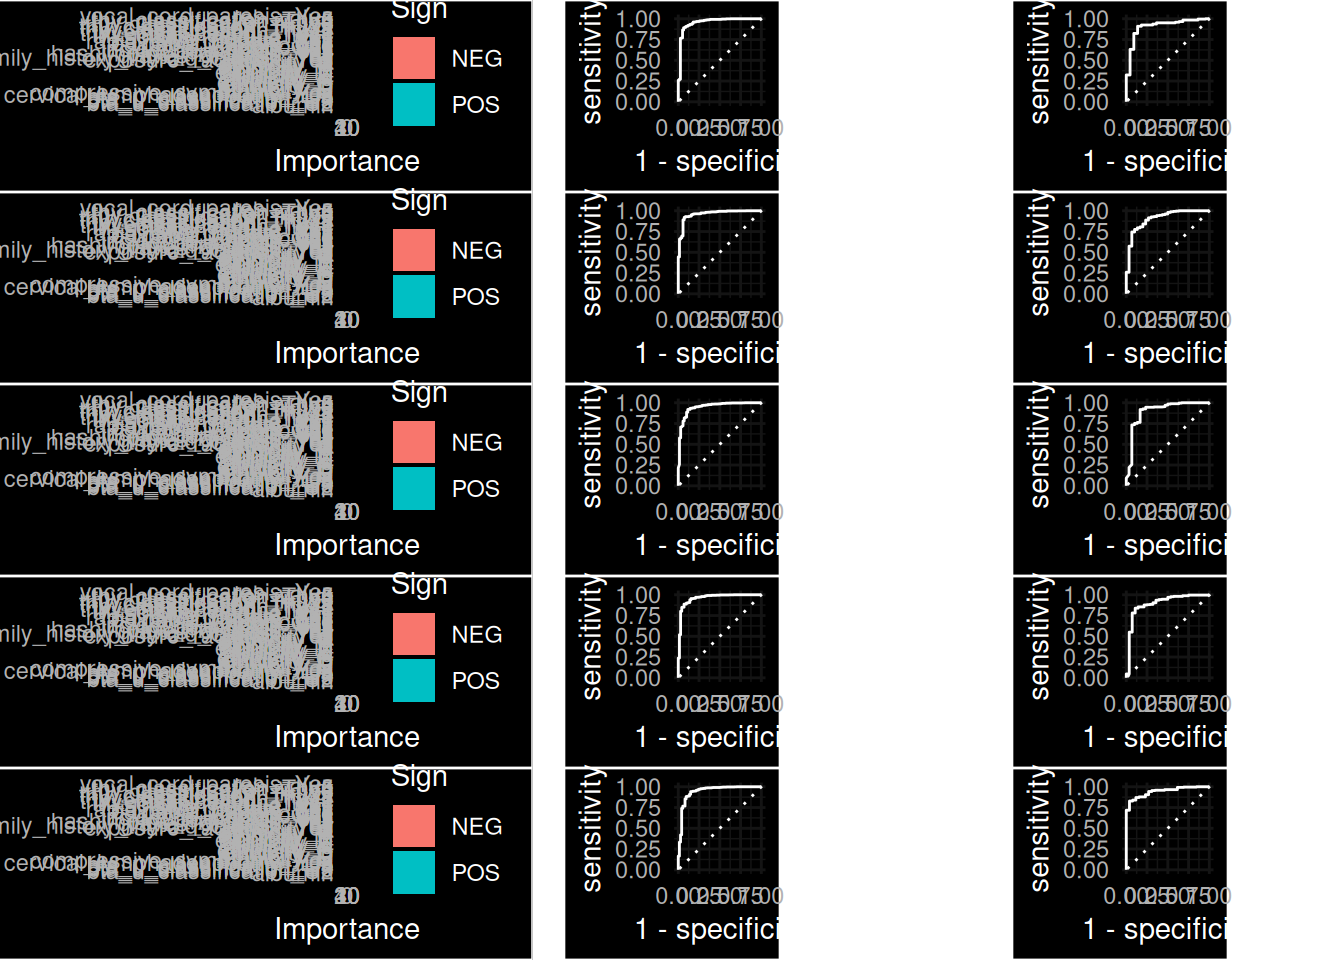

``` r
tidy_rf_elastic$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five RF imputed datasets.")
```

  Variable                            Sign      1    2    3    4    5
  ----------------------------------- ------ ---- ---- ---- ---- ----
  albumin                             POS      43   43   44   44   44
  bta_u_classification_U2             NEG      NA   39   35   36   30
  bta_u_classification_U2             POS       9   NA   NA   NA   NA
  bta_u_classification_U3             NEG      NA    8   21   35   NA
  bta_u_classification_U3             POS      18   NA   NA   NA   28
  bta_u_classification_U4             POS       8   20    8   19   15
  bta_u_classification_U5             POS      33   32   32   32   36
  cervical_lymphadenopathy_Yes        POS      42   37   43   41   41
  compressive_symptoms_Yes            NEG      NA    6   NA   NA    8
  compressive_symptoms_Yes            POS      16   NA   14   15   NA
  ethnicity_B                         NEG      24   16   17    5   10
  ethnicity_C                         NEG      NA   NA   24   NA   NA
  ethnicity_C                         POS      34   27   NA   25   37
  ethnicity_D                         NEG      32   31   28   21   18
  ethnicity_F                         NEG      29   30   29   34   32
  ethnicity_G                         NEG       1   NA   NA   NA   NA
  ethnicity_G                         POS      NA   11    9    9    6
  ethnicity_H                         NEG      22   41   41   43   43
  ethnicity_J                         NEG      25   NA   NA   23   NA
  ethnicity_J                         POS      NA   26   18   NA   35
  ethnicity_K                         NEG       2    1   NA    1   NA
  ethnicity_K                         POS      NA   NA    1   NA   12
  ethnicity_L                         NEG      17   17   10    2    1
  ethnicity_M                         NEG      27   NA   39   37   39
  ethnicity_M                         POS      NA   42   NA   NA   NA
  ethnicity_N                         POS      28   36   26   20   23
  ethnicity_P                         NEG      23   44   20   29    9
  ethnicity_R                         NEG      26   NA   34   NA   NA
  ethnicity_R                         POS      NA   25   NA   26   24
  ethnicity_S                         NEG      NA   NA   42   NA   25
  ethnicity_S                         POS      36   29   NA   40   NA
  ethnicity_Z                         NEG      NA    7   NA   NA   NA
  ethnicity_Z                         POS      13   NA    5   16   17
  exposure_radiation_Yes              NEG      19   10   38   39   38
  family_history_thyroid_cancer_Yes   NEG      NA   21    3   NA   NA
  family_history_thyroid_cancer_Yes   POS       6   NA   NA   12   21
  graves_disease_Yes                  NEG      NA   NA   31   NA   NA
  graves_disease_Yes                  POS      35   22   NA   22   11
  hashimotos_thyroiditis_Yes          NEG      NA   38   36   33   NA
  hashimotos_thyroiditis_Yes          POS      41   NA   NA   NA   34
  hypertension_Yes                    NEG      21   NA   NA   NA   NA
  hypertension_Yes                    POS      NA    4   19    3   13
  incidental_nodule_Yes               NEG      NA   NA   NA   NA   16
  incidental_nodule_Yes               POS      12    5    4   18   NA
  lymphocytes                         NEG      NA   NA   NA   NA   31
  lymphocytes                         POS      38   35   33   31   NA
  monocyte                            NEG      39   33   30   28   33
  palpable_nodule_Yes                 NEG      NA   23   NA   NA   26
  palpable_nodule_Yes                 POS       3   NA   22   42   NA
  rapid_enlargement_Yes               NEG      NA   NA   13   14    4
  rapid_enlargement_Yes               POS      11    3   NA   NA   NA
  size_nodule_mm                      POS      40   34   37   30   42
  solitary_nodule_Yes                 NEG      NA   15   NA   NA   NA
  solitary_nodule_Yes                 POS      37   NA   23    7   20
  thy_classification_Thy1             POS      31   24   27   27   27
  thy_classification_Thy1c            NEG      20   NA   NA   NA   22
  thy_classification_Thy1c            POS      NA   12    7   17   NA
  thy_classification_Thy2             NEG      NA   28   NA   NA   NA
  thy_classification_Thy2             POS      30   NA   25   24   29
  thy_classification_Thy2c            NEG      14   13   16   11   14
  thy_classification_Thy3a            POS      15    9   15   13   19
  thy_classification_Thy3f            POS       4    2   12    6    3
  thy_classification_Thy4             POS       5   19   11    4    5
  thy_classification_Thy5             POS      10   14    6   10    7
  tsh_value                           NEG      44   NA   NA   NA   NA
  tsh_value                           POS      NA   40   40   38   40
  vocal_cord_paresis_Yes              NEG       7   18    2    8    2

  : Importance of features from LASSO model of five RF imputed datasets.

``` r
tidy_rf_elastic$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five RF imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.955   0.952   0.949   0.959   0.950
  bal_accuracy           binary         0.808   0.740   0.712   0.795   0.728
  detection_prevalence   binary         0.932   0.955   0.961   0.943   0.957
  f_meas                 binary         0.975   0.975   0.973   0.978   0.973
  j_index                binary         0.616   0.479   0.423   0.590   0.456
  kap                    binary         0.691   0.601   0.553   0.690   0.589
  mcc                    binary         0.699   0.630   0.594   0.705   0.630
  npv                    binary         0.831   0.872   0.882   0.878   0.919
  ppv                    binary         0.964   0.956   0.952   0.964   0.952
  precision              binary         0.964   0.956   0.952   0.964   0.952
  recall                 binary         0.987   0.994   0.995   0.992   0.996
  roc_auc                binary         0.958   0.961   0.949   0.961   0.945
  sens                   binary         0.987   0.994   0.995   0.992   0.996
  spec                   binary         0.628   0.486   0.429   0.597   0.460

  : Classification metrics from LASSO model of five RF imputed datasets
  (Training Data).

``` r
tidy_rf_elastic$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five RF imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.917   0.934   0.927   0.917   0.934
  kap                    binary         0.356   0.546   0.479   0.389   0.457
  sens                   binary         0.962   0.992   0.992   0.981   0.992
  spec                   binary         0.364   0.433   0.367   0.321   0.346
  ppv                    binary         0.948   0.938   0.931   0.931   0.939
  npv                    binary         0.444   0.867   0.846   0.643   0.818
  mcc                    binary         0.358   0.585   0.528   0.416   0.506
  j_index                binary         0.326   0.426   0.359   0.302   0.339
  bal_accuracy           binary         0.663   0.713   0.679   0.651   0.669
  detection_prevalence   binary         0.938   0.948   0.955   0.951   0.962
  precision              binary         0.948   0.938   0.931   0.931   0.939
  recall                 binary         0.962   0.992   0.992   0.981   0.992
  f_meas                 binary         0.955   0.964   0.961   0.955   0.965
  roc_auc                binary         0.910   0.907   0.900   0.896   0.943

  : Classification metrics from LASSO model of five RF imputed datasets
  (Testing Data).

#### Random Forest

In [ ]:
load(file = paste(r_dir, "imputed_cart_model_forest.rds", sep = "/"))
load(file = paste(r_dir, "imputed_pmm_model_forest.rds", sep = "/"))
load(file = paste(r_dir, "imputed_rf_model_forest.rds", sep = "/"))

## PMM

``` r
cowplot::plot_grid(imputed_pmm_model_forest[[1]]$importance_plot,
                   imputed_pmm_model_forest[[1]]$train_roc_curve_plot,
                   imputed_pmm_model_forest[[1]]$test_roc_curve_plot,
                   imputed_pmm_model_forest[[2]]$importance_plot,
                   imputed_pmm_model_forest[[2]]$train_roc_curve_plot,
                   imputed_pmm_model_forest[[2]]$test_roc_curve_plot,
                   imputed_pmm_model_forest[[3]]$importance_plot,
                   imputed_pmm_model_forest[[3]]$train_roc_curve_plot,
                   imputed_pmm_model_forest[[3]]$test_roc_curve_plot,
                   imputed_pmm_model_forest[[4]]$importance_plot,
                   imputed_pmm_model_forest[[4]]$train_roc_curve_plot,
                   imputed_pmm_model_forest[[4]]$test_roc_curve_plot,
                   imputed_pmm_model_forest[[5]]$importance_plot,
                   imputed_pmm_model_forest[[5]]$train_roc_curve_plot,
                   imputed_pmm_model_forest[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

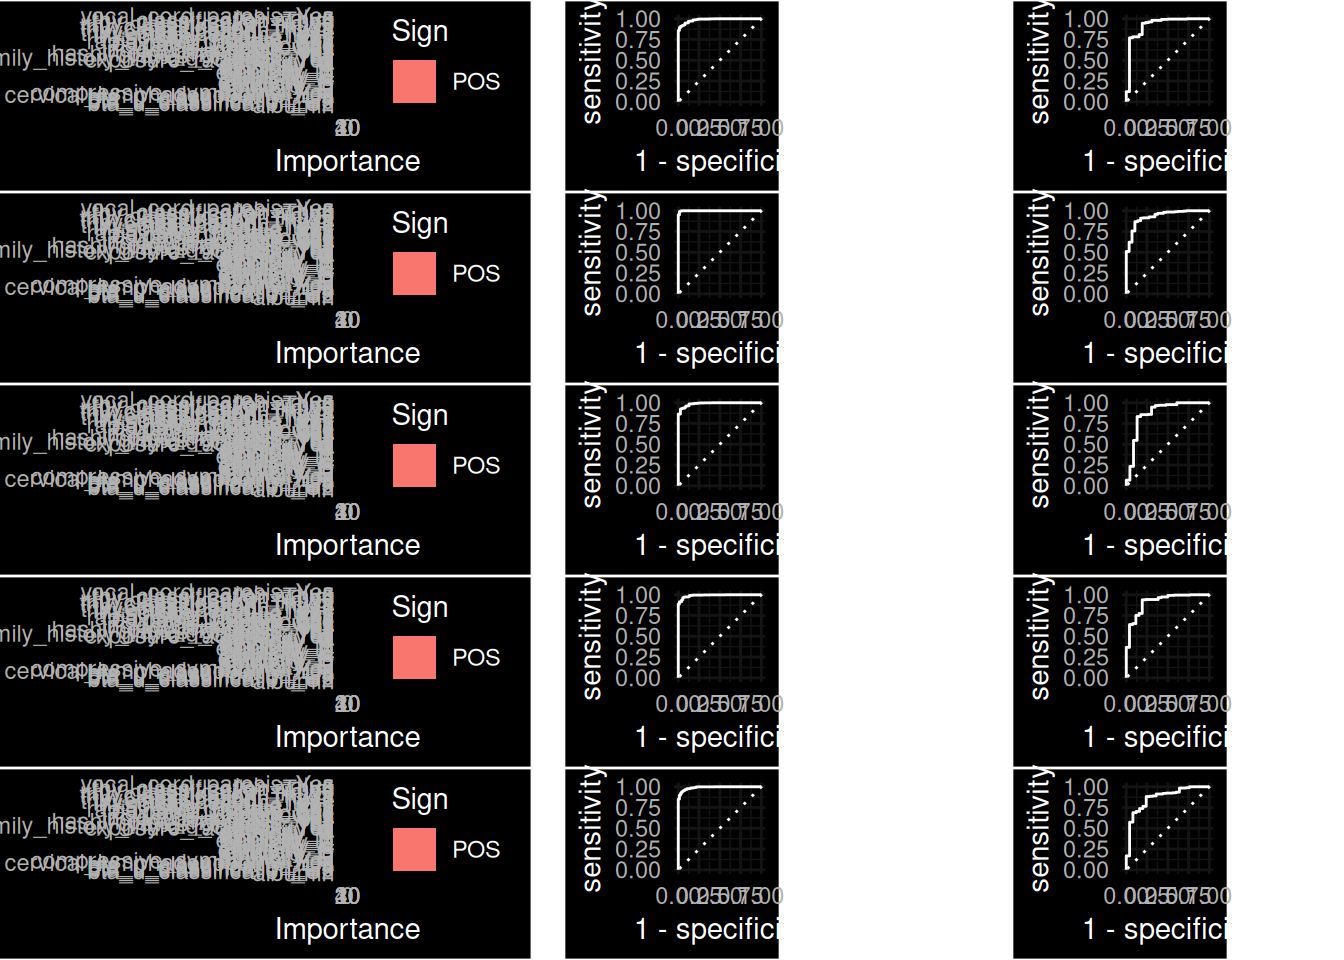

``` r
tidy_pmm_forest$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five PMM imputed datasets.")
```

  Variable                            Sign      1    2    3    4    5
  ----------------------------------- ------ ---- ---- ---- ---- ----
  albumin                             POS      42   44   44   44   43
  bta_u_classification_U2             POS      15   12   22   14   19
  bta_u_classification_U3             POS      12    8   11    5   12
  bta_u_classification_U4             POS      14   18   17   16   18
  bta_u_classification_U5             POS       4    3    2    4    3
  cervical_lymphadenopathy_Yes        POS       3   10    7    8   11
  compressive_symptoms_Yes            POS      24   27   26   28   25
  ethnicity_B                         POS      28   32   29   34   26
  ethnicity_C                         POS      16    6   13   15    9
  ethnicity_D                         POS      21   23   25   29   23
  ethnicity_F                         POS      33   34   32   32   34
  ethnicity_G                         POS      30   28   23   22   20
  ethnicity_H                         POS      35   30   31   20   32
  ethnicity_J                         POS      34   29   35   31   35
  ethnicity_K                         POS      37   36   39   37   40
  ethnicity_L                         POS      43   39   43   42   42
  ethnicity_M                         POS       5    4    8   10    5
  ethnicity_N                         POS      19   17   16   23   27
  ethnicity_P                         POS      13    9    9    7   15
  ethnicity_R                         POS      17   24    5   18    7
  ethnicity_S                         POS       6    7    6    2    1
  ethnicity_Z                         POS      18   25   18   19   24
  exposure_radiation_Yes              POS      26   15   10    9   13
  family_history_thyroid_cancer_Yes   POS      10   11   12   17   16
  graves_disease_Yes                  POS       7   16   15   13   14
  hashimotos_thyroiditis_Yes          POS       9    5    4    6    8
  hypertension_Yes                    POS      20   19   24   24   30
  incidental_nodule_Yes               POS      25   21   28   26   21
  lymphocytes                         POS      44   42   42   43   44
  monocyte                            POS      27   33   33   33   31
  palpable_nodule_Yes                 POS      31   20   30   30   28
  rapid_enlargement_Yes               POS      29   31   27   25   29
  size_nodule_mm                      POS      11   13   14   11   10
  solitary_nodule_Yes                 POS       8   14   21   12    6
  thy_classification_Thy1             POS       1    1    3    2    4
  thy_classification_Thy1c            POS      22   26   19   27   22
  thy_classification_Thy2             POS       2    2    1    2    2
  thy_classification_Thy2c            POS      41   41   41   39   39
  thy_classification_Thy3a            POS      36   38   36   36   38
  thy_classification_Thy3f            POS      39   40   38   38   36
  thy_classification_Thy4             POS      40   43   40   41   37
  thy_classification_Thy5             POS      32   37   37   35   33
  tsh_value                           POS      38   35   34   40   41
  vocal_cord_paresis_Yes              POS      23   22   20   21   17

  : Importance of features from LASSO model of five PMM imputed
  datasets.

``` r
tidy_pmm_forest$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five PMM imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.961   0.987   0.962   0.969   0.972
  bal_accuracy           binary         0.770   0.922   0.786   0.830   0.846
  detection_prevalence   binary         0.954   0.930   0.949   0.941   0.939
  f_meas                 binary         0.979   0.993   0.979   0.983   0.985
  j_index                binary         0.540   0.845   0.571   0.660   0.692
  kap                    binary         0.683   0.909   0.708   0.768   0.798
  mcc                    binary         0.720   0.913   0.741   0.783   0.812
  npv                    binary         1.000   1.000   1.000   0.961   0.981
  ppv                    binary         0.959   0.986   0.960   0.969   0.972
  precision              binary         0.959   0.986   0.960   0.969   0.972
  recall                 binary         1.000   1.000   1.000   0.998   0.999
  roc_auc                binary         0.987   0.999   0.989   0.992   0.991
  sens                   binary         1.000   1.000   1.000   0.998   0.999
  spec                   binary         0.540   0.845   0.571   0.662   0.693

  : Classification metrics from LASSO model of five PMM imputed datasets
  (Training Data).

``` r
tidy_pmm_forest$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five PMM imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.927   0.927   0.941   0.938   0.927
  kap                    binary         0.302   0.407   0.394   0.474   0.399
  sens                   binary         1.000   1.000   1.000   0.996   0.985
  spec                   binary         0.192   0.276   0.261   0.346   0.320
  ppv                    binary         0.926   0.925   0.940   0.939   0.938
  npv                    binary         1.000   1.000   1.000   0.900   0.667
  mcc                    binary         0.422   0.505   0.495   0.536   0.429
  j_index                binary         0.192   0.276   0.261   0.342   0.305
  bal_accuracy           binary         0.596   0.638   0.630   0.671   0.652
  detection_prevalence   binary         0.983   0.972   0.979   0.965   0.958
  precision              binary         0.926   0.925   0.940   0.939   0.938
  recall                 binary         1.000   1.000   1.000   0.996   0.985
  f_meas                 binary         0.962   0.961   0.969   0.967   0.961
  roc_auc                binary         0.924   0.932   0.871   0.914   0.868

  : Classification metrics from LASSO model of five PMM imputed datasets
  (Testing Data).

## CART

``` r
cowplot::plot_grid(imputed_cart_model_forest[[1]]$importance_plot,
                   imputed_cart_model_forest[[1]]$train_roc_curve_plot,
                   imputed_cart_model_forest[[1]]$test_roc_curve_plot,
                   imputed_cart_model_forest[[2]]$importance_plot,
                   imputed_cart_model_forest[[2]]$train_roc_curve_plot,
                   imputed_cart_model_forest[[2]]$test_roc_curve_plot,
                   imputed_cart_model_forest[[3]]$importance_plot,
                   imputed_cart_model_forest[[3]]$train_roc_curve_plot,
                   imputed_cart_model_forest[[3]]$test_roc_curve_plot,
                   imputed_cart_model_forest[[4]]$importance_plot,
                   imputed_cart_model_forest[[4]]$train_roc_curve_plot,
                   imputed_cart_model_forest[[4]]$test_roc_curve_plot,
                   imputed_cart_model_forest[[5]]$importance_plot,
                   imputed_cart_model_forest[[5]]$train_roc_curve_plot,
                   imputed_cart_model_forest[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

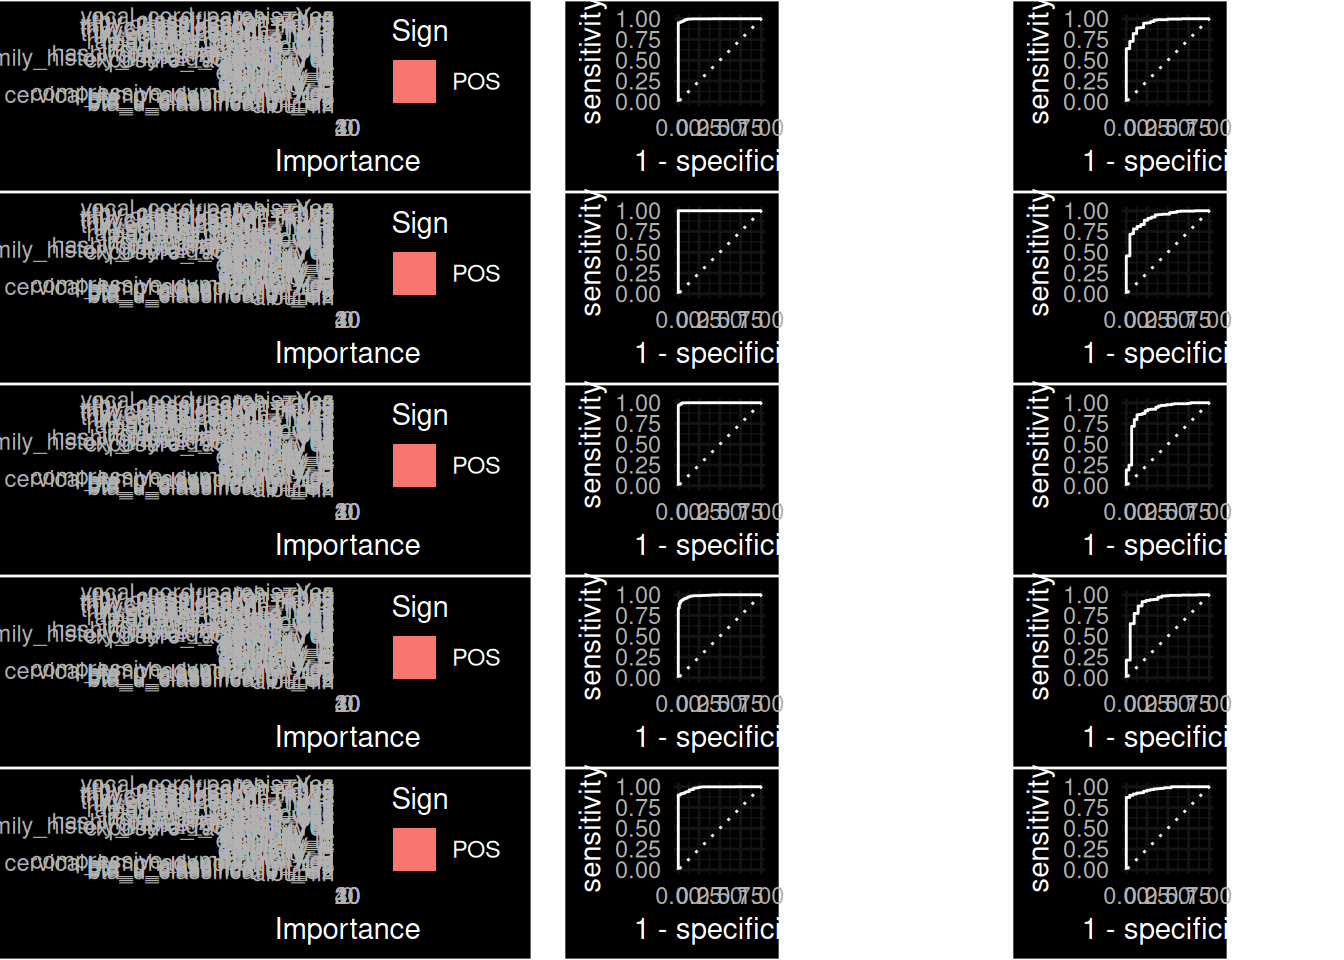

``` r
tidy_cart_forest$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five CART imputed datasets.")
```

  Variable                            Sign      1      2    3    4    5
  ----------------------------------- ------ ---- ------ ---- ---- ----
  albumin                             POS      44   44.0   42   43   42
  bta_u_classification_U2             POS      12    9.0   17   13    9
  bta_u_classification_U3             POS       9   15.0   12    4   25
  bta_u_classification_U4             POS      19   17.0   21   21   19
  bta_u_classification_U5             POS       3    1.5   19    6    4
  cervical_lymphadenopathy_Yes        POS       5   12.0    7    5   11
  compressive_symptoms_Yes            POS      27   27.0   26   27   21
  ethnicity_B                         POS      32   33.0   31   30   32
  ethnicity_C                         POS      14   13.0    6   10   16
  ethnicity_D                         POS      18   22.0   25   28   24
  ethnicity_F                         POS      31   29.0   33   33   28
  ethnicity_G                         POS      25   28.0   30   26   30
  ethnicity_H                         POS      28   34.0   32   32   31
  ethnicity_J                         POS      33   30.0   28   35   33
  ethnicity_K                         POS      35   35.0   35   38   38
  ethnicity_L                         POS      42   40.0   40   44   43
  ethnicity_M                         POS       8    7.0    8    8    6
  ethnicity_N                         POS      17   19.0   20   17   18
  ethnicity_P                         POS       7   11.0   14   11    7
  ethnicity_R                         POS      20   25.0   10   19   20
  ethnicity_S                         POS       6    5.0    5    2    1
  ethnicity_Z                         POS      22   24.0   27   23   23
  exposure_radiation_Yes              POS      11   18.0    9   14   14
  family_history_thyroid_cancer_Yes   POS      16    8.0    4   15   12
  graves_disease_Yes                  POS      13    6.0   11   16    8
  hashimotos_thyroiditis_Yes          POS       4    4.0    3    7    5
  hypertension_Yes                    POS      23   21.0   24   25   17
  incidental_nodule_Yes               POS      30   23.0   23   24   26
  lymphocytes                         POS      43   37.0   43   42   44
  monocyte                            POS      34   32.0   34   31   36
  palpable_nodule_Yes                 POS      26   26.0   22   20   27
  rapid_enlargement_Yes               POS      29   31.0   29   29   29
  size_nodule_mm                      POS      10   10.0   13    9   10
  solitary_nodule_Yes                 POS      15   14.0   16   12   15
  thy_classification_Thy1             POS       1    1.5    2    1    2
  thy_classification_Thy1c            POS      24   16.0   15   22   22
  thy_classification_Thy2             POS       2    3.0    1    3    3
  thy_classification_Thy2c            POS      41   41.0   41   41   39
  thy_classification_Thy3a            POS      37   39.0   37   34   35
  thy_classification_Thy3f            POS      40   42.0   39   37   37
  thy_classification_Thy4             POS      39   43.0   44   40   41
  thy_classification_Thy5             POS      36   38.0   38   36   34
  tsh_value                           POS      38   36.0   36   39   40
  vocal_cord_paresis_Yes              POS      21   20.0   18   18   13

  : Importance of features from LASSO model of five CART imputed
  datasets.

``` r
tidy_cart_forest$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five CART imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.973   0.999   0.991   0.955   0.970
  bal_accuracy           binary         0.855   0.994   0.942   0.759   0.835
  detection_prevalence   binary         0.936   0.912   0.929   0.951   0.940
  f_meas                 binary         0.986   0.999   0.995   0.976   0.984
  j_index                binary         0.709   0.987   0.884   0.518   0.670
  kap                    binary         0.810   0.993   0.933   0.656   0.781
  mcc                    binary         0.823   0.993   0.935   0.694   0.798
  npv                    binary         0.982   1.000   1.000   0.976   0.981
  ppv                    binary         0.973   0.999   0.990   0.954   0.969
  precision              binary         0.973   0.999   0.990   0.954   0.969
  recall                 binary         0.999   1.000   1.000   0.999   0.999
  roc_auc                binary         0.996   1.000   0.999   0.988   0.986
  sens                   binary         0.999   1.000   1.000   0.999   0.999
  spec                   binary         0.711   0.987   0.884   0.519   0.671

  : Classification metrics from LASSO model of five CART imputed
  datasets (Training Data).

``` r
tidy_cart_forest$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five CART imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.948   0.934   0.910   0.948   0.948
  kap                    binary         0.589   0.322   0.344   0.461   0.569
  sens                   binary         0.989   0.996   0.988   0.996   0.992
  spec                   binary         0.500   0.217   0.258   0.333   0.458
  ppv                    binary         0.956   0.936   0.917   0.950   0.953
  npv                    binary         0.800   0.833   0.727   0.875   0.846
  mcc                    binary         0.608   0.405   0.398   0.521   0.600
  j_index                binary         0.489   0.214   0.246   0.330   0.451
  bal_accuracy           binary         0.744   0.607   0.623   0.665   0.725
  detection_prevalence   binary         0.948   0.979   0.962   0.972   0.955
  precision              binary         0.956   0.936   0.917   0.950   0.953
  recall                 binary         0.989   0.996   0.988   0.996   0.992
  f_meas                 binary         0.972   0.965   0.951   0.973   0.972
  roc_auc                binary         0.949   0.917   0.901   0.912   0.971

  : Classification metrics from LASSO model of five CART imputed
  datasets (Testing Data).

## Random Forest

``` r
cowplot::plot_grid(imputed_rf_model_forest[[1]]$importance_plot,
                   imputed_rf_model_forest[[1]]$train_roc_curve_plot,
                   imputed_rf_model_forest[[1]]$test_roc_curve_plot,
                   imputed_rf_model_forest[[2]]$importance_plot,
                   imputed_rf_model_forest[[2]]$train_roc_curve_plot,
                   imputed_rf_model_forest[[2]]$test_roc_curve_plot,
                   imputed_rf_model_forest[[3]]$importance_plot,
                   imputed_rf_model_forest[[3]]$train_roc_curve_plot,
                   imputed_rf_model_forest[[3]]$test_roc_curve_plot,
                   imputed_rf_model_forest[[4]]$importance_plot,
                   imputed_rf_model_forest[[4]]$train_roc_curve_plot,
                   imputed_rf_model_forest[[4]]$test_roc_curve_plot,
                   imputed_rf_model_forest[[5]]$importance_plot,
                   imputed_rf_model_forest[[5]]$train_roc_curve_plot,
                   imputed_rf_model_forest[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Rf", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

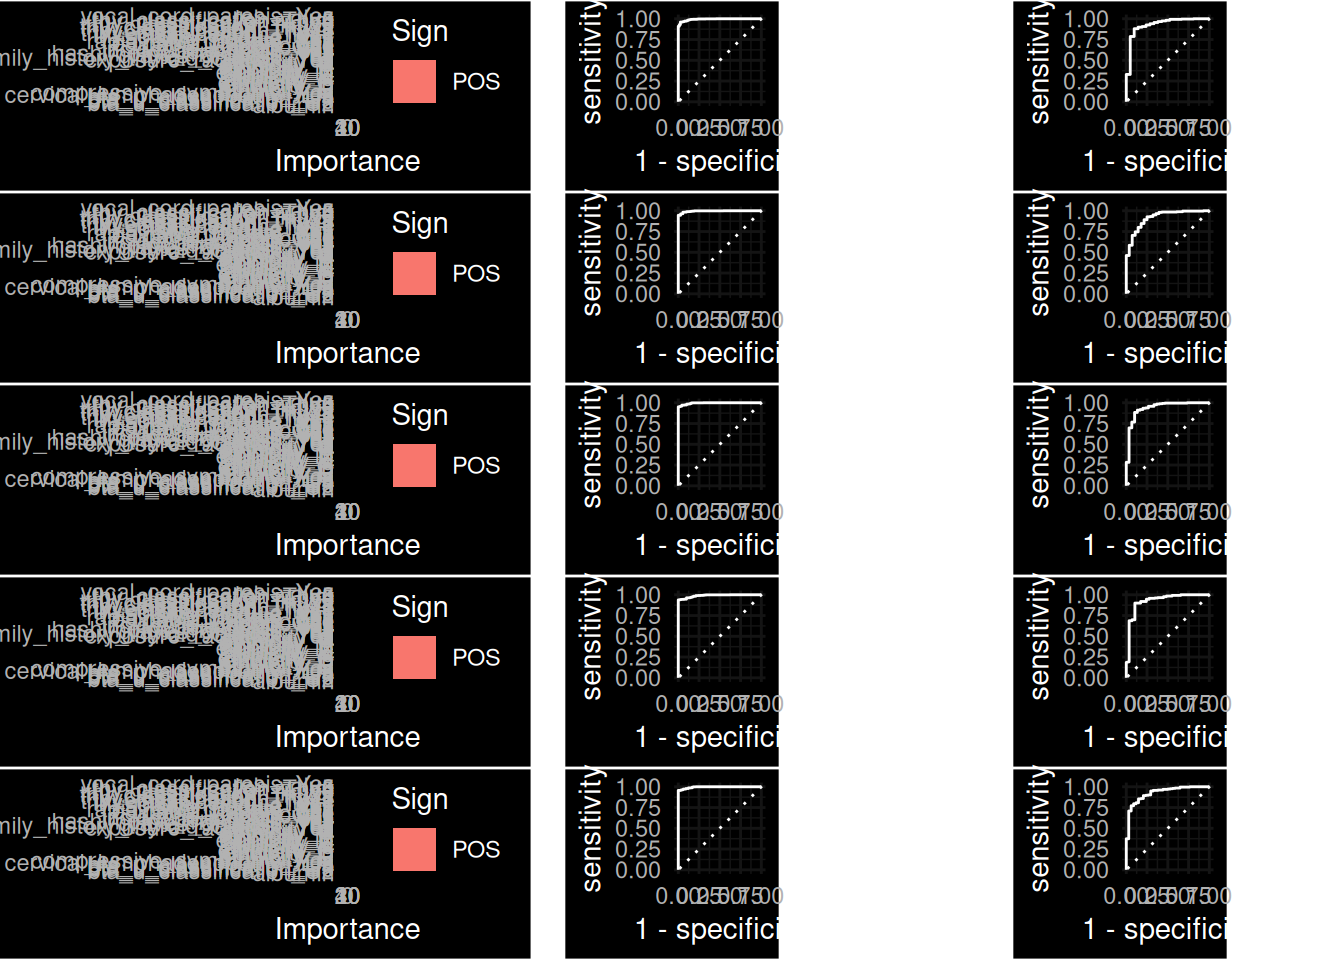

``` r
tidy_rf_forest$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five RF imputed datasets.")
```

  Variable                            Sign      1    2    3    4    5
  ----------------------------------- ------ ---- ---- ---- ---- ----
  albumin                             POS      44   43   44   43   43
  bta_u_classification_U2             POS      14   17   10   15   11
  bta_u_classification_U3             POS      12   13   11   10    4
  bta_u_classification_U4             POS      20   21   23   17   15
  bta_u_classification_U5             POS       4    4    3    2    2
  cervical_lymphadenopathy_Yes        POS       9    6    8    5    9
  compressive_symptoms_Yes            POS      25   29   28   21   25
  ethnicity_B                         POS      30   30   31   32   26
  ethnicity_C                         POS       6   16   13   13    8
  ethnicity_D                         POS      24   22   21   26   28
  ethnicity_F                         POS      32   31   33   31   29
  ethnicity_G                         POS      27   19   19   22   24
  ethnicity_H                         POS      31   33   27   30   31
  ethnicity_J                         POS      34   34   34   39   39
  ethnicity_K                         POS      35   35   36   36   34
  ethnicity_L                         POS      41   42   43   42   41
  ethnicity_M                         POS      10    8    4    7    7
  ethnicity_N                         POS      18   15    6   19   21
  ethnicity_P                         POS       5   12   15   11   13
  ethnicity_R                         POS      17   27   14   27   16
  ethnicity_S                         POS       7    9    7    8    6
  ethnicity_Z                         POS      21   23   24   20   19
  exposure_radiation_Yes              POS      16    5   17   16   10
  family_history_thyroid_cancer_Yes   POS       8    3   12   12   18
  graves_disease_Yes                  POS       3   14   22   18   14
  hashimotos_thyroiditis_Yes          POS      11    7    5    4    5
  hypertension_Yes                    POS      22   26   30   24   22
  incidental_nodule_Yes               POS      26   18   26   28   27
  lymphocytes                         POS      43   44   42   44   44
  monocyte                            POS      33   32   32   33   35
  palpable_nodule_Yes                 POS      28   25   20   25   32
  rapid_enlargement_Yes               POS      29   28   29   23   30
  size_nodule_mm                      POS      13   10    9    9   12
  solitary_nodule_Yes                 POS      15   11   16    6   17
  thy_classification_Thy1             POS       1    1    2    2    1
  thy_classification_Thy1c            POS      23   24   25   29   23
  thy_classification_Thy2             POS       2    2    1    2    3
  thy_classification_Thy2c            POS      42   39   41   40   42
  thy_classification_Thy3a            POS      38   37   37   34   37
  thy_classification_Thy3f            POS      37   40   39   37   38
  thy_classification_Thy4             POS      39   38   40   38   40
  thy_classification_Thy5             POS      36   36   35   35   36
  tsh_value                           POS      40   41   38   41   33
  vocal_cord_paresis_Yes              POS      19   20   18   14   20

  : Importance of features from LASSO model of five RF imputed datasets.

``` r
tidy_rf_forest$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five RF imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.964   0.977   0.976   0.971   0.973
  bal_accuracy           binary         0.809   0.867   0.850   0.830   0.826
  detection_prevalence   binary         0.942   0.937   0.943   0.944   0.950
  f_meas                 binary         0.981   0.988   0.987   0.984   0.986
  j_index                binary         0.619   0.735   0.700   0.661   0.651
  kap                    binary         0.741   0.829   0.811   0.775   0.775
  mcc                    binary         0.764   0.839   0.826   0.792   0.796
  npv                    binary         0.980   0.982   1.000   0.979   1.000
  ppv                    binary         0.963   0.977   0.974   0.971   0.972
  precision              binary         0.963   0.977   0.974   0.971   0.972
  recall                 binary         0.999   0.999   1.000   0.999   1.000
  roc_auc                binary         0.994   0.996   0.996   0.990   0.995
  sens                   binary         0.999   0.999   1.000   0.999   1.000
  spec                   binary         0.620   0.736   0.700   0.662   0.651

  : Classification metrics from LASSO model of five RF imputed datasets
  (Training Data).

``` r
tidy_rf_forest$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five RF imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.941   0.941   0.931   0.934   0.910
  kap                    binary         0.304   0.607   0.494   0.545   0.376
  sens                   binary         1.000   0.985   0.996   0.988   0.996
  spec                   binary         0.191   0.536   0.367   0.448   0.265
  ppv                    binary         0.940   0.952   0.931   0.941   0.910
  npv                    binary         1.000   0.789   0.917   0.812   0.900
  mcc                    binary         0.423   0.621   0.555   0.574   0.460
  j_index                binary         0.191   0.520   0.363   0.437   0.261
  bal_accuracy           binary         0.595   0.760   0.681   0.718   0.630
  detection_prevalence   binary         0.986   0.934   0.958   0.944   0.965
  precision              binary         0.940   0.952   0.931   0.941   0.910
  recall                 binary         1.000   0.985   0.996   0.988   0.996
  f_meas                 binary         0.969   0.968   0.963   0.964   0.951
  roc_auc                binary         0.929   0.916   0.939   0.927   0.925

  : Classification metrics from LASSO model of five RF imputed datasets
  (Testing Data).

#### Gradient Boosting

In [ ]:
load(file = paste(r_dir, "imputed_cart_model_xgboost.rds", sep = "/"))
load(file = paste(r_dir, "imputed_pmm_model_xgboost.rds", sep = "/"))
load(file = paste(r_dir, "imputed_rf_model_xgboost.rds", sep = "/"))

## PMM

``` r
cowplot::plot_grid(imputed_pmm_model_xgboost[[1]]$importance_plot,
                   imputed_pmm_model_xgboost[[1]]$train_roc_curve_plot,
                   imputed_pmm_model_xgboost[[1]]$test_roc_curve_plot,
                   imputed_pmm_model_xgboost[[2]]$importance_plot,
                   imputed_pmm_model_xgboost[[2]]$train_roc_curve_plot,
                   imputed_pmm_model_xgboost[[2]]$test_roc_curve_plot,
                   imputed_pmm_model_xgboost[[3]]$importance_plot,
                   imputed_pmm_model_xgboost[[3]]$train_roc_curve_plot,
                   imputed_pmm_model_xgboost[[3]]$test_roc_curve_plot,
                   imputed_pmm_model_xgboost[[4]]$importance_plot,
                   imputed_pmm_model_xgboost[[4]]$train_roc_curve_plot,
                   imputed_pmm_model_xgboost[[4]]$test_roc_curve_plot,
                   imputed_pmm_model_xgboost[[5]]$importance_plot,
                   imputed_pmm_model_xgboost[[5]]$train_roc_curve_plot,
                   imputed_pmm_model_xgboost[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

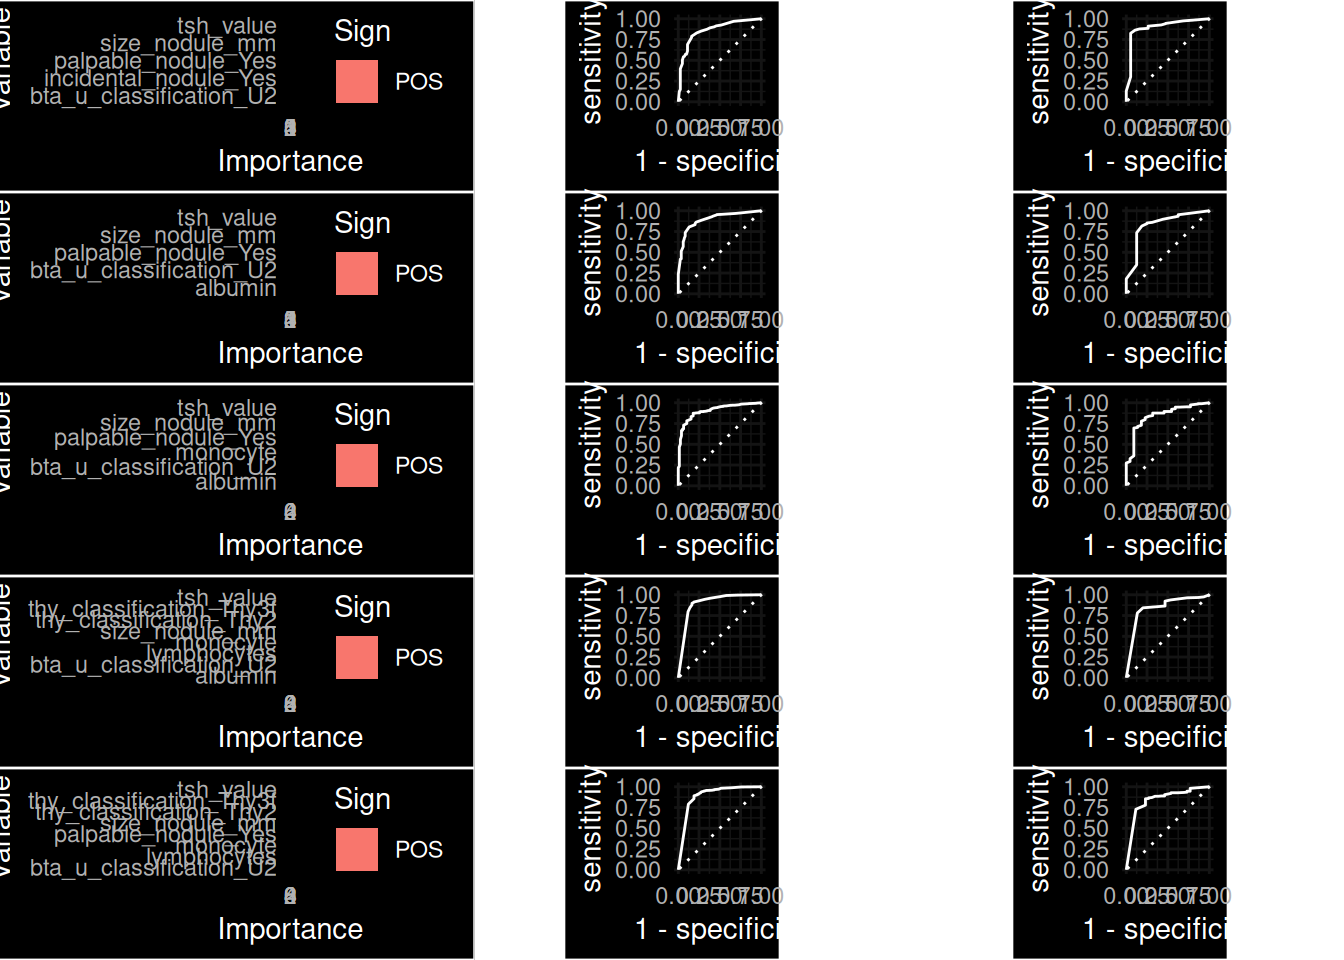

``` r
tidy_pmm_xgboost$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five PMM imputed datasets.")
```

  Variable                   Sign      1    2    3    4    5
  -------------------------- ------ ---- ---- ---- ---- ----
  albumin                    POS      NA    5    3    8   NA
  bta_u_classification_U2    POS       1    1    1    1    1
  incidental_nodule_Yes      POS       5   NA   NA   NA   NA
  lymphocytes                POS      NA   NA   NA    6    8
  monocyte                   POS      NA   NA    6    7    6
  palpable_nodule_Yes        POS       3    4    5   NA    7
  size_nodule_mm             POS       2    2    2    4    4
  thy_classification_Thy2    POS      NA   NA   NA    3    3
  thy_classification_Thy3f   POS      NA   NA   NA    5    2
  tsh_value                  POS       4    3    4    2    5

  : Importance of features from LASSO model of five PMM imputed
  datasets.

``` r
tidy_pmm_xgboost$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five PMM imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2        3       4       5
  ---------------------- ------------ ------- ------- -------- ------- -------
  accuracy               binary         0.906   0.903   0.9107   0.930   0.934
  bal_accuracy           binary         0.500   0.500   0.5237   0.736   0.670
  detection_prevalence   binary         1.000   1.000   0.9919   0.932   0.959
  f_meas                 binary         0.951   0.949   0.9530   0.962   0.965
  j_index                binary         0.000   0.000   0.0475   0.472   0.340
  kap                    binary         0.000   0.000   0.0804   0.547   0.447
  mcc                    binary            NA      NA   0.1517   0.558   0.482
  npv                    binary           NaN     NaN   0.5714   0.712   0.743
  ppv                    binary         0.906   0.903   0.9135   0.947   0.942
  precision              binary         0.906   0.903   0.9135   0.947   0.942
  recall                 binary         1.000   1.000   0.9962   0.978   0.989
  roc_auc                binary         0.864   0.895   0.9047   0.901   0.894
  sens                   binary         1.000   1.000   0.9962   0.978   0.989
  spec                   binary         0.000   0.000   0.0513   0.494   0.351

  : Classification metrics from LASSO model of five PMM imputed datasets
  (Training Data).

``` r
tidy_pmm_xgboost$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five PMM imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2        3       4       5
  ---------------------- ------------ ------- ------- -------- ------- -------
  accuracy               binary         0.934   0.944   0.9201   0.927   0.885
  kap                    binary         0.000   0.000   0.1233   0.237   0.206
  sens                   binary         1.000   1.000   0.9887   0.963   0.950
  spec                   binary         0.000   0.000   0.0909   0.267   0.231
  ppv                    binary         0.934   0.944   0.9293   0.960   0.926
  npv                    binary           NaN     NaN   0.4000   0.286   0.316
  mcc                    binary            NA      NA   0.1619   0.238   0.209
  j_index                binary         0.000   0.000   0.0796   0.230   0.181
  bal_accuracy           binary         0.500   0.500   0.5398   0.615   0.591
  detection_prevalence   binary         1.000   1.000   0.9826   0.951   0.934
  precision              binary         0.934   0.944   0.9293   0.960   0.926
  recall                 binary         1.000   1.000   0.9887   0.963   0.950
  f_meas                 binary         0.966   0.971   0.9581   0.962   0.938
  roc_auc                binary         0.902   0.834   0.8447   0.845   0.845

  : Classification metrics from LASSO model of five PMM imputed datasets
  (Testing Data).

## CART

``` r
cowplot::plot_grid(imputed_cart_model_xgboost[[1]]$importance_plot,
                   imputed_cart_model_xgboost[[1]]$train_roc_curve_plot,
                   imputed_cart_model_xgboost[[1]]$test_roc_curve_plot,
                   imputed_cart_model_xgboost[[2]]$importance_plot,
                   imputed_cart_model_xgboost[[2]]$train_roc_curve_plot,
                   imputed_cart_model_xgboost[[2]]$test_roc_curve_plot,
                   imputed_cart_model_xgboost[[3]]$importance_plot,
                   imputed_cart_model_xgboost[[3]]$train_roc_curve_plot,
                   imputed_cart_model_xgboost[[3]]$test_roc_curve_plot,
                   imputed_cart_model_xgboost[[4]]$importance_plot,
                   imputed_cart_model_xgboost[[4]]$train_roc_curve_plot,
                   imputed_cart_model_xgboost[[4]]$test_roc_curve_plot,
                   imputed_cart_model_xgboost[[5]]$importance_plot,
                   imputed_cart_model_xgboost[[5]]$train_roc_curve_plot,
                   imputed_cart_model_xgboost[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Cart", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

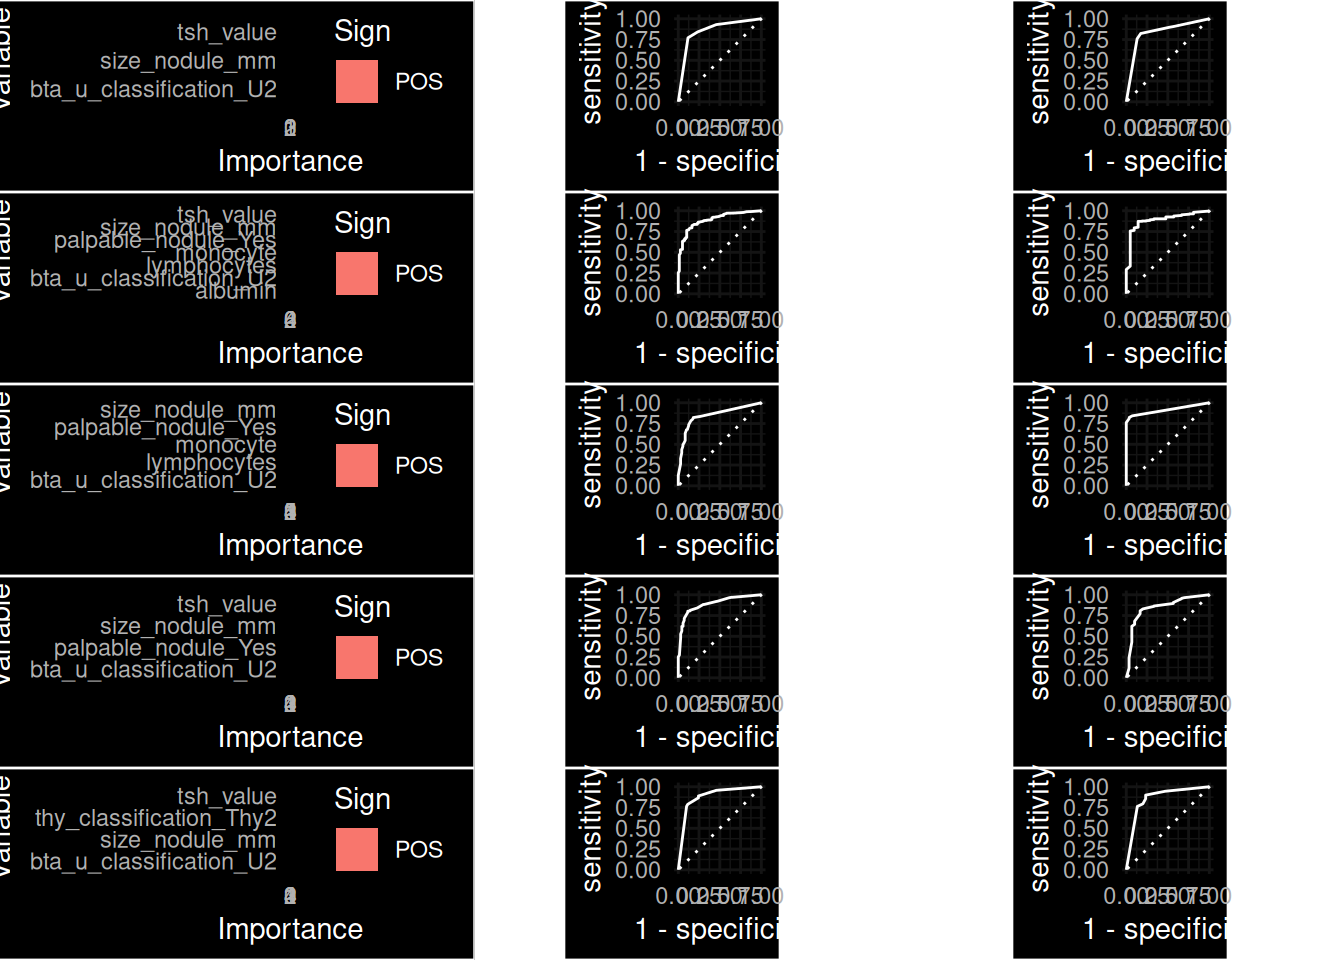

``` r
tidy_cart_xgboost$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five CART imputed datasets.")
```

  Variable                  Sign      1    2    3    4    5
  ------------------------- ------ ---- ---- ---- ---- ----
  albumin                   POS      NA    3   NA   NA   NA
  bta_u_classification_U2   POS       1    1    1    1    1
  lymphocytes               POS      NA    6    5   NA   NA
  monocyte                  POS      NA    7    3   NA   NA
  palpable_nodule_Yes       POS      NA    4    2    4   NA
  size_nodule_mm            POS       3    2    4    2    4
  thy_classification_Thy2   POS      NA   NA   NA   NA    2
  tsh_value                 POS       2    5   NA    3    3

  : Importance of features from LASSO model of five CART imputed
  datasets.

``` r
tidy_cart_xgboost$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five CART imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.911   0.908   0.916   0.919   0.919
  bal_accuracy           binary         0.500   0.500   0.500   0.500   0.500
  detection_prevalence   binary         1.000   1.000   1.000   1.000   1.000
  f_meas                 binary         0.953   0.952   0.956   0.958   0.958
  j_index                binary         0.000   0.000   0.000   0.000   0.000
  kap                    binary         0.000   0.000   0.000   0.000   0.000
  mcc                    binary            NA      NA      NA      NA      NA
  npv                    binary           NaN     NaN     NaN     NaN     NaN
  ppv                    binary         0.911   0.908   0.916   0.919   0.919
  precision              binary         0.911   0.908   0.916   0.919   0.919
  recall                 binary         1.000   1.000   1.000   1.000   1.000
  roc_auc                binary         0.861   0.890   0.847   0.892   0.885
  sens                   binary         1.000   1.000   1.000   1.000   1.000
  spec                   binary         0.000   0.000   0.000   0.000   0.000

  : Classification metrics from LASSO model of five CART imputed
  datasets (Training Data).

``` r
tidy_cart_xgboost$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five CART imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.920   0.927   0.903   0.896   0.896
  kap                    binary         0.000   0.000   0.000   0.000   0.000
  sens                   binary         1.000   1.000   1.000   1.000   1.000
  spec                   binary         0.000   0.000   0.000   0.000   0.000
  ppv                    binary         0.920   0.927   0.903   0.896   0.896
  npv                    binary           NaN     NaN     NaN     NaN     NaN
  mcc                    binary            NA      NA      NA      NA      NA
  j_index                binary         0.000   0.000   0.000   0.000   0.000
  bal_accuracy           binary         0.500   0.500   0.500   0.500   0.500
  detection_prevalence   binary         1.000   1.000   1.000   1.000   1.000
  precision              binary         0.920   0.927   0.903   0.896   0.896
  recall                 binary         1.000   1.000   1.000   1.000   1.000
  f_meas                 binary         0.958   0.962   0.949   0.945   0.945
  roc_auc                binary         0.837   0.889   0.913   0.848   0.865

  : Classification metrics from LASSO model of five CART imputed
  datasets (Testing Data).

## Random Forest

``` r
cowplot::plot_grid(imputed_rf_model_xgboost[[1]]$importance_plot,
                   imputed_rf_model_xgboost[[1]]$train_roc_curve_plot,
                   imputed_rf_model_xgboost[[1]]$test_roc_curve_plot,
                   imputed_rf_model_xgboost[[2]]$importance_plot,
                   imputed_rf_model_xgboost[[2]]$train_roc_curve_plot,
                   imputed_rf_model_xgboost[[2]]$test_roc_curve_plot,
                   imputed_rf_model_xgboost[[3]]$importance_plot,
                   imputed_rf_model_xgboost[[3]]$train_roc_curve_plot,
                   imputed_rf_model_xgboost[[3]]$test_roc_curve_plot,
                   imputed_rf_model_xgboost[[4]]$importance_plot,
                   imputed_rf_model_xgboost[[4]]$train_roc_curve_plot,
                   imputed_rf_model_xgboost[[4]]$test_roc_curve_plot,
                   imputed_rf_model_xgboost[[5]]$importance_plot,
                   imputed_rf_model_xgboost[[5]]$train_roc_curve_plot,
                   imputed_rf_model_xgboost[[5]]$test_roc_curve_plot,
                   # labels = c("PMM", "Rf", "Random Forest"),
                   nrow = 5,
                   ncol = 3)
```

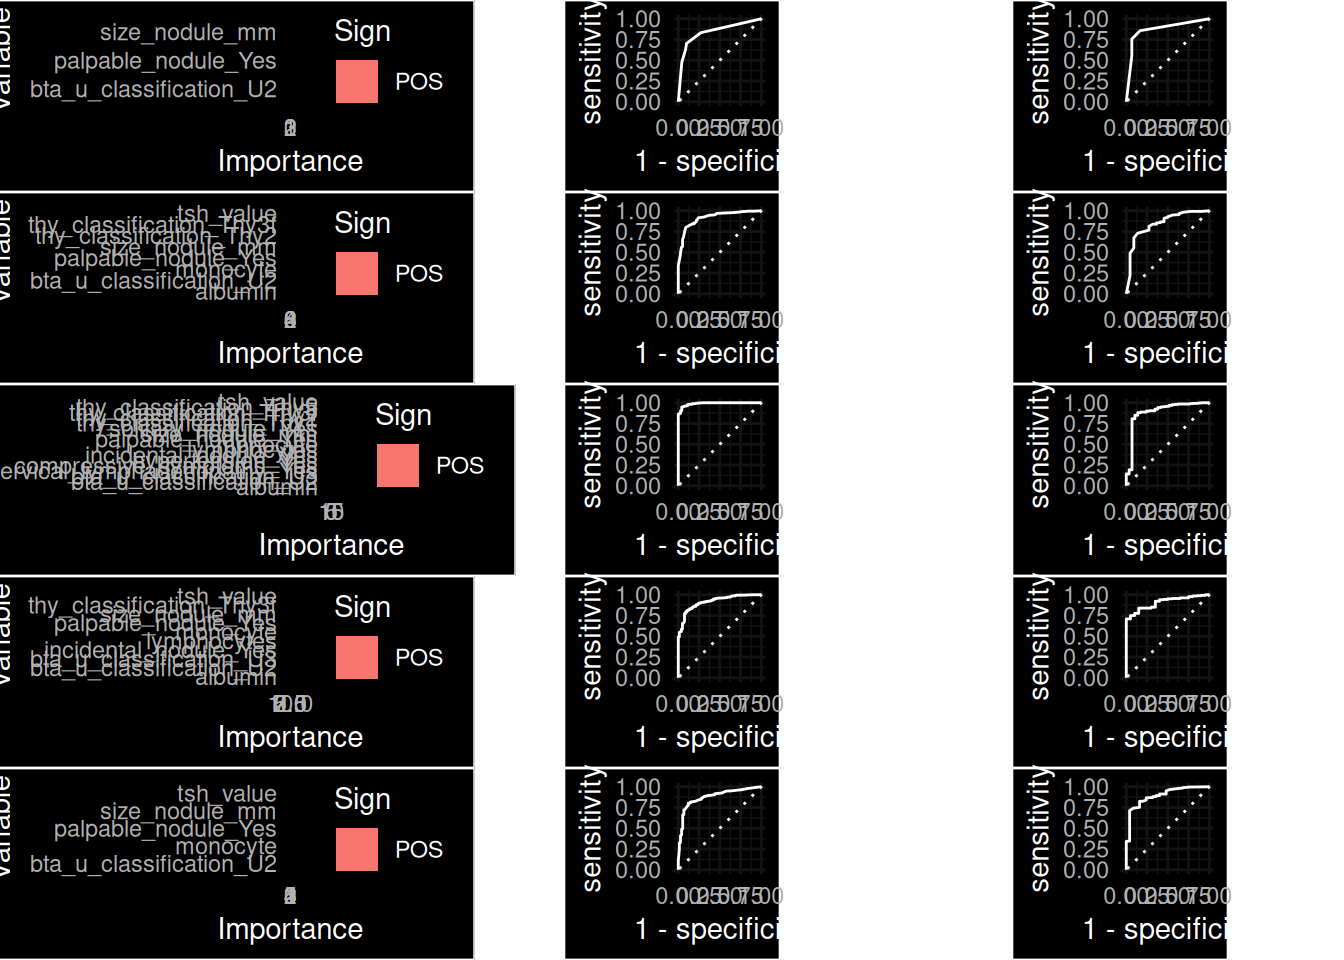

``` r
tidy_rf_xgboost$importance |>
    knitr::kable(caption = "Importance of features from LASSO model of five RF imputed datasets.")
```

  Variable                       Sign      1    2    3    4    5
  ------------------------------ ------ ---- ---- ---- ---- ----
  albumin                        POS      NA    6   10    4   NA
  bta_u_classification_U2        POS       1    1    1    1    1
  bta_u_classification_U3        POS      NA   NA    9    9   NA
  cervical_lymphadenopathy_Yes   POS      NA   NA   15   NA   NA
  compressive_symptoms_Yes       POS      NA   NA   16   NA   NA
  hypertension_Yes               POS      NA   NA   13   NA   NA
  incidental_nodule_Yes          POS      NA   NA   12   10   NA
  lymphocytes                    POS      NA   NA    7    7   NA
  monocyte                       POS      NA    8    6    5    3
  palpable_nodule_Yes            POS       3    5   14    8    4
  size_nodule_mm                 POS       2    7    3    2    2
  solitary_nodule_Yes            POS      NA   NA   11   NA   NA
  thy_classification_Thy1        POS      NA   NA   17   NA   NA
  thy_classification_Thy2        POS      NA    3    8   NA   NA
  thy_classification_Thy3f       POS      NA    2    5    3   NA
  thy_classification_Thy5        POS      NA   NA    4   NA   NA
  tsh_value                      POS      NA    4    2    6    5

  : Importance of features from LASSO model of five RF imputed datasets.

``` r
tidy_rf_xgboost$train_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five RF imputed datasets (Training Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.919   0.909   0.973   0.930   0.913
  bal_accuracy           binary         0.500   0.500   0.838   0.647   0.500
  detection_prevalence   binary         1.000   1.000   0.944   0.968   1.000
  f_meas                 binary         0.958   0.953   0.986   0.963   0.955
  j_index                binary         0.000   0.000   0.676   0.295   0.000
  kap                    binary         0.000   0.000   0.793   0.416   0.000
  mcc                    binary            NA      NA   0.810   0.483      NA
  npv                    binary           NaN     NaN   1.000   0.857     NaN
  ppv                    binary         0.919   0.909   0.972   0.933   0.913
  precision              binary         0.919   0.909   0.972   0.933   0.913
  recall                 binary         1.000   1.000   1.000   0.995   1.000
  roc_auc                binary         0.842   0.916   0.990   0.917   0.880
  sens                   binary         1.000   1.000   1.000   0.995   1.000
  spec                   binary         0.000   0.000   0.676   0.300   0.000

  : Classification metrics from LASSO model of five RF imputed datasets
  (Training Data).

``` r
tidy_rf_xgboost$test_metrics |>
    knitr::kable(caption = "Classification metrics from LASSO model of five RF imputed datasets (Testing Data).",
                 digits = 4)
```

  .metric                .estimator         1       2       3       4       5
  ---------------------- ------------ ------- ------- ------- ------- -------
  accuracy               binary         0.896   0.924   0.920   0.927   0.913
  kap                    binary         0.000   0.000   0.506   0.243   0.000
  sens                   binary         1.000   1.000   0.969   0.981   1.000
  spec                   binary         0.000   0.000   0.483   0.200   0.000
  ppv                    binary         0.896   0.924   0.944   0.943   0.913
  npv                    binary           NaN     NaN   0.636   0.444     NaN
  mcc                    binary            NA      NA   0.512   0.265      NA
  j_index                binary         0.000   0.000   0.452   0.181   0.000
  bal_accuracy           binary         0.500   0.500   0.726   0.591   0.500
  detection_prevalence   binary         1.000   1.000   0.924   0.969   1.000
  precision              binary         0.896   0.924   0.944   0.943   0.913
  recall                 binary         1.000   1.000   0.969   0.981   1.000
  f_meas                 binary         0.945   0.960   0.956   0.962   0.955
  roc_auc                binary         0.873   0.847   0.894   0.907   0.896

  : Classification metrics from LASSO model of five RF imputed datasets
  (Testing Data).

#### Explainability

Which factors are important to classification can be assessed not just by the “importance” but by methods know as [LIME](https://search.r-project.org/CRAN/refmans/lime/html/lime-package.html) (Local Interpretable Model-Agnostic Explanations) @ribeiro2016 and [Shapley values](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html) @lundberg2017

#### Comparision

Comparing the sensitivity of the different models goes here.

-   Table of sensitivity/specificity/other metrics.
-   ROC curves

## Conclusion

The take-away message is….these things are hard!

## Appendix

### Data Dictionary

``` r
var_labels |>
  as.data.frame() |>
  kable(col.names = c("Description"),
        caption="Description of variables in the Sheffield Thyroid dataset.")
```